# Data

In [1]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psutil
from google.colab import drive
from tqdm import tqdm
from sklearn.model_selection import train_test_split
drive.mount('/content/drive')
from scipy import optimize
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import seaborn as sns
from scipy.stats import norm
import dataclasses as dataclasses
from dataclasses import dataclass
import math
from mpl_toolkits.mplot3d import Axes3D
from scipy import optimize
from numpy.matrixlib.defmatrix import concatenate
from scipy import optimize
from sklearn import metrics
from scipy.stats import norm
from pandas.core.common import random_state
#from keras.models import Sequential
#from keras.layers import Dense
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df=pd.read_csv('/content/drive/MyDrive/OnlineNewsPopularity.csv')
# Displaying the data
df.head()

url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.815385         4.0              2.0        1.0  ...   
1                   0.791946         3.0              1.0        1.0  ...   
2                   0.663866         3.0              1.0        1.0  ...   
3                   0.665635         9.0              0.0        1.0  ...   
4                   0.540890        19.0             19.0       20.0  ...   

    min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
0                0.100000                     0.7               -0.350000   
1                0.033333                     0.7               -0.118750   
2                0.100000                     1.0               -0.466667   
3                0.136364                     0.8               -0.369697   
4                0.033333                     1.0               -0.220192   

    min_negative_polarity   max_negative_polarity   title_subjectivity  \
0                  -0.600               -0.200000             0.500000   
1                  -0.125               -0.100000             0.000000   
2                  -0.800               -0.133333             0.000000   
3                  -0.600               -0.166667             0.000000   
4                  -0.500               -0.050000             0.454545   

    title_sentiment_polarity   abs_title_subjectivity  \
0                  -0.187500                 0.000000   
1                   0.000000                 0.500000   
2                   0.000000                 0.500000   
3                   0.000000                 0.500000   
4                   0.136364                 0.045455   

    abs_title_sentiment_polarity   shares  
0                       0.187500      593  
1                       0.000000      711  
2                       0.000000     1500  
3                       0.000000     1200  
4                       0.136364      505  

[5 rows x 61 columns]

In [6]:
'''df = pd.read_csv('OnlineNewsPopularity.csv')
# Displaying the data

df.head()'''

"df = pd.read_csv('OnlineNewsPopularity.csv')\n# Displaying the data\n\ndf.head()"

In [7]:
#Renaming the Columns
df=df.rename(columns=lambda x: x.strip())

In [8]:
# Adding column Y
df['y'] = df['shares'].apply(lambda x: 1 if x > 2000 else 0)

In [9]:
from numpy.lib.function_base import median
from numpy.core.fromnumeric import mean
print(df['shares'].apply(["mean","median"]))
print(df['shares'].apply([max,min]))

mean      3395.380184
median    1400.000000
Name: shares, dtype: float64
max    843300
min         1
Name: shares, dtype: int64


In [10]:
df=df.drop(['url','timedelta'],axis=1)

In [11]:
df.isnull().sum()

n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_shares        0
self_reference_max_shares        0
self_reference_avg_s

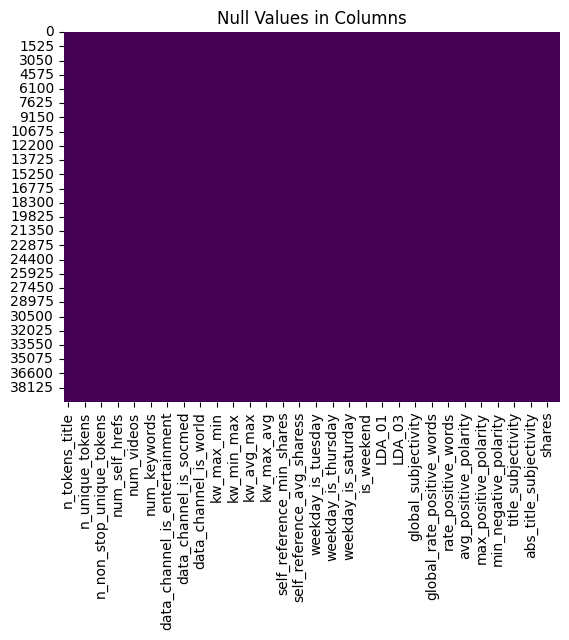

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is stored in a variable named df
# Create a heatmap to visualize null values in columns
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Null Values in Columns')
plt.show()

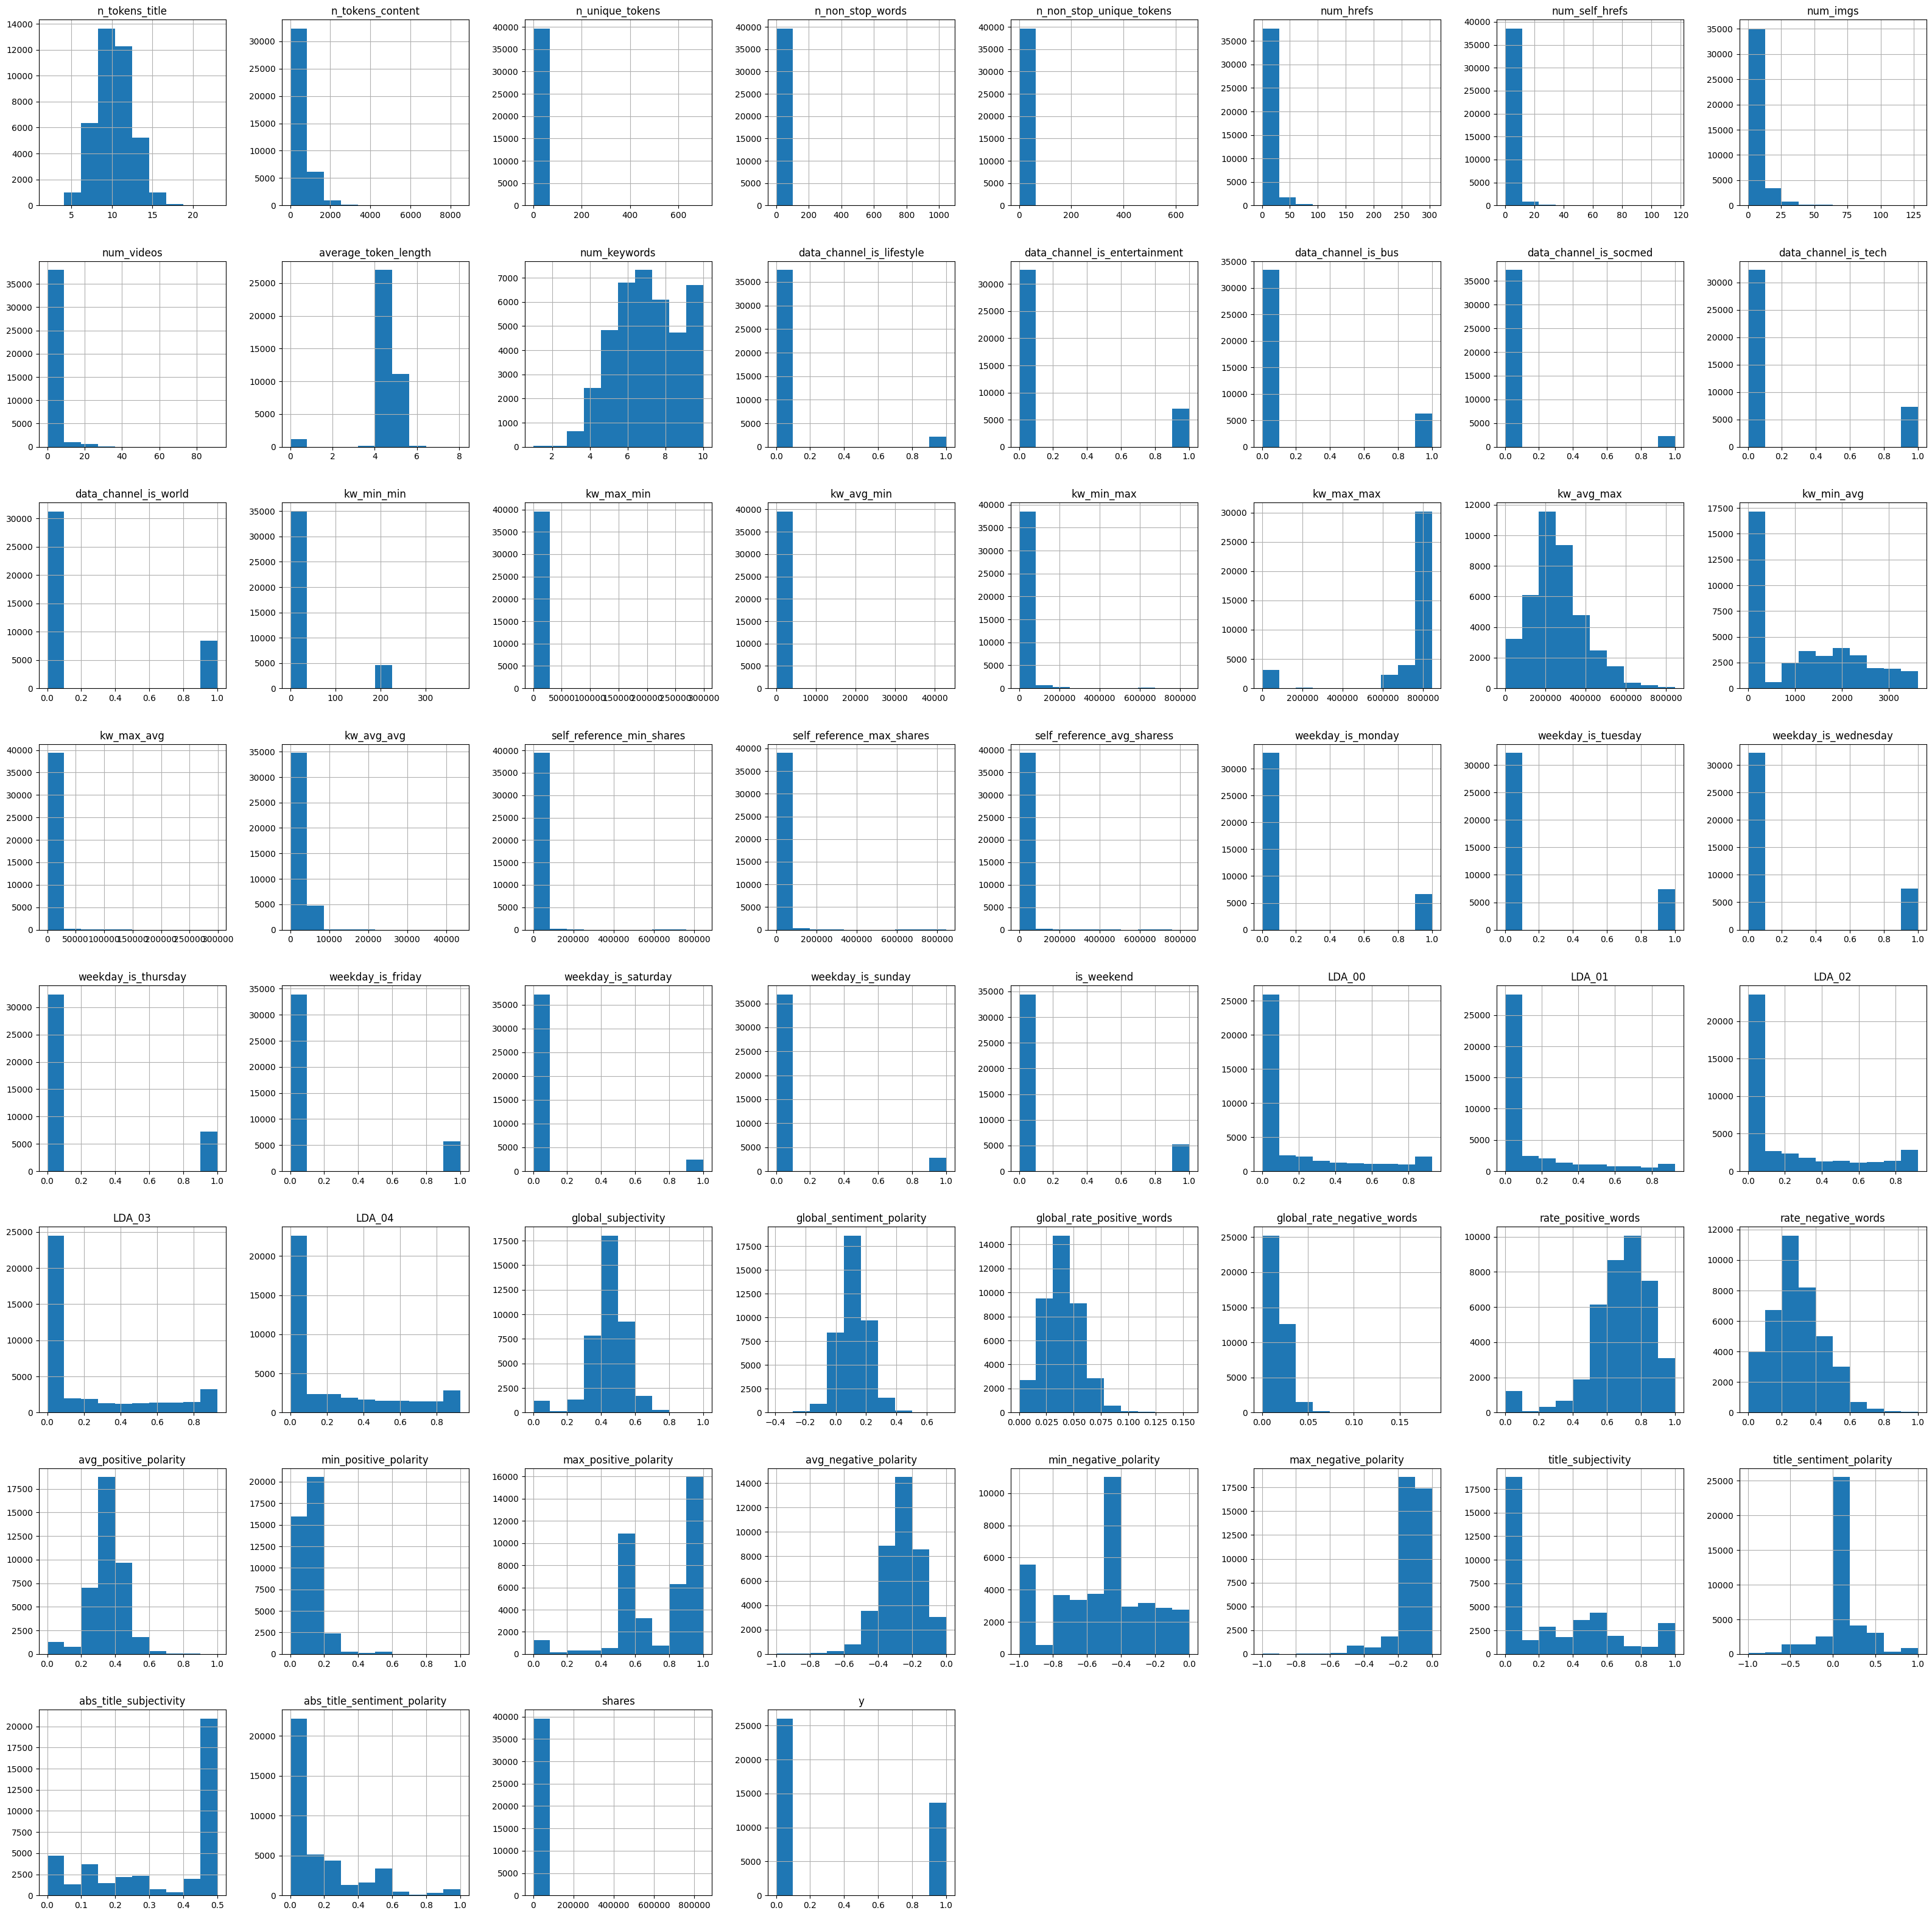

In [45]:
df.hist(figsize=(40,40))
plt.show()

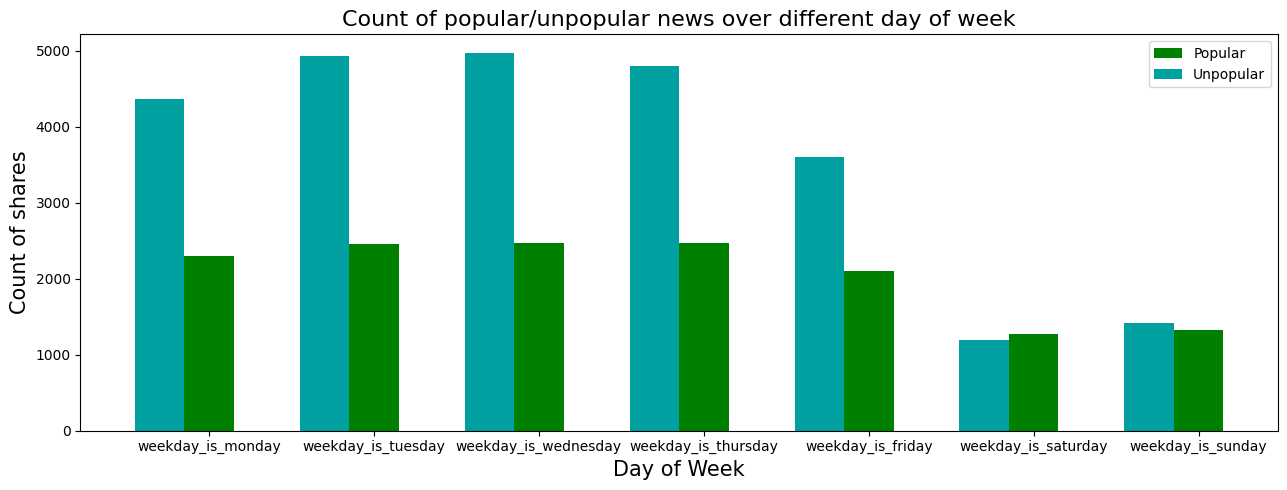

In [13]:
a=2000
Wday = df.columns.values[29:36]
Unpop=df[df['shares']<a]
Pop=df[df['shares']>=a]
Unpop_day = Unpop[Wday].sum().values
Pop_day = Pop[Wday].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week", fontsize = 16)

plt.bar(np.arange(len(Wday)),Pop_day,width=0.3,align='center',color='g',label='Popular')
plt.bar(np.arange(len(Wday))-0.3,Unpop_day,width=0.3,align='center',color='#00A0A0',label='Unpopular')

plt.xticks(np.arange(len(Wday)),Wday)
plt.ylabel('Count of shares',fontsize=15)
plt.xlabel('Day of Week',fontsize=15)
#for i, v in enumerate(Pop_day):
#    fig.text(i+25, 
#              v/Pop_day[i]+50, 
#              Pop_day[i], 
#              fontsize=5)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [14]:
df.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negat

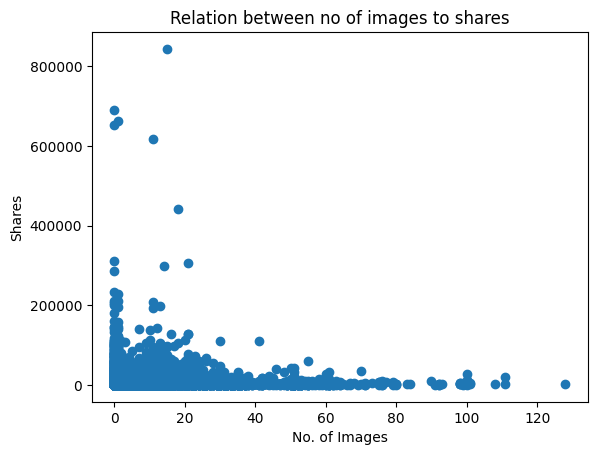

In [15]:
plt.scatter(df['num_imgs'],df['shares'])

plt.xlabel('No. of Images')
plt.ylabel('Shares')
plt.title('Relation between no of images to shares')
plt.show()

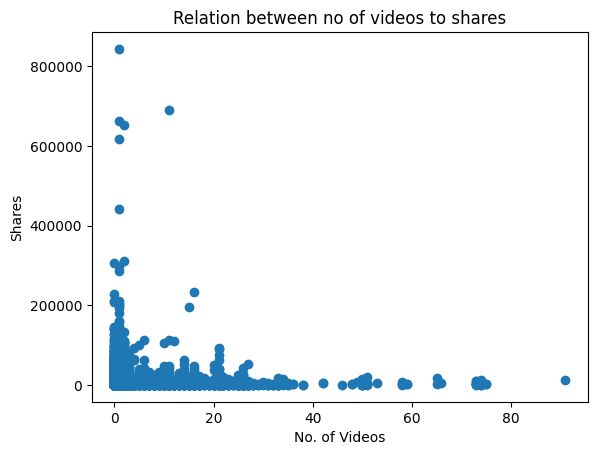

In [48]:
plt.scatter(df['num_videos'],df['shares'])

plt.xlabel('No. of Videos')
plt.ylabel('Shares')
plt.title('Relation between no of videos to shares')
plt.show()

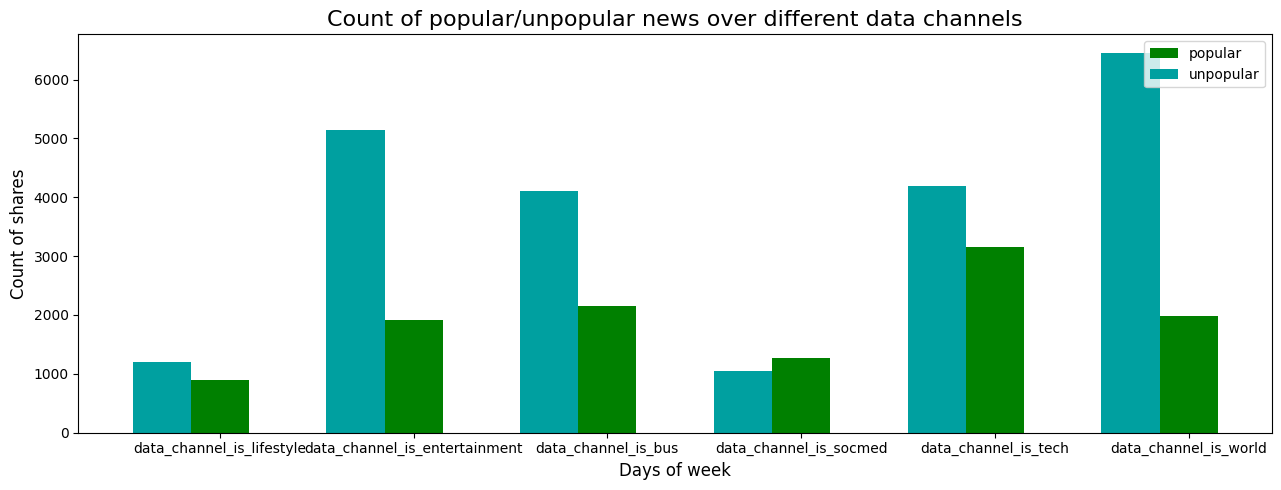

In [17]:
Dc=df.columns[11:17]
Dc
b=2000
Unpop4=df[df['shares']<b]
Pop4=df[df['shares']>=b]
Unpop_day4 = Unpop4[Dc].sum().values
Pop_day4 = Pop4[Dc].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different data channels", fontsize = 16)
plt.bar(np.arange(len(Dc)), Pop_day4, width = 0.3, align="center", color = 'g', \
          label = "popular")
plt.bar(np.arange(len(Dc)) - 0.3, Unpop_day4, width = 0.3, align = "center", color = '#00A0A0', \
          label = "unpopular")
plt.xticks(np.arange(len(Dc)), Dc)
plt.ylabel("Count of shares", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [18]:
Dc=df.columns[11:17]
Dc

Index(['data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world'],
      dtype='object')

<ipython-input-19-d353f9c1a231>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_lt = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))


<Axes: >

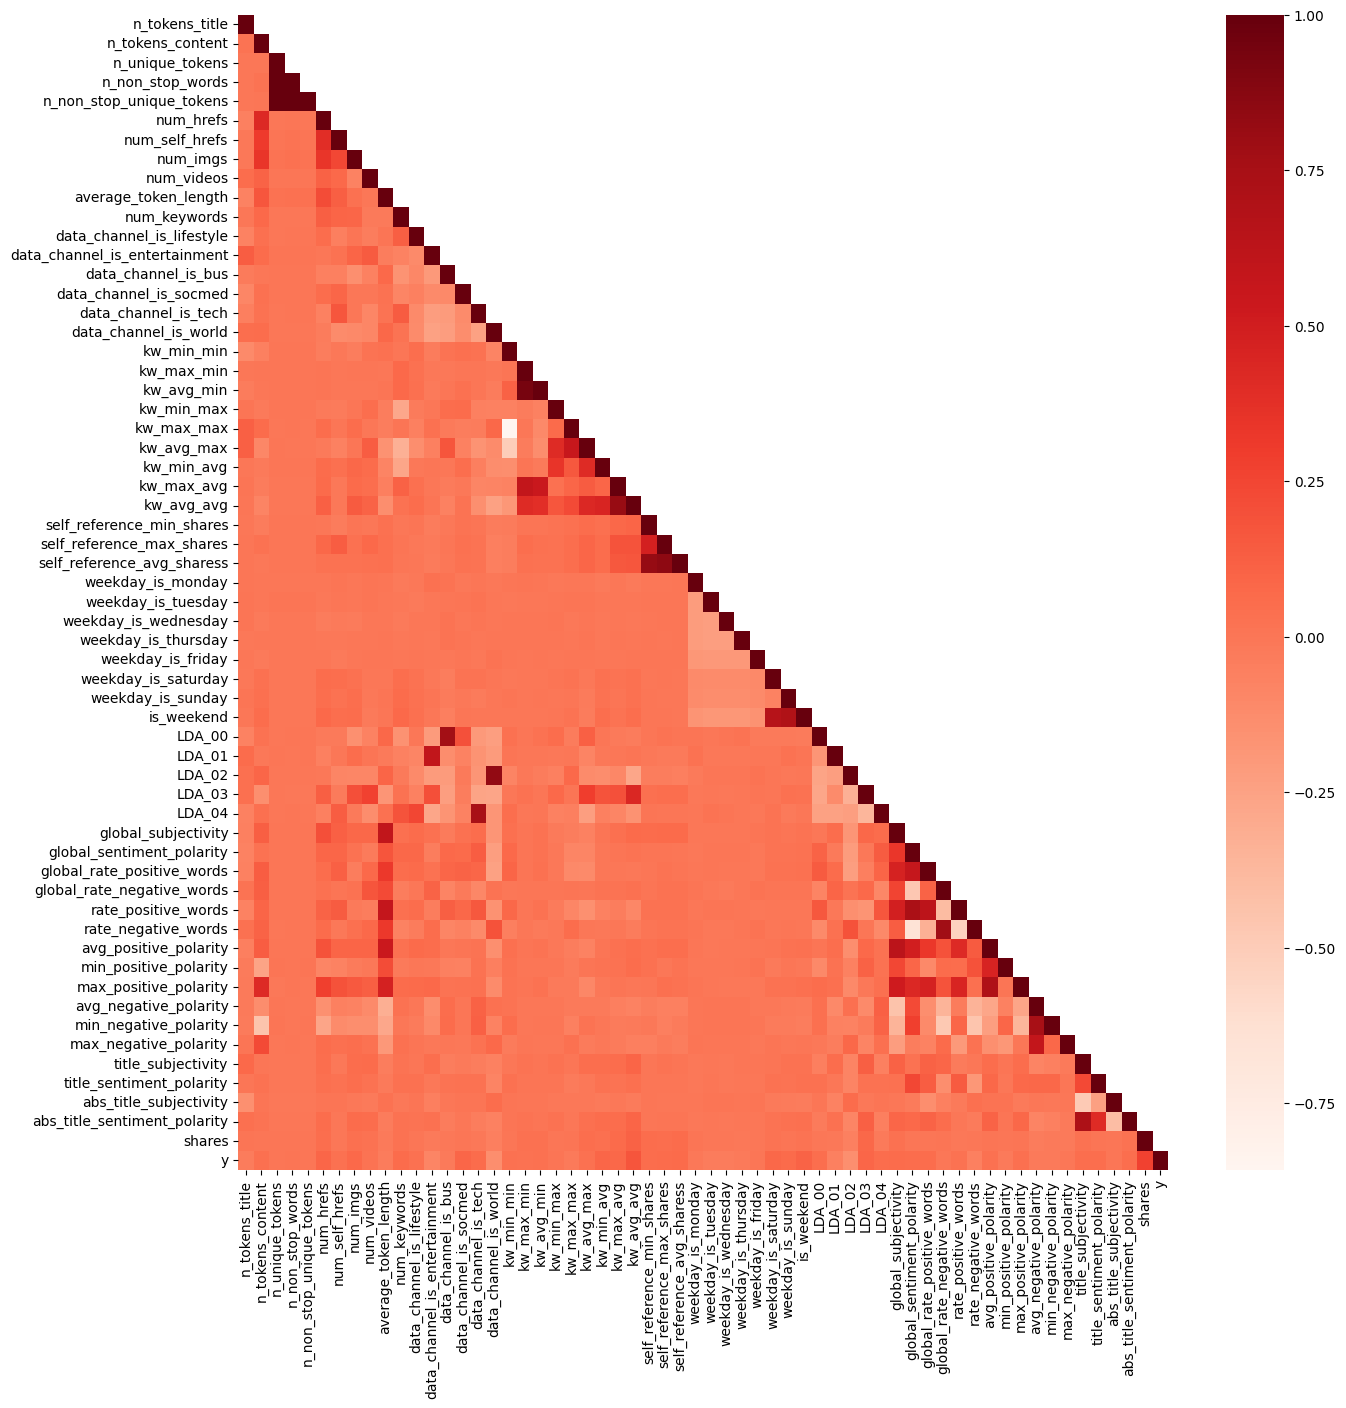

In [19]:
cor=df.corr()
#ns.heatmap(cor)
plt.figure(figsize=(15,15))
df_lt = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))
sns.heatmap(df_lt,cmap='Reds')

In [20]:
corr_matrix = df.corr().abs()
corr_matrix

n_tokens_title  n_tokens_content  \
n_tokens_title                       1.000000          0.018160   
n_tokens_content                     0.018160          1.000000   
n_unique_tokens                      0.005318          0.004737   
n_non_stop_words                     0.004754          0.017512   
n_non_stop_unique_tokens             0.005420          0.000373   
num_hrefs                            0.053496          0.423065   
num_self_hrefs                       0.014856          0.304682   
num_imgs                             0.008858          0.342600   
num_videos                           0.051460          0.103699   
average_token_length                 0.071403          0.167789   
num_keywords                         0.006077          0.072845   
data_channel_is_lifestyle            0.070815          0.037548   
data_channel_is_entertainment        0.132791          0.060200   
data_channel_is_bus                  0.023902          0.006105   
data_channel_is_socmed               0.090394          0.033424   
data_channel_is_tech                 0.046716          0.025408   
data_channel_is_world                0.049223          0.055989   
kw_min_min                           0.110672          0.054345   
kw_max_min                           0.005890          0.000066   
kw_avg_min                           0.031400          0.003545   
kw_min_max                           0.012926          0.022786   
kw_max_max                           0.120841          0.058860   
kw_avg_max                           0.115746          0.096460   
kw_min_avg                           0.002370          0.022286   
kw_max_avg                           0.006918          0.030496   
kw_avg_avg                           0.004296          0.079624   
self_reference_min_shares            0.004563          0.030686   
self_reference_max_shares            0.000128          0.025657   
self_reference_avg_sharess           0.000661          0.013809   
weekday_is_monday                    0.004274          0.002484   
weekday_is_tuesday                   0.009322          0.004027   
weekday_is_wednesday                 0.008935          0.016891   
weekday_is_thursday                  0.015472          0.007395   
weekday_is_friday                    0.002015          0.015949   
weekday_is_saturday                  0.015013          0.034538   
weekday_is_sunday                    0.006289          0.036394   
is_weekend                           0.005996          0.052024   
LDA_00                               0.070038          0.026218   
LDA_01                               0.063568          0.009724   
LDA_02                               0.038365          0.087266   
LDA_03                               0.042208          0.140141   
LDA_04                               0.065063          0.041265   
global_subjectivity                  0.056804          0.127879   
global_sentiment_polarity            0.072226          0.021937   
global_rate_positive_words           0.064951          0.133979   
global_rate_negative_words           0.015530          0.125013   
rate_positive_words                  0.066589          0.098960   
rate_negative_words                  0.034186          0.101053   
avg_positive_polarity                0.049619          0.135123   
min_positive_polarity                0.025069          0.261493   
max_positive_polarity                0.021662          0.415706   
avg_negative_polarity                0.017096          0.130375   
min_negative_polarity                0.029146          0.450603   
max_negative_polarity                0.011425          0.225870   
title_subjectivity                   0.077245          0.004484   
title_sentiment_polarity             0.000240          0.023358   
abs_title_subjectivity               0.146954          0.007136   
abs_title_sentiment_polarity         0.040550          0.013439   
shares                               0.008783          0.002459   
y          

In [21]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

<ipython-input-21-c1ad37c011f5>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [22]:
high_corr_cols = [col for col in upper.columns if any(upper[col] >= 0.70)]
print(high_corr_cols)

['n_non_stop_words', 'n_non_stop_unique_tokens', 'kw_avg_min', 'kw_max_max', 'kw_avg_avg', 'self_reference_avg_sharess', 'is_weekend', 'LDA_00', 'LDA_02', 'LDA_04', 'rate_positive_words', 'rate_negative_words', 'max_positive_polarity', 'min_negative_polarity', 'abs_title_sentiment_polarity']


In [23]:
corr_df=df.drop(['n_non_stop_unique_tokens', 'kw_avg_min', 'kw_max_max', 'kw_avg_avg', 'self_reference_avg_sharess', 'is_weekend',
                 'LDA_00', 'LDA_02', 'LDA_04', 'rate_positive_words', 
                 'rate_negative_words', 'max_positive_polarity', 'min_negative_polarity', 'abs_title_sentiment_polarity'],axis=1)
corr_df.head()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   num_hrefs  num_self_hrefs  num_imgs  num_videos  average_token_length  \
0        4.0             2.0       1.0         0.0              4.680365   
1        3.0             1.0       1.0         0.0              4.913725   
2        3.0             1.0       1.0         0.0              4.393365   
3        9.0             0.0       1.0         0.0              4.404896   
4       19.0            19.0      20.0         0.0              4.682836   

   num_keywords  ...  global_rate_negative_words  avg_positive_polarity  \
0           5.0  ...                    0.013699               0.378636   
1           4.0  ...                    0.015686               0.286915   
2           6.0  ...                    0.009479               0.495833   
3           7.0  ...                    0.020716               0.385965   
4           7.0  ...                    0.012127               0.411127   

   min_positive_polarity  avg_negative_polarity  max_negative_polarity  \
0               0.100000              -0.350000              -0.200000   
1               0.033333              -0.118750              -0.100000   
2               0.100000              -0.466667              -0.133333   
3               0.136364              -0.369697              -0.166667   
4               0.033333              -0.220192              -0.050000   

   title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
0            0.500000                 -0.187500                0.000000   
1            0.000000                  0.000000                0.500000   
2            0.000000                  0.000000                0.500000   
3            0.000000                  0.000000                0.500000   
4            0.454545                  0.136364                0.045455   

   shares  y  
0     593  0  
1     711  0  
2    1500  0  
3    1200  0  
4     505  0  

[5 rows x 46 columns]

In [24]:
corr_df.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'num_videos', 'average_token_length', 'num_keywords',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_min_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'LDA_01', 'LDA_03',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'avg_positive_polarity', 'min_positive_polarity',
       'avg_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sen

In [25]:
discrete_col_df=corr_df[['data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world','weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'y']]
discrete_col_df.head()

data_channel_is_lifestyle  data_channel_is_entertainment  \
0                        0.0                            1.0   
1                        0.0                            0.0   
2                        0.0                            0.0   
3                        0.0                            1.0   
4                        0.0                            0.0   

   data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
0                  0.0                     0.0                   0.0   
1                  1.0                     0.0                   0.0   
2                  1.0                     0.0                   0.0   
3                  0.0                     0.0                   0.0   
4                  0.0                     0.0                   1.0   

   data_channel_is_world  weekday_is_monday  weekday_is_tuesday  \
0                    0.0                1.0                 0.0   
1                    0.0                1.0                 0.0   
2                    0.0                1.0                 0.0   
3                    0.0                1.0                 0.0   
4                    0.0                1.0                 0.0   

   weekday_is_wednesday  weekday_is_thursday  weekday_is_friday  \
0                   0.0                  0.0                0.0   
1                   0.0                  0.0                0.0   
2                   0.0                  0.0                0.0   
3                   0.0                  0.0                0.0   
4                   0.0                  0.0                0.0   

   weekday_is_saturday  weekday_is_sunday  y  
0                  0.0                0.0  0  
1                  0.0                0.0  0  
2                  0.0                0.0  0  
3                  0.0                0.0  0  
4                  0.0                0.0  0

In [26]:
discrete_col_df.dtypes

data_channel_is_lifestyle        float64
data_channel_is_entertainment    float64
data_channel_is_bus              float64
data_channel_is_socmed           float64
data_channel_is_tech             float64
data_channel_is_world            float64
weekday_is_monday                float64
weekday_is_tuesday               float64
weekday_is_wednesday             float64
weekday_is_thursday              float64
weekday_is_friday                float64
weekday_is_saturday              float64
weekday_is_sunday                float64
y                                  int64
dtype: object

In [27]:
discrete_col_df = discrete_col_df [['data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world','weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday','weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday','y']].astype(int)
discrete_col_df

data_channel_is_lifestyle  data_channel_is_entertainment  \
0                              0                              1   
1                              0                              0   
2                              0                              0   
3                              0                              1   
4                              0                              0   
...                          ...                            ...   
39639                          0                              0   
39640                          0                              0   
39641                          0                              0   
39642                          0                              0   
39643                          0                              1   

       data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
0                        0                       0                     0   
1                        1                       0                     0   
2                        1                       0                     0   
3                        0                       0                     0   
4                        0                       0                     1   
...                    ...                     ...                   ...   
39639                    0                       0                     1   
39640                    0                       1                     0   
39641                    0                       0                     0   
39642                    0                       0                     0   
39643                    0                       0                     0   

       data_channel_is_world  weekday_is_monday  weekday_is_tuesday  \
0                          0                  1                   0   
1                          0                  1                   0   
2                          0                  1                   0   
3                          0                  1                   0   
4                          0                  1                   0   
...                      ...                ...                 ...   
39639                      0                  0                   0   
39640                      0                  0                   0   
39641                      0                  0                   0   
39642                      1                  0                   0   
39643                      0                  0                   0   

       weekday_is_wednesday  weekday_is_thursday  weekday_is_friday  \
0                         0                    0                  0   
1                         0                    0                  0   
2                         0                    0                  0   
3                         0                    0                  0   
4                         0                    0                  0   
...                     ...                  ...                ...   
39639                     1                    0                  0   
39640                     1                    0                  0   
39641                     1                    0                  0   
39642                     1                    0                  0   
39643                     1                    0                  0   

       weekday_is_saturday  weekday_is_sunday  y  
0                        0                  0  0  
1                        0                  0  0  
2                        0                  0  0  
3                        0                  0  0  
4                        0                  0  0  
...                    ...                ... ..  
39639                    0                  0  0  
39640                    0                  0  0  
39641                    0                  0  0  
39642                    0                  0  0  
39643                 

In [28]:
continuous_col_df = corr_df.drop(['data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world','weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday','weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday','y'], axis=1)
continuous_col_df.head()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   num_hrefs  num_self_hrefs  num_imgs  num_videos  average_token_length  \
0        4.0             2.0       1.0         0.0              4.680365   
1        3.0             1.0       1.0         0.0              4.913725   
2        3.0             1.0       1.0         0.0              4.393365   
3        9.0             0.0       1.0         0.0              4.404896   
4       19.0            19.0      20.0         0.0              4.682836   

   num_keywords  ...  global_rate_positive_words  global_rate_negative_words  \
0           5.0  ...                    0.045662                    0.013699   
1           4.0  ...                    0.043137                    0.015686   
2           6.0  ...                    0.056872                    0.009479   
3           7.0  ...                    0.041431                    0.020716   
4           7.0  ...                    0.074627                    0.012127   

   avg_positive_polarity  min_positive_polarity  avg_negative_polarity  \
0               0.378636               0.100000              -0.350000   
1               0.286915               0.033333              -0.118750   
2               0.495833               0.100000              -0.466667   
3               0.385965               0.136364              -0.369697   
4               0.411127               0.033333              -0.220192   

   max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
0              -0.200000            0.500000                 -0.187500   
1              -0.100000            0.000000                  0.000000   
2              -0.133333            0.000000                  0.000000   
3              -0.166667            0.000000                  0.000000   
4              -0.050000            0.454545                  0.136364   

   abs_title_subjectivity  shares  
0                0.000000     593  
1                0.500000     711  
2                0.500000    1500  
3                0.500000    1200  
4                0.045455     505  

[5 rows x 32 columns]

<Axes: >

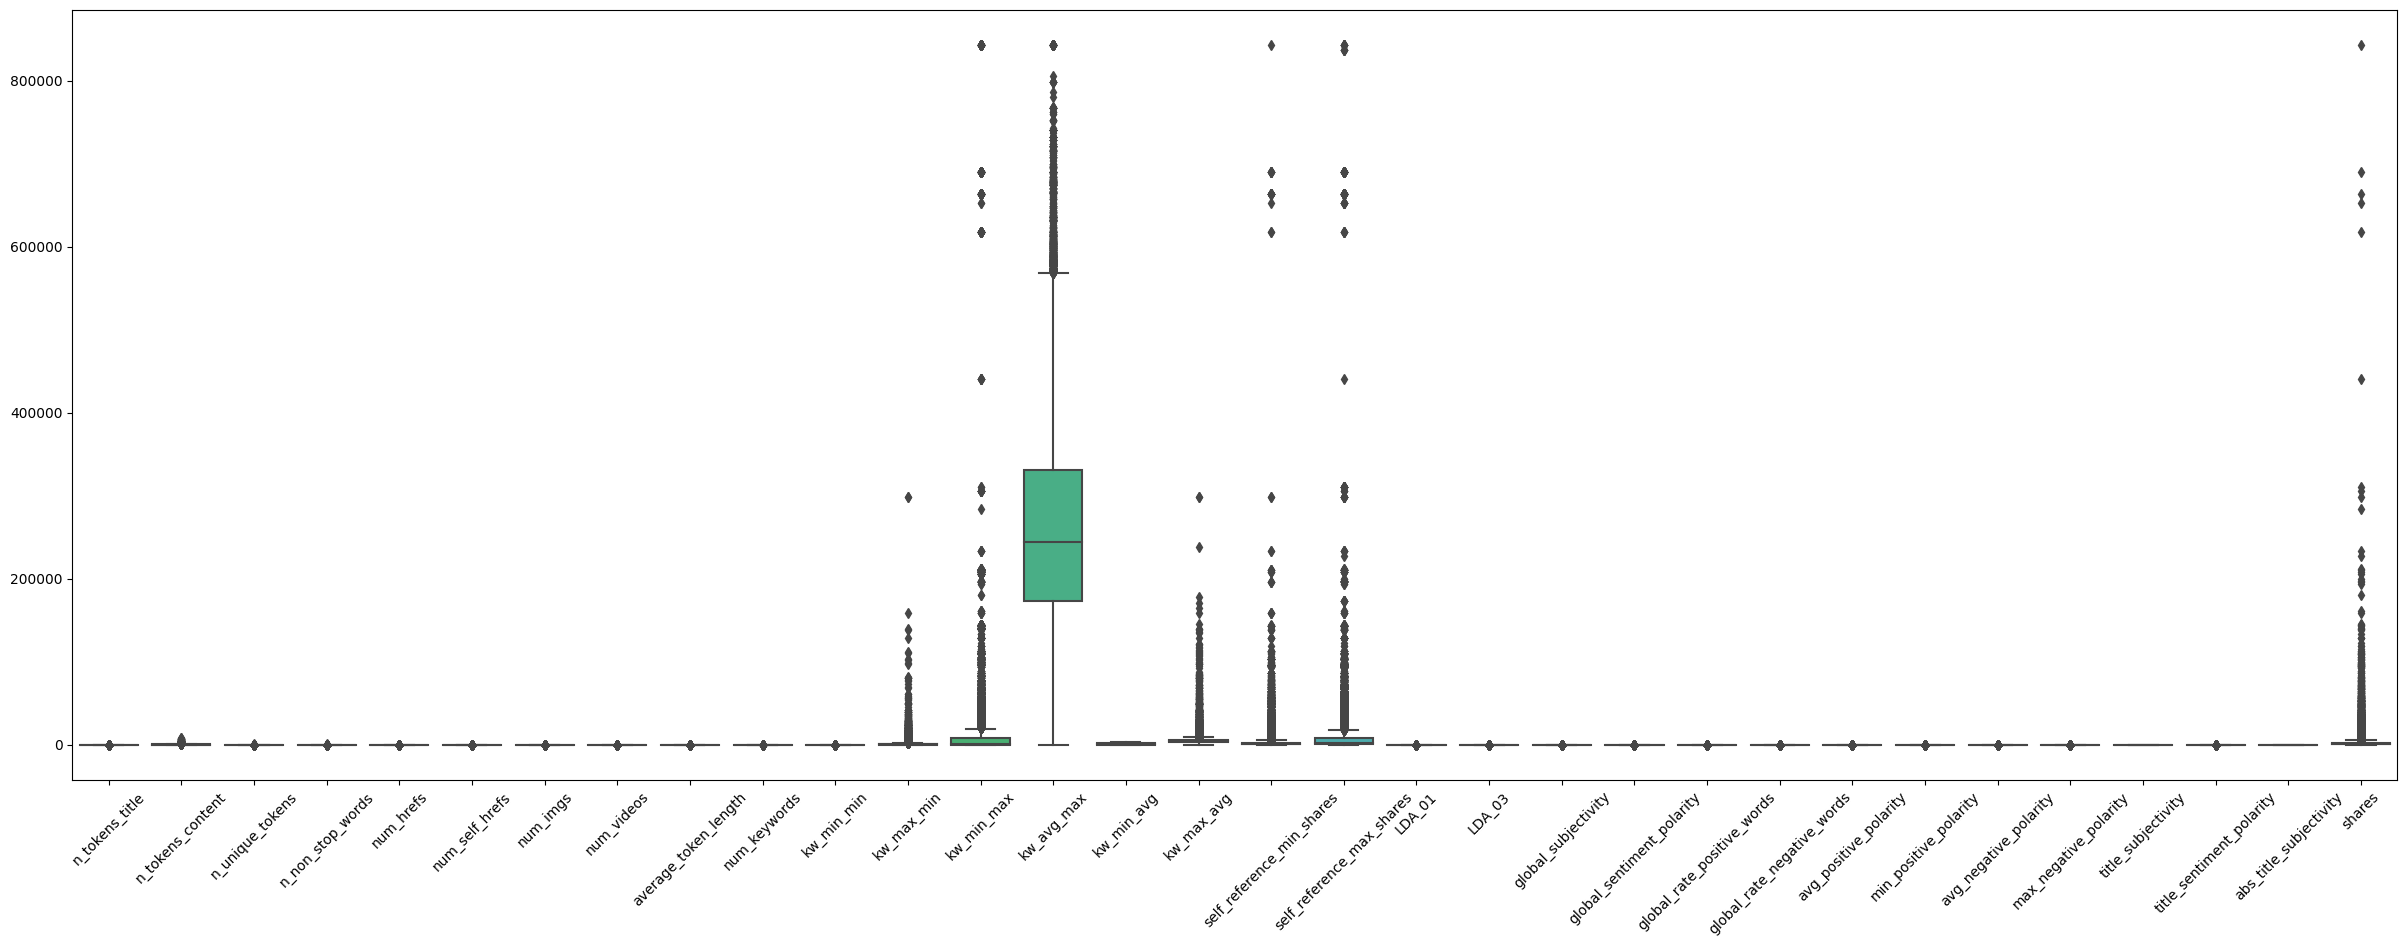

In [29]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=45)
sns.boxplot(data = continuous_col_df)

In [30]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
continuous_col_df[:] = ss.fit_transform(continuous_col_df)
log_transformed_df = pd.DataFrame()
for col in continuous_col_df.columns:
    transformed_col = []
    for i in range(len(df[col])):
        if continuous_col_df.loc[i, col] == 0:
            transformed_col.append(0)
        elif continuous_col_df.loc[i, col] < 0:
            transformed_col.append(-np.log(-continuous_col_df.loc[i, col]))
        else:
            transformed_col.append(np.log(continuous_col_df.loc[i, col]))
    log_transformed_df[col] = transformed_col


In [31]:
def remove_outliers(array, k=1):
    ul = array.mean() + k*array.std()
    ll = array.mean() - k*array.std()
    array[array<ll] = ll
    array[array>ul] = ul
    return array

In [32]:
numerical_onp = continuous_col_df.apply(remove_outliers)

<Axes: >

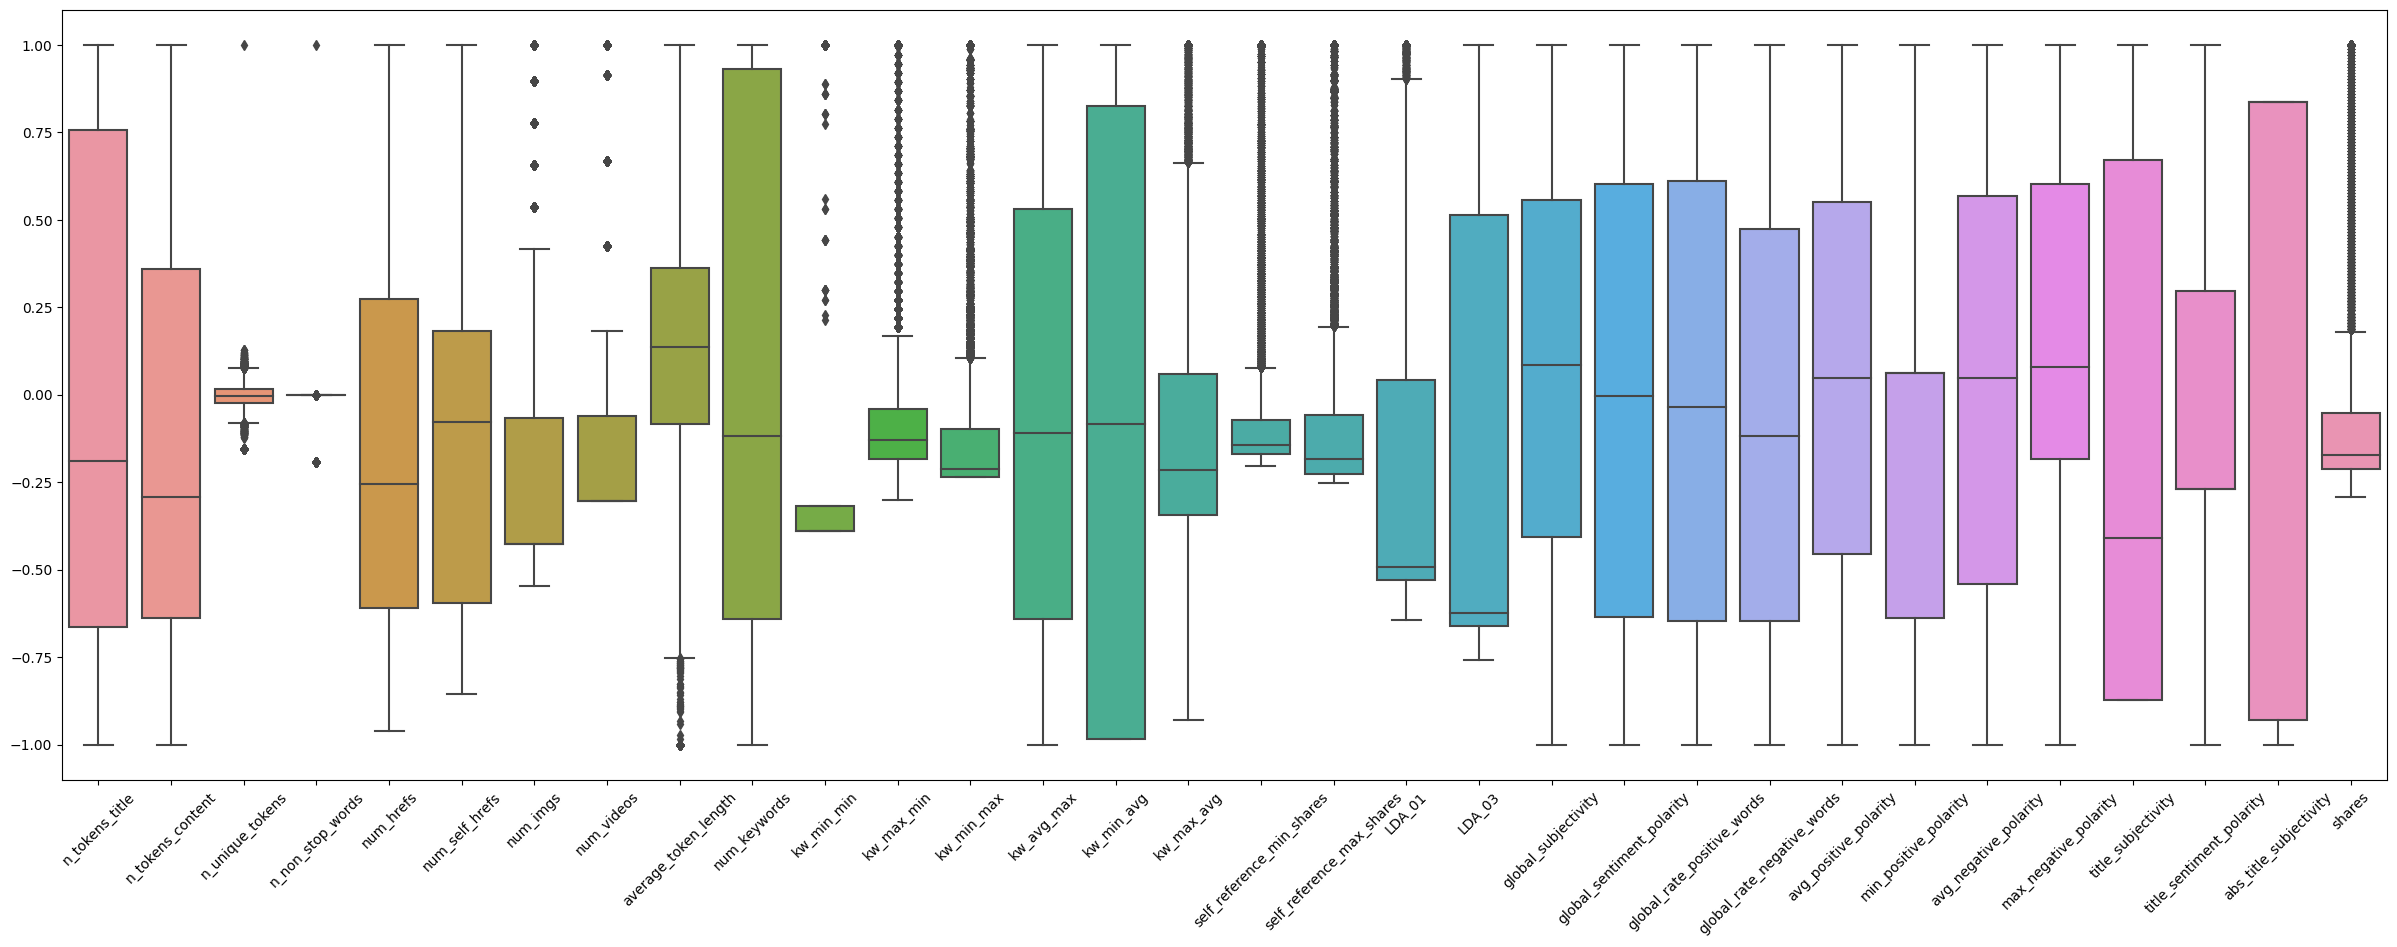

In [33]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=45)
sns.boxplot(data = numerical_onp)

In [34]:
log_transformed_df.head(10)

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0       -0.277801          0.363541        -3.418185         -7.300687   
1        0.413009          0.479983        -4.131680         -7.300687   
2        0.413009          0.339408        -4.873765         -7.300687   
3        0.413009          3.413284         4.372539         -7.300686   
4        0.207406          0.109248         3.279293         -7.300686   
5        1.668010          0.981669        -5.709138         -7.300686   
6       -0.126361         -0.130452         3.298462         -7.300686   
7       -0.277801         -0.062667         3.424590         -7.300686   
8       -1.257329          0.046905        -3.363307         -7.300691   
9        1.668010          0.400868        -3.687389         -7.300687   

   num_hrefs  num_self_hrefs  num_imgs  num_videos  average_token_length  \
0   0.498465        1.091936  0.852082    1.189846             -1.854864   
1   0.362823        0.519256  0.852082    1.189846             -0.837392   
2   0.362823        0.519256  0.852082    1.189846              1.696006   
3   1.794387        0.157402  0.852082    1.189846              1.773381   
4  -0.333744        1.404671  0.620609    1.189846             -1.836339   
5   0.243403        1.091936  0.603540    1.189846              1.498039   
6  -0.113471        1.466395  0.620609    1.189846             -2.075867   
7  -0.217554        1.466395  0.620609    1.189846             -2.496482   
8   0.243403        0.157402  0.603540    1.189846             -1.010370   
9   0.498465        0.519256  0.852082    2.799687             -0.442119   

   num_keywords  ...  global_rate_positive_words  global_rate_negative_words  \
0     -0.152567  ...                   -1.060152                    1.312752   
1     -0.523915  ...                   -1.601797                    2.459152   
2      0.444702  ...                   -0.010453                    0.417309   
3      2.143787  ...                   -2.266751                   -0.970261   
4      2.143787  ...                    0.697303                    0.881308   
5     -0.072140  ...                    0.566063                   -0.038865   
6      0.374460  ...                    0.845258                   -5.290794   
7     -0.072140  ...                    0.932844                    2.013797   
8      2.143787  ...                    0.695125                   -0.994201   
9     -0.152567  ...                    3.267887                    0.234629   

   avg_positive_polarity  min_positive_polarity  avg_negative_polarity  \
0              -1.438274              -2.750986               0.344789   
1               0.446225               0.138151               0.097284   
2               0.306308              -2.750986              -0.483535   
3              -1.179470              -0.555521               0.147822   
4              -0.601234               0.138151              -1.177838   
5               3.481767              -0.555521              -0.682833   
6              -0.773936              -2.750986              -1.293240   
7              -0.346925              -2.750986              -2.031691   
8               0.710971               1.451757               0.051871   
9               0.634777              -2.750986              -1.785132   

   max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
0               0.030577           -0.398620                  0.024875   
1              -2.542848            0.138335                  1.312761   
2               1.306126            0.138335                  1.312761   
3               0.477428            0.138335                  1.312761   
4              -0.505994           -0.632882                 -1.407979   
5              -2.542848            0.106009                 -0.619548   
6              -0.505994            0.138335                  1.312761   
7              -0.505994            0.794483                  0

In [35]:
continuous_col_df.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'num_videos', 'average_token_length', 'num_keywords', 'kw_min_min',
       'kw_max_min', 'kw_min_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'self_reference_min_shares', 'self_reference_max_shares', 'LDA_01',
       'LDA_03', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'avg_positive_polarity', 'min_positive_polarity',
       'avg_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity', 'shares'],
      dtype='object')

In [36]:
continuous_cols = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'num_videos', 'average_token_length', 'num_keywords', 'kw_min_min',
       'kw_max_min', 'kw_min_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'LDA_01', 'LDA_03', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'avg_positive_polarity', 'min_positive_polarity',
       'avg_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity', 'shares']

n_tokens_title
n_tokens_content
n_unique_tokens
n_non_stop_words
num_hrefs
num_self_hrefs
num_imgs
num_videos
average_token_length
num_keywords
kw_min_min
kw_max_min
kw_min_max
kw_avg_max
kw_min_avg
kw_max_avg
self_reference_min_shares
self_reference_max_shares
LDA_01
LDA_03


<ipython-input-37-a8f870dad4e7>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


global_subjectivity
global_sentiment_polarity
global_rate_positive_words
global_rate_negative_words
avg_positive_polarity
min_positive_polarity
avg_negative_polarity
max_negative_polarity
title_subjectivity
title_sentiment_polarity
abs_title_subjectivity
shares


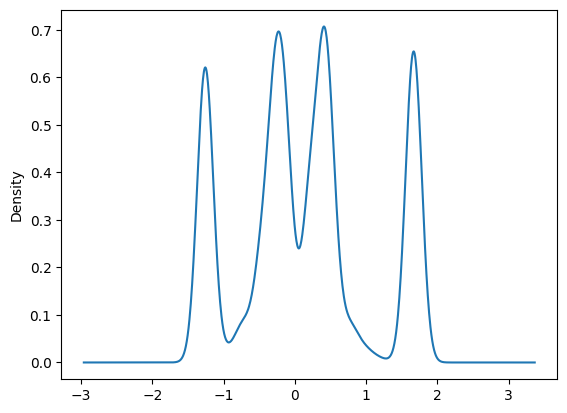

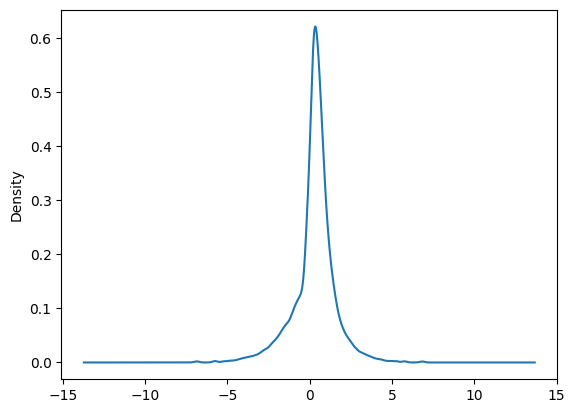

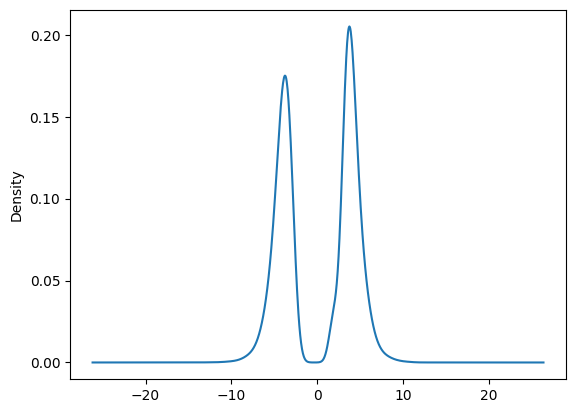

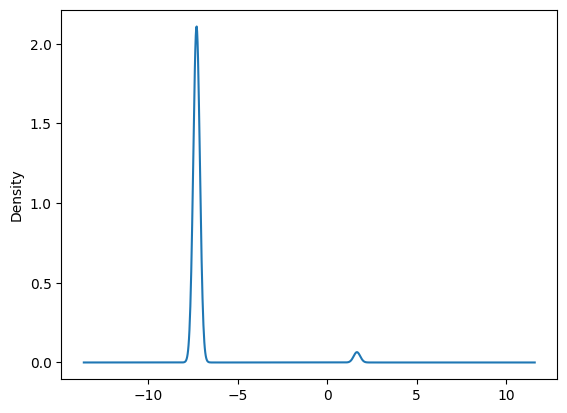

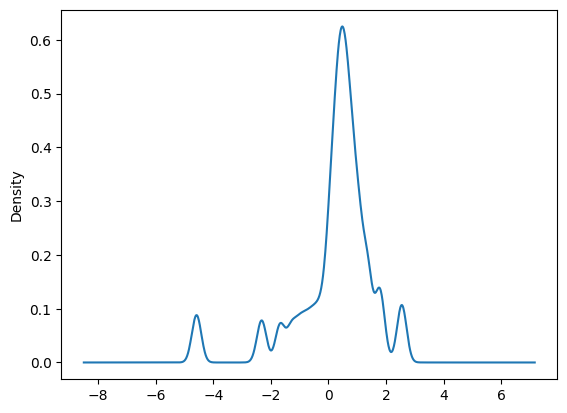

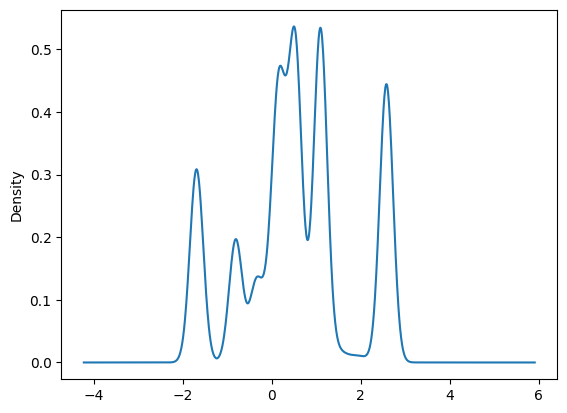

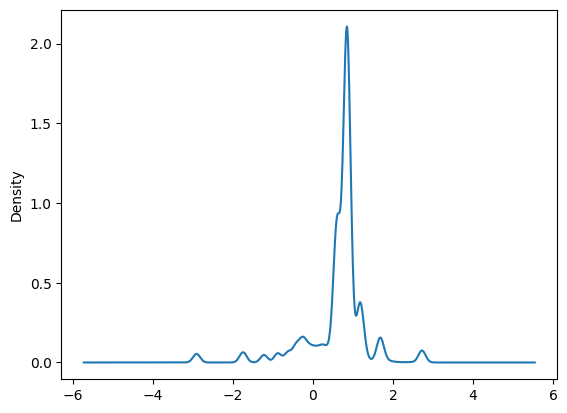

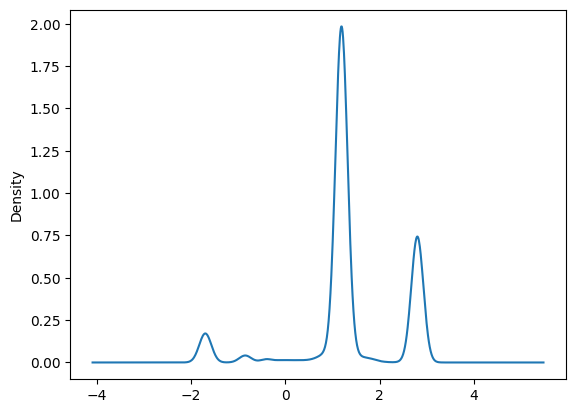

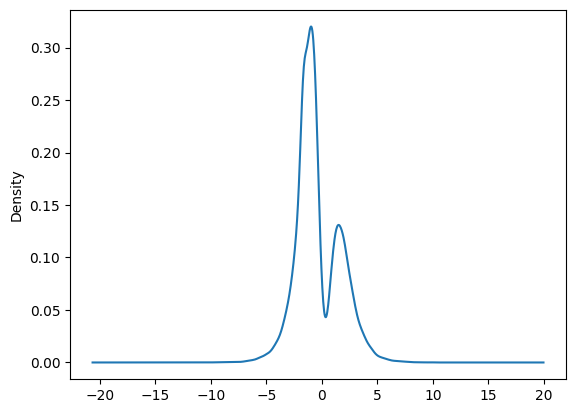

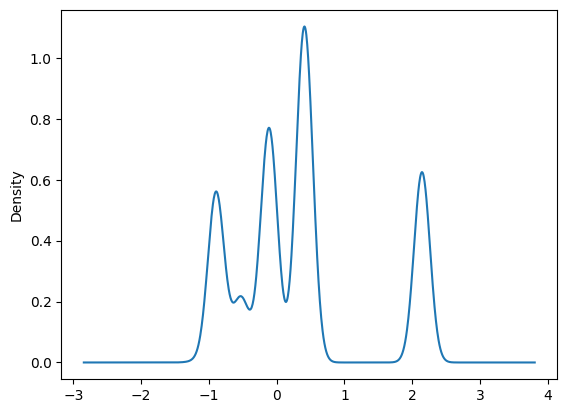

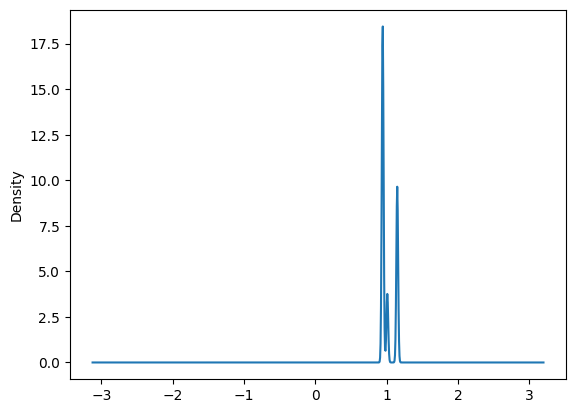

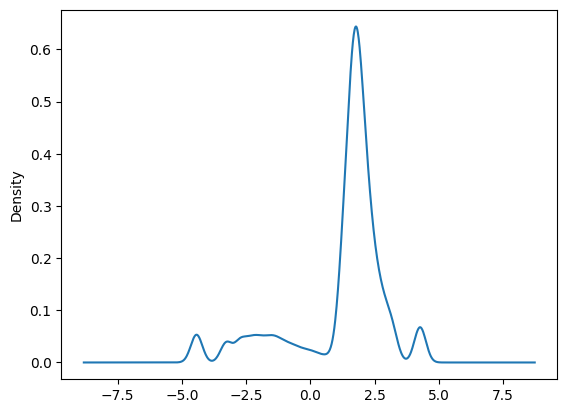

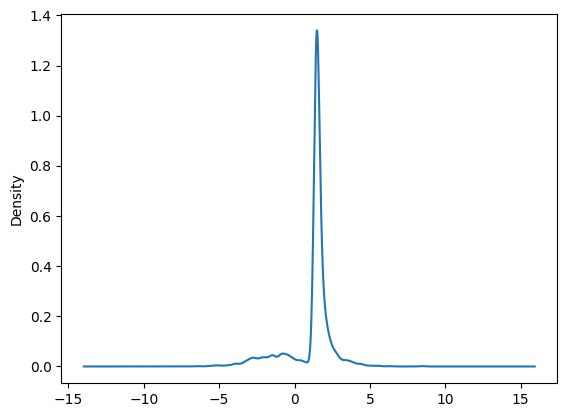

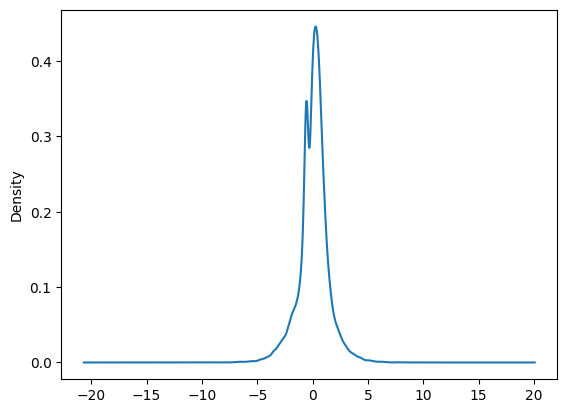

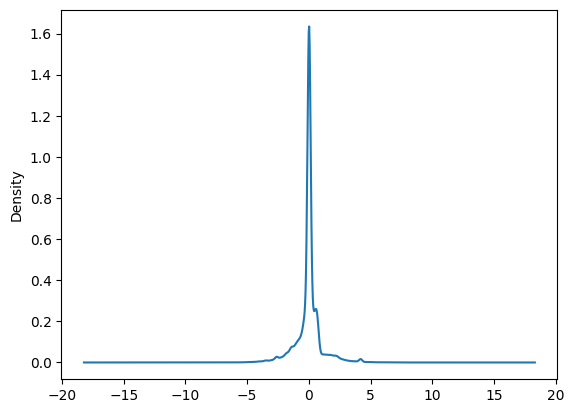

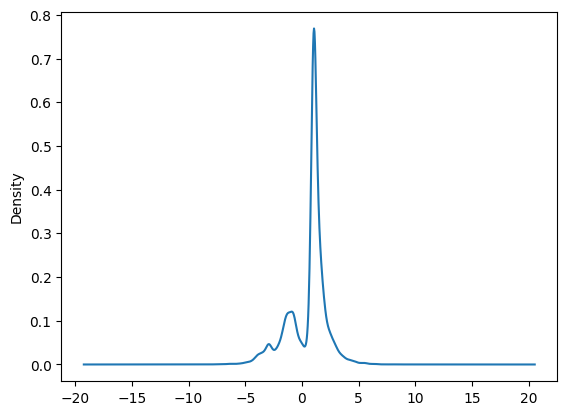

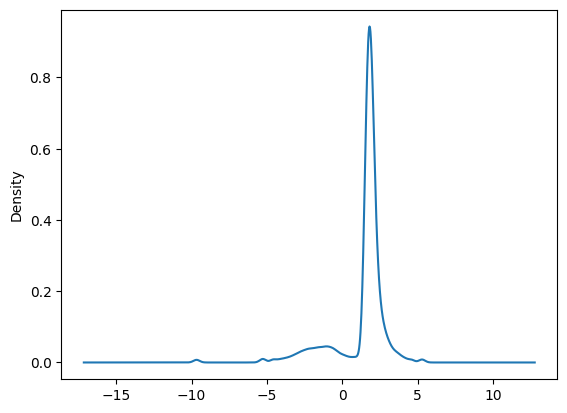

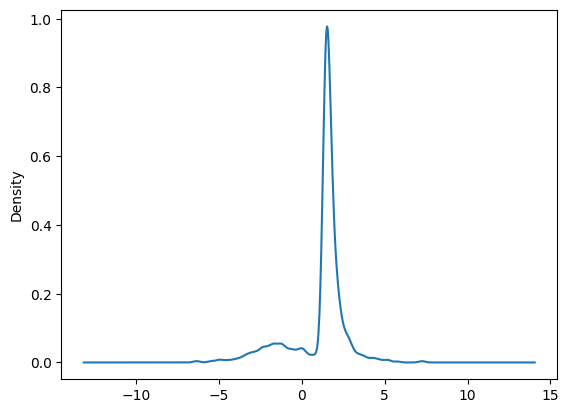

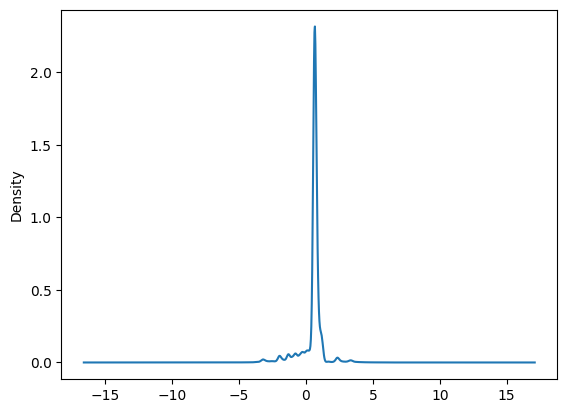

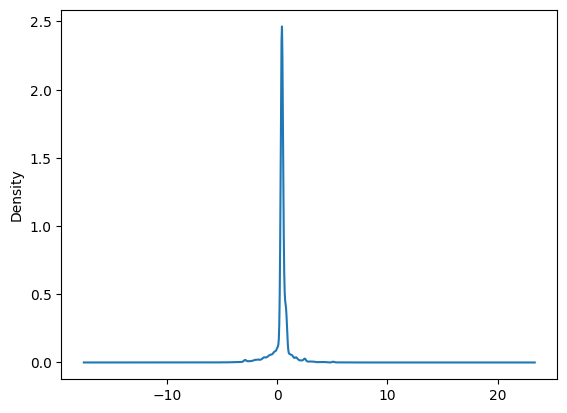

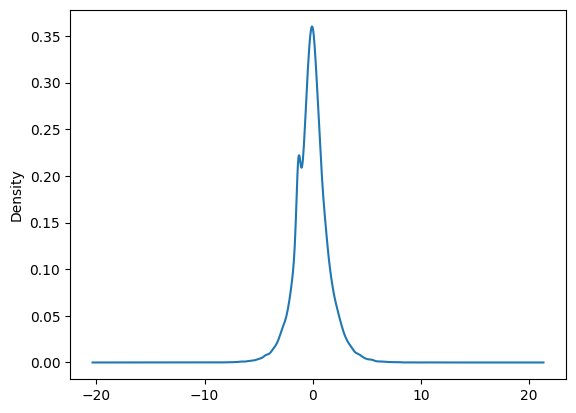

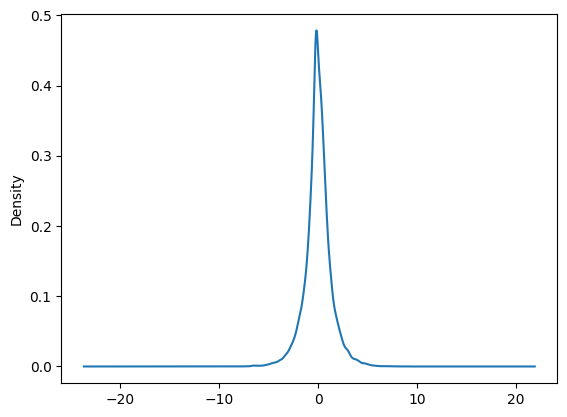

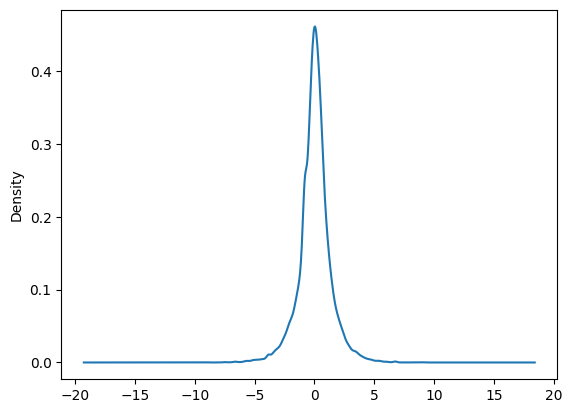

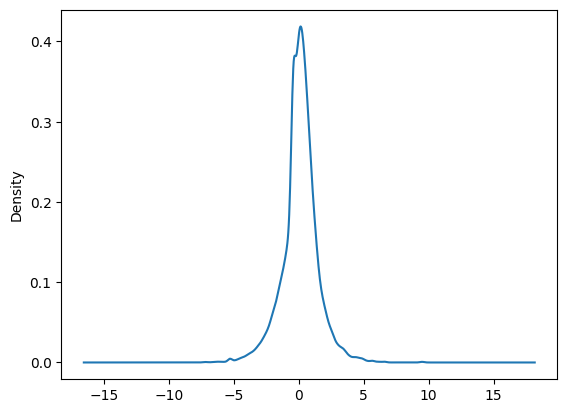

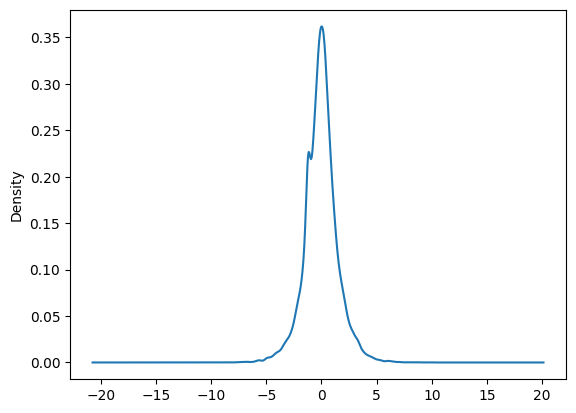

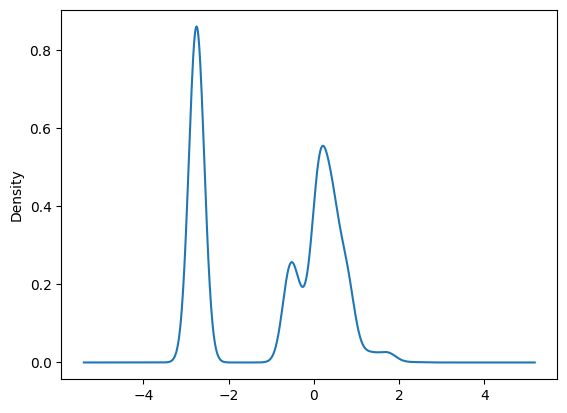

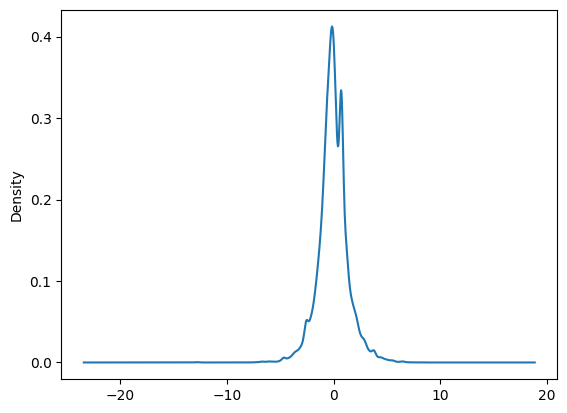

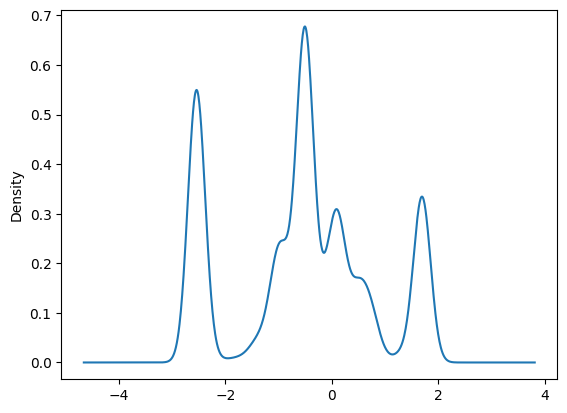

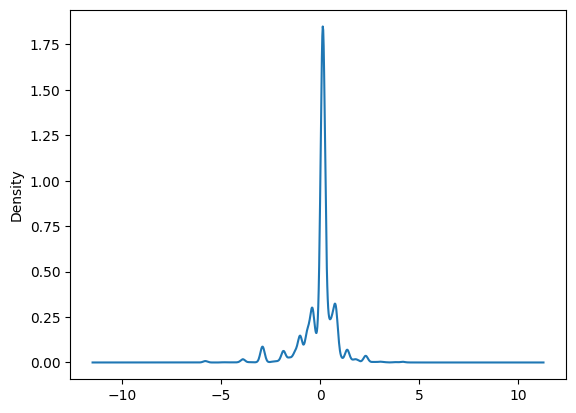

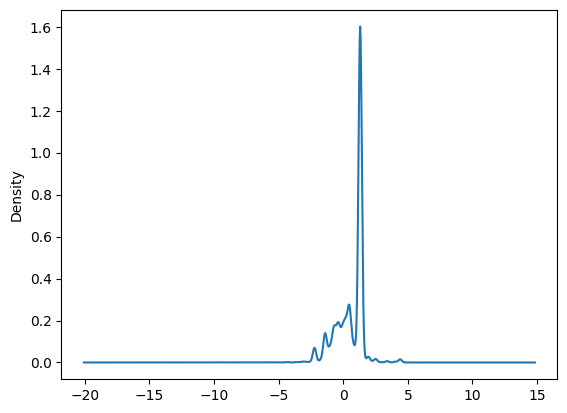

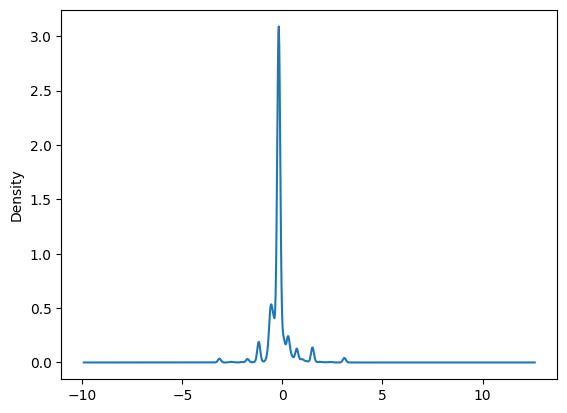

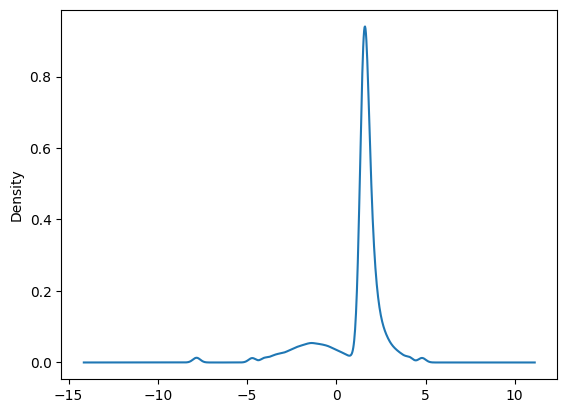

In [37]:
for col in log_transformed_df:
  if col in continuous_cols:
    plt.figure()
    print(col)
    log_transformed_df[col].plot(kind = 'density')

n_tokens_title
n_tokens_content
n_unique_tokens
n_non_stop_words
num_hrefs
num_self_hrefs
num_imgs
num_videos
average_token_length
num_keywords
kw_min_min
kw_max_min
kw_min_max
kw_avg_max
kw_min_avg
kw_max_avg
self_reference_min_shares
self_reference_max_shares
LDA_01
LDA_03


<ipython-input-38-97c8ae607ffd>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


global_subjectivity
global_sentiment_polarity
global_rate_positive_words
global_rate_negative_words
avg_positive_polarity
min_positive_polarity
avg_negative_polarity
max_negative_polarity
title_subjectivity
title_sentiment_polarity
abs_title_subjectivity
shares


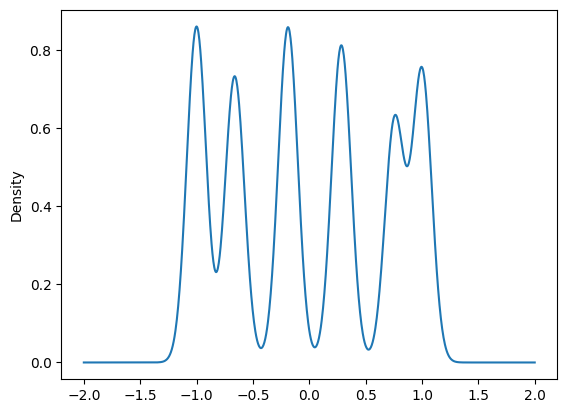

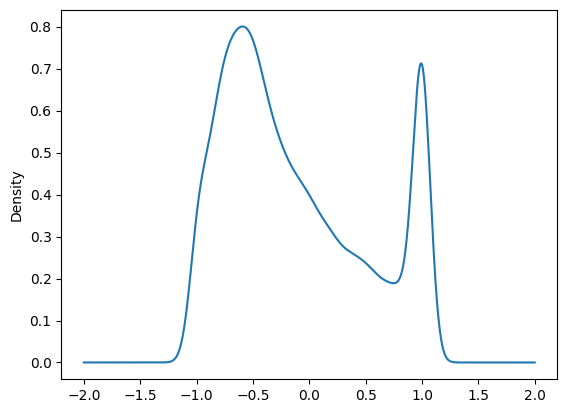

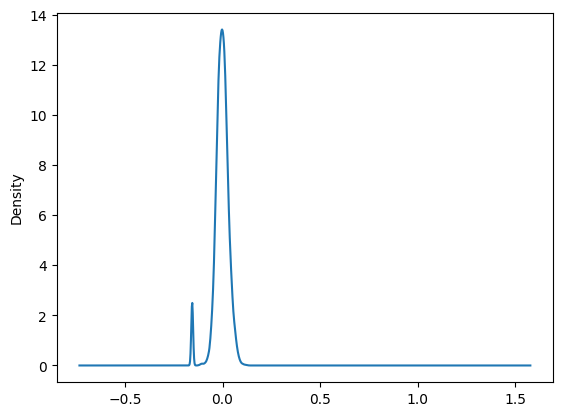

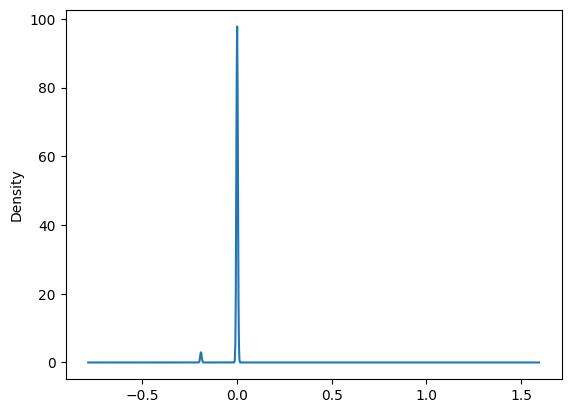

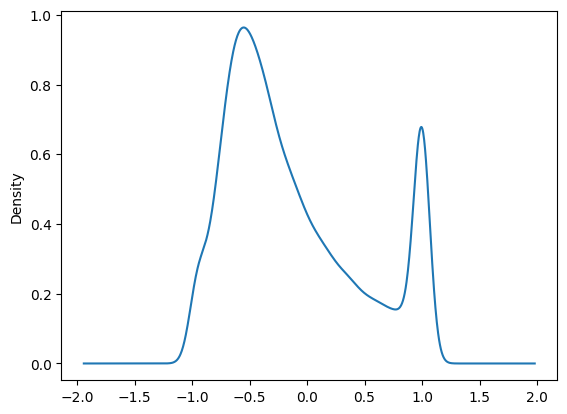

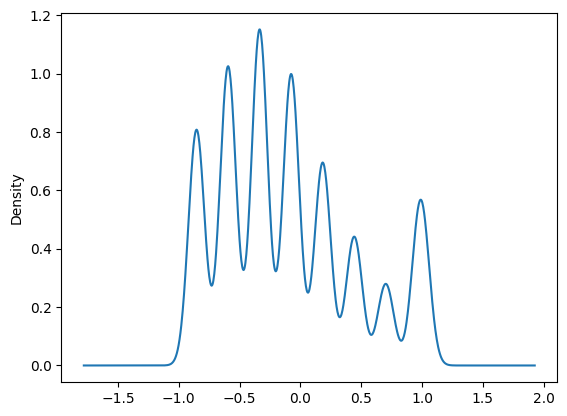

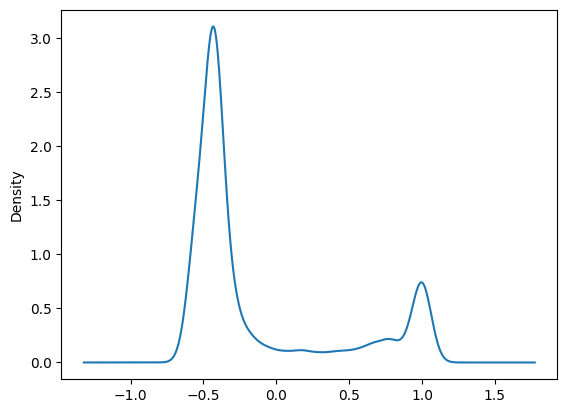

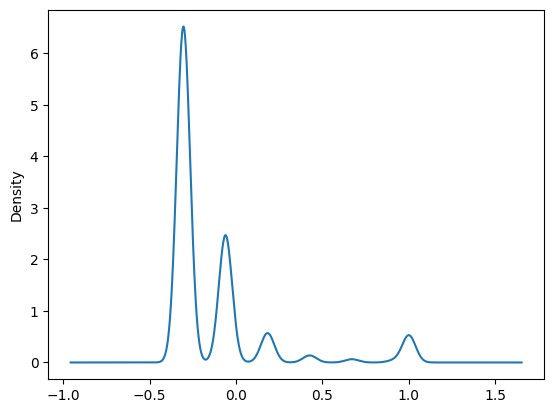

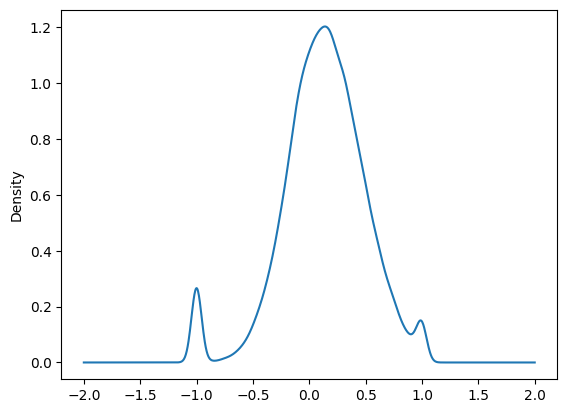

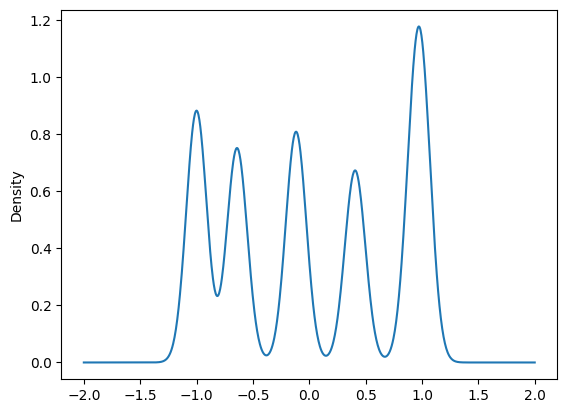

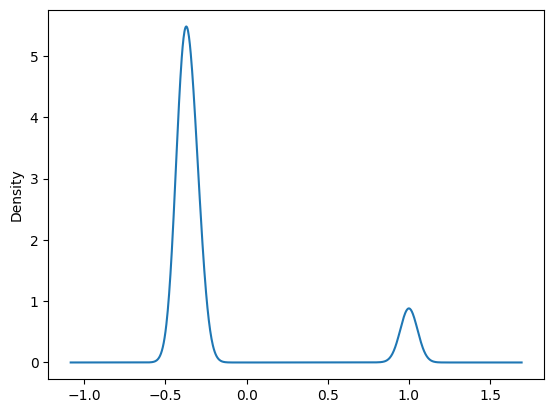

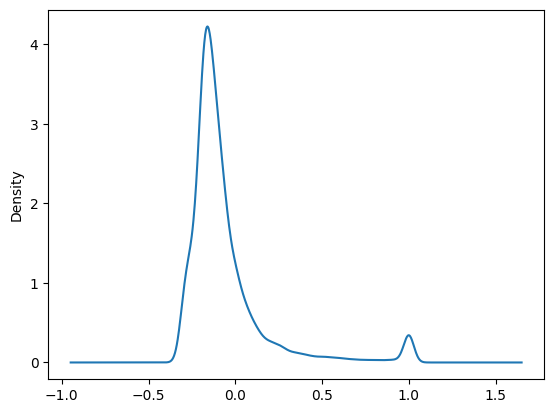

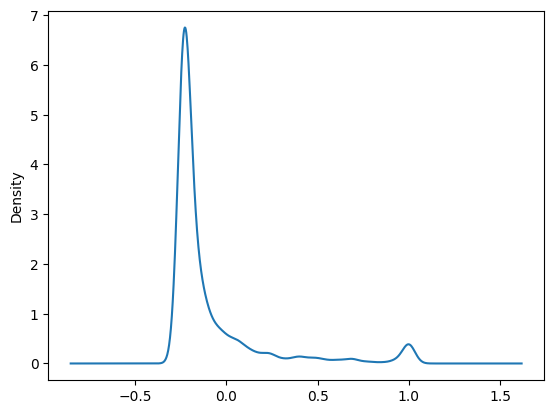

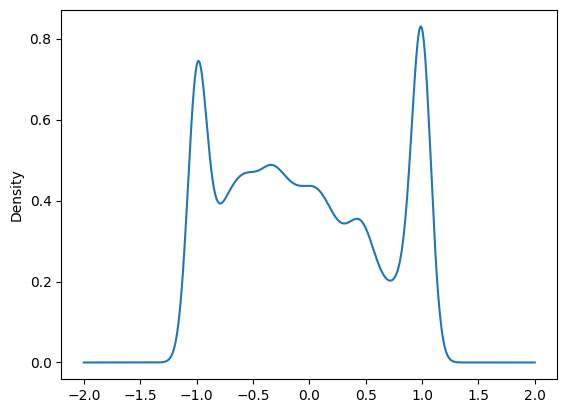

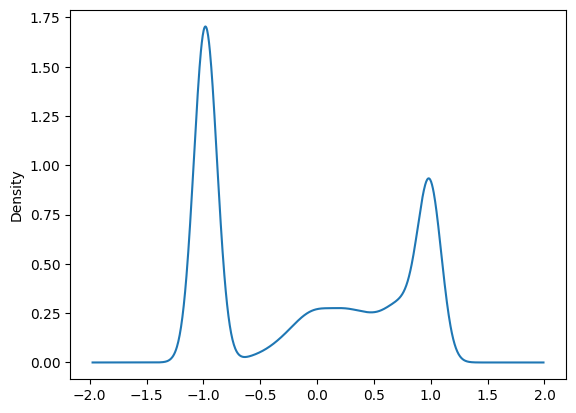

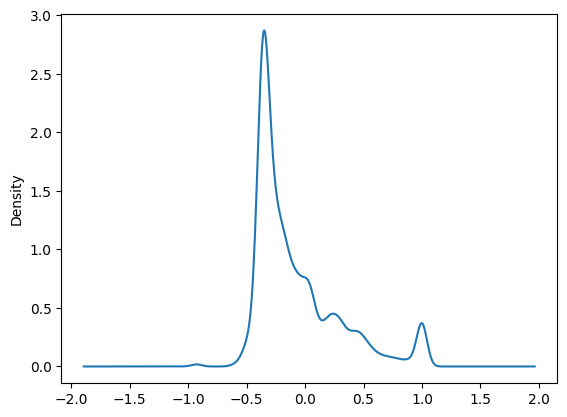

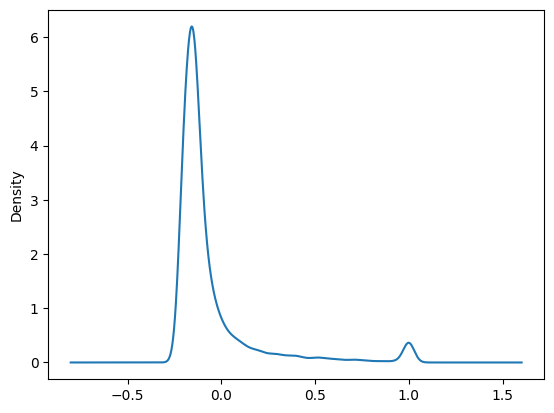

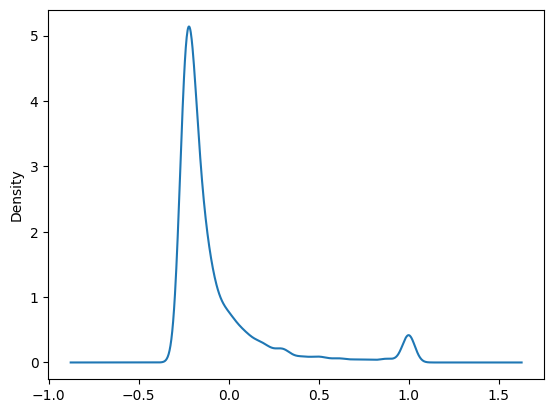

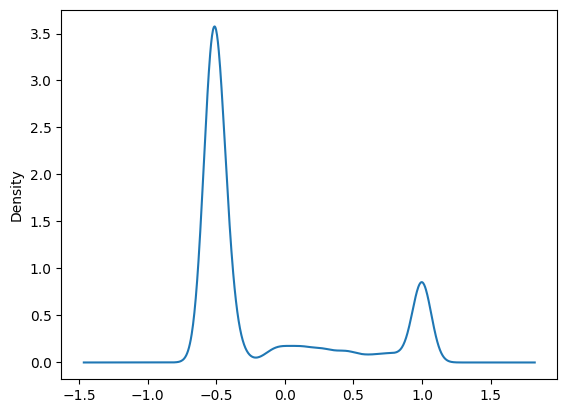

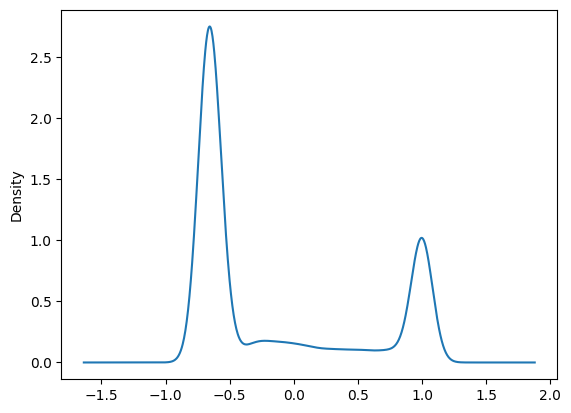

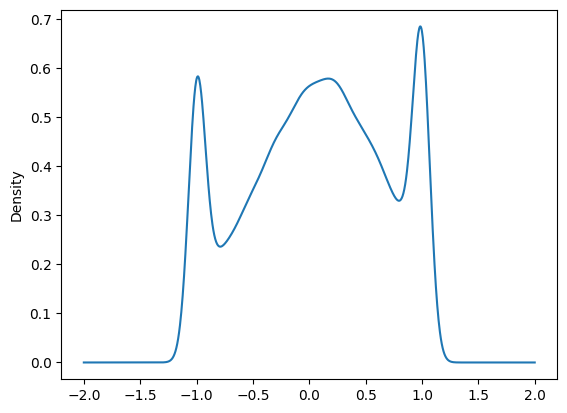

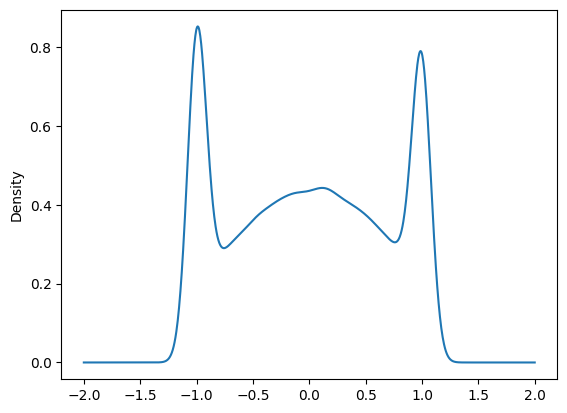

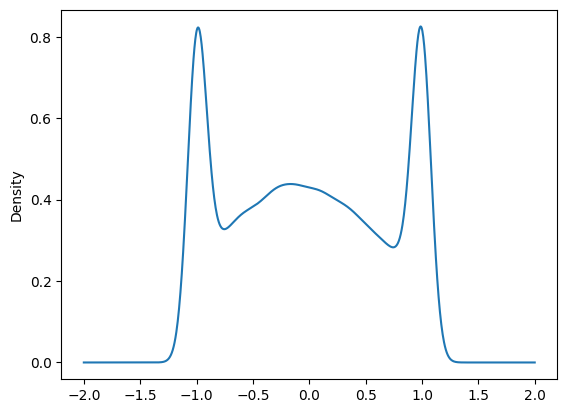

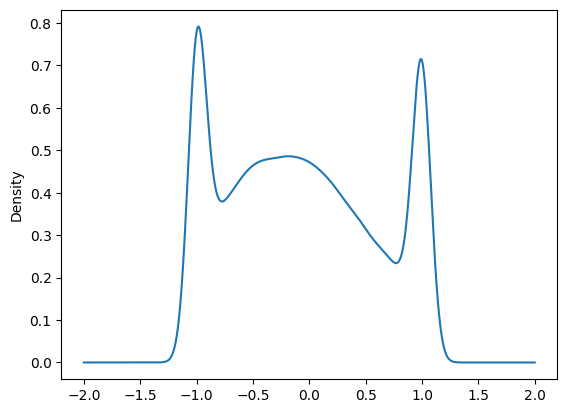

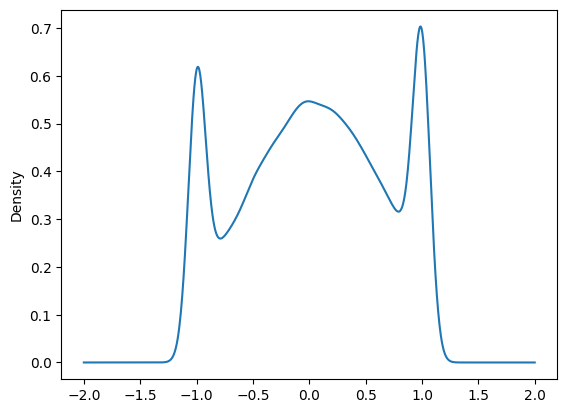

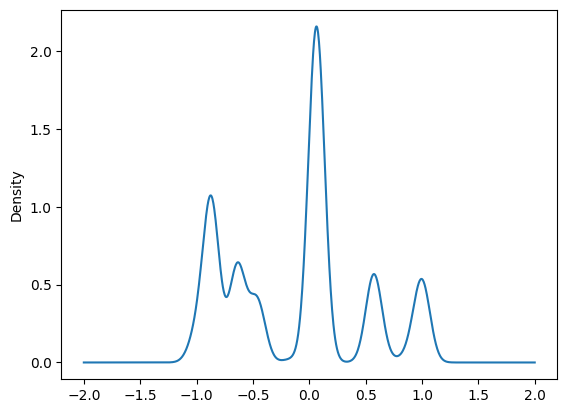

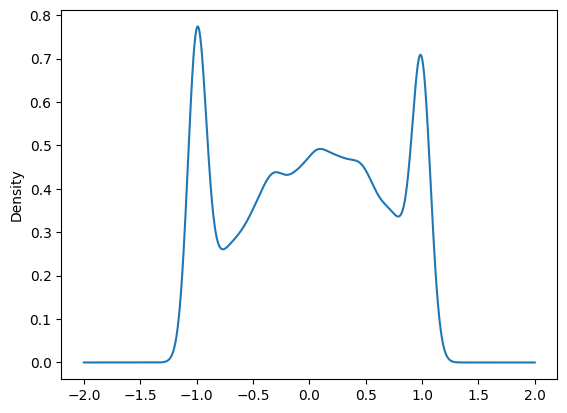

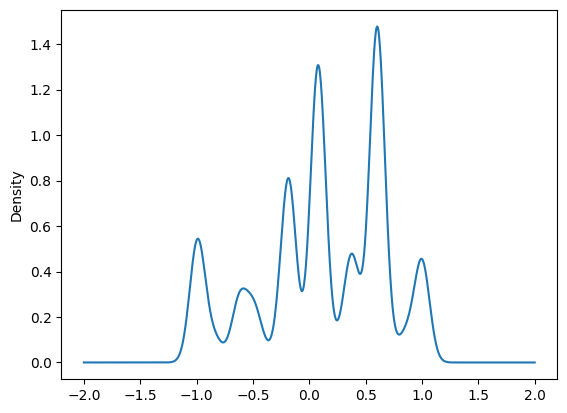

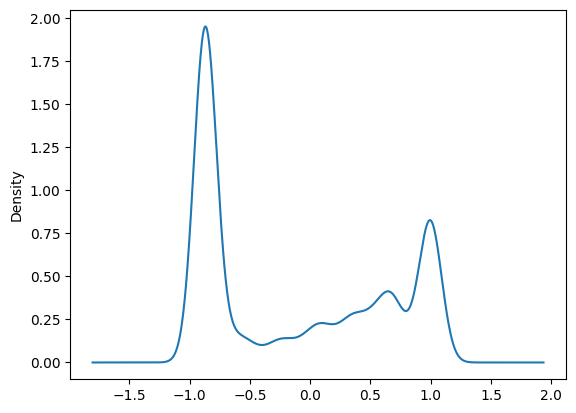

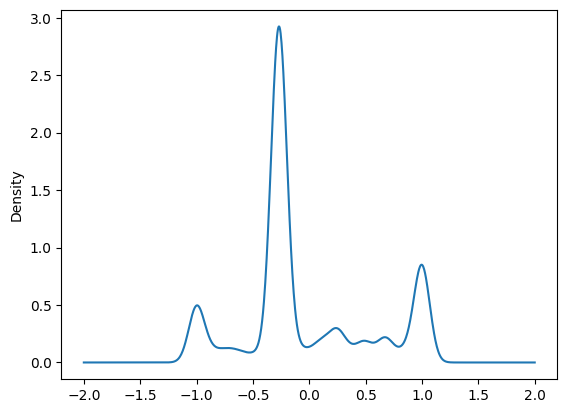

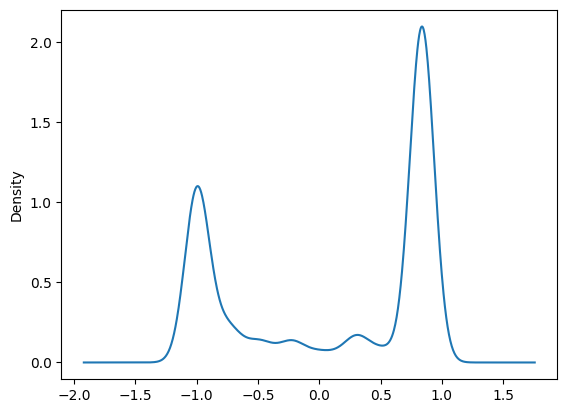

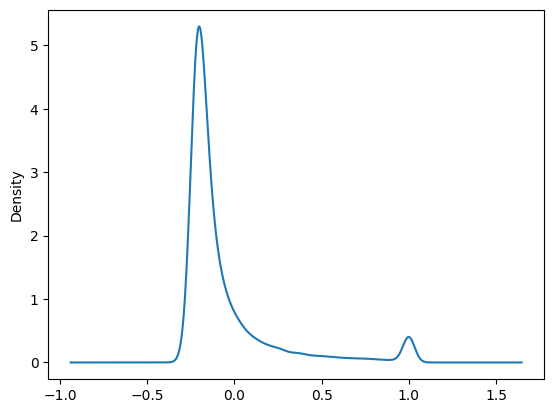

In [38]:
for col in continuous_col_df:
  if col in continuous_cols:
    plt.figure()
    print(col)
    continuous_col_df[col].plot(kind = 'density')

In [39]:
log_transformed_df_1 = pd.concat([log_transformed_df,discrete_col_df], axis=1)
log_transformed_df_1

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0           -0.277801          0.363541        -3.418185         -7.300687   
1            0.413009          0.479983        -4.131680         -7.300687   
2            0.413009          0.339408        -4.873765         -7.300687   
3            0.413009          3.413284         4.372539         -7.300686   
4            0.207406          0.109248         3.279293         -7.300686   
...               ...               ...              ...               ...   
39639       -1.257329          0.854186         5.213385         -7.300687   
39640       -0.277801          0.768220        -3.168648         -7.300687   
39641        1.668010          1.505746         4.705035         -7.300686   
39642       -0.732733         -1.246211         6.000508         -7.300686   
39643        1.668010          0.190172        -3.130940         -7.300688   

       num_hrefs  num_self_hrefs  num_imgs  num_videos  average_token_length  \
0       0.498465        1.091936  0.852082    1.189846             -1.854864   
1       0.362823        0.519256  0.852082    1.189846             -0.837392   
2       0.362823        0.519256  0.852082    1.189846              1.696006   
3       1.794387        0.157402  0.852082    1.189846              1.773381   
4      -0.333744        1.404671  0.620609    1.189846             -1.836339   
...          ...             ...       ...         ...                   ...   
39639   1.794387       -0.039344  0.852082    2.799687              3.515038   
39640   1.794387       -0.039344  1.682910    2.431929              1.777515   
39641   0.146237        0.519256 -0.108379    2.799687             -0.468230   
39642   2.551269        0.519256  0.852082    1.189846             -0.682225   
39643   0.136734        0.519256  0.603540   -1.700402              2.396092   

       num_keywords  ...  data_channel_is_tech  data_channel_is_world  \
0         -0.152567  ...                     0                      0   
1         -0.523915  ...                     0                      0   
2          0.444702  ...                     0                      0   
3          2.143787  ...                     0                      0   
4          2.143787  ...                     1                      0   
...             ...  ...                   ...                    ...   
39639     -0.899937  ...                     1                      0   
39640      2.143787  ...                     0                      0   
39641     -0.899937  ...                     0                      0   
39642     -0.152567  ...                     0                      1   
39643     -0.523915  ...                     0                      0   

       weekday_is_monday  weekday_is_tuesday  weekday_is_wednesday  \
0                      1                   0                     0   
1                      1                   0                     0   
2                      1                   0                     0   
3                      1                   0                     0   
4                      1                   0                     0   
...                  ...                 ...                   ...   
39639                  0                   0                     1   
39640                  0                   0                     1   
39641                  0                   0                     1   
39642                  0                   0                     1   
39643                  0                   0                     1   

       weekday_is_thursday  weekday_is_friday  weekday_is_saturday  \
0                        0                  0                    0   
1                        0                  0                    0   
2                        0                  0                    0   
3                        0                  0                    0   
4                        0               

In [40]:
log_transformed_df.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'num_videos', 'average_token_length', 'num_keywords', 'kw_min_min',
       'kw_max_min', 'kw_min_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'self_reference_min_shares', 'self_reference_max_shares', 'LDA_01',
       'LDA_03', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'avg_positive_polarity', 'min_positive_polarity',
       'avg_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity', 'shares'],
      dtype='object')

In [41]:
df_outliers = corr_df.select_dtypes(['int64','float64']).columns

In [42]:
for column in df_outliers:    
    q1 = corr_df[column].quantile(0.25)    # First Quartile
    q3 = corr_df[column].quantile(0.75)    # Third Quartile
    IQR = q3 - q1                            # Inter Quartile Range

    llimit = q1 - 1.5*IQR                       # Lower Limit
    ulimit = q3 + 1.5*IQR                        # Upper Limit

    outliers = df[(df[column] < llimit) | (df[column] > ulimit)]
    print('Number of outliers in "' + column + '" : ' + str(len(outliers)))
    print(llimit)
    print(ulimit)
    print(IQR)

Number of outliers in "n_tokens_title" : 156
4.5
16.5
3.0
Number of outliers in "n_tokens_content" : 1933
-459.0
1421.0
470.0
Number of outliers in "n_unique_tokens" : 1604
0.26413257237362486
0.8154334940046252
0.13782523040775008
Number of outliers in "n_non_stop_words" : 2827
0.9999999868620002
1.000000004118
4.313999935057211e-09
Number of outliers in "num_hrefs" : 2169
-11.0
29.0
10.0
Number of outliers in "num_self_hrefs" : 2090
-3.5
8.5
3.0
Number of outliers in "num_imgs" : 7703
-3.5
8.5
3.0
Number of outliers in "num_videos" : 2946
-1.5
2.5
1.0
Number of outliers in "average_token_length" : 1681
3.9137519022487495
5.419490794138751
0.37643472297250025
Number of outliers in "num_keywords" : 51
1.5
13.5
3.0
Number of outliers in "data_channel_is_lifestyle" : 2099
0.0
0.0
0.0
Number of outliers in "data_channel_is_entertainment" : 7057
0.0
0.0
0.0
Number of outliers in "data_channel_is_bus" : 6258
0.0
0.0
0.0
Number of outliers in "data_channel_is_socmed" : 2323
0.0
0.0
0.0
Numbe

In [43]:
log_outliers = log_transformed_df_1.select_dtypes(['int64','float64']).columns

In [44]:
for column in log_outliers:    
    q1 = log_transformed_df_1[column].quantile(0.25)    # First Quartile
    q3 = log_transformed_df_1[column].quantile(0.75)    # Third Quartile
    IQR = q3 - q1                            # Inter Quartile Range

    llimit = q1 - 1.5*IQR                       # Lower Limit
    ulimit = q3 + 1.5*IQR                        # Upper Limit

    outliers = log_transformed_df_1[(log_transformed_df_1[column] < llimit) | (log_transformed_df_1[column] > ulimit)]
    print('Number of outliers in "' + column + '" : ' + str(len(outliers)))
    print(llimit)
    print(ulimit)
    print(IQR)

Number of outliers in "n_tokens_title" : 0
-1.9860936950938797
2.043967634719162
1.0075153324532604
Number of outliers in "n_tokens_content" : 4325
-1.6450357173993755
2.3457593892946953
0.9976987766735177
Number of outliers in "n_unique_tokens" : 0
-15.65457072390253
15.719701059684677
7.843567945896802
Number of outliers in "n_non_stop_words" : 3070
-7.300688604057373
-7.300683992894636
1.1527906842445645e-06
Number of outliers in "num_hrefs" : 6594
-1.1616922328507098
2.0437648662640715
0.8013642747786953
Number of outliers in "num_self_hrefs" : 2
-1.7362652323335743
2.788857232693168
1.1312806162566855
Number of outliers in "num_imgs" : 9019
0.23072553715760669
1.2248966457715278
0.24854277715348028
Number of outliers in "num_videos" : 12926
0.6192071756826356
2.1409100533614396
0.38042571941970094
Number of outliers in "average_token_length" : 320
-5.9231257728701285
5.381542475318097
2.8261670620470563
Number of outliers in "num_keywords" : 7373
-1.0484706198897882
1.340605275511

# PCA - CPU

In [ ]:
CPU=[]
Memory=[]

In [ ]:
class LinearRegression:
  def __init__(self,X,y,learningRate,epsilon,maIteration,regPara,stochasticGradient=False,ridge=False,regularization=False,gd=False,partition=False) -> None:
    self.X=X
    self.y=y
    self.learningRate=learningRate
    self.epsilon=epsilon
    self.maIteration=maIteration
    self.regPara=regPara
    self.stochasticGradient=stochasticGradient
    self.regularization=regularization
    self.gd=gd
    self.ridge=ridge
    self.partition=partition

#First we need to split the data and then proceed with the further calculations

  def parti(self,X,y):
            data=self.y

            q1 = np.percentile(data, 10)
            q2 = np.percentile(data, 50)
            q3 = np.percentile(data, 75)
            q4 = np.percentile(data, 99)
            indices_within_range0 = np.where((data < q1))[0]
            indices_within_range1 = np.where((data >= q1) & (data < q2))[0]
            indices_within_range2 = np.where((data >= q2) & (data < q3))[0]
            indices_within_range3 = np.where((data >= q3) & (data < q4))[0]
            indices_within_range4 = np.where((data >= q4))[0]
            train_indices0 = indices_within_range0[:int(len(indices_within_range0) * 0.8)]  # 80% for train
            test_indices0= indices_within_range0[int(len(indices_within_range0) * 0.8):]   # 20% for test
            train_indices1 = indices_within_range1[:int(len(indices_within_range1) * 0.8)]  
            test_indices1 = indices_within_range1[int(len(indices_within_range1) * 0.8):]   
            train_indices2 = indices_within_range2[:int(len(indices_within_range2) * 0.8)]  
            test_indices2 = indices_within_range2[int(len(indices_within_range2) * 0.8):]   
            train_indices3 = indices_within_range3[:int(len(indices_within_range3) * 0.8)]  
            test_indices3 = indices_within_range3[int(len(indices_within_range3) * 0.8):]   
            train_indices4 = indices_within_range4[:int(len(indices_within_range4) * 0.8)]  
            test_indices4 = indices_within_range4[int(len(indices_within_range4) * 0.8):]   
            X_train0=self.X.iloc[train_indices0]
            X_train1=self.X.iloc[train_indices1]
            X_train2=self.X.iloc[train_indices2]
            X_train3=self.X.iloc[train_indices3]
            X_train4=self.X.iloc[train_indices4]

            X_test0=self.X.iloc[test_indices0]
            X_test1=self.X.iloc[test_indices1]
            X_test2=self.X.iloc[test_indices2]
            X_test3=self.X.iloc[test_indices3]
            X_test4=self.X.iloc[test_indices4]

            y_train0=self.y.iloc[train_indices0]
            y_train1=self.y.iloc[train_indices1]
            y_train2=self.y.iloc[train_indices2]
            y_train3=self.y.iloc[train_indices3]
            y_train4=self.y.iloc[train_indices4]

            y_test0=self.y.iloc[test_indices0]
            y_test1=self.y.iloc[test_indices1]
            y_test2=self.y.iloc[test_indices2]
            y_test3=self.y.iloc[test_indices3]
            y_test4=self.y.iloc[test_indices4]


            X_train=pd.concat([X_train0,X_train1, X_train2, X_train3,X_train4], axis=0)
            X_test=pd.concat([X_test0,X_test1, X_test2, X_test3,X_test4], axis=0)
            y_train=pd.concat([y_train0,y_train1, y_train2, y_train3,y_train4], axis=0)
            y_test=pd.concat([y_test0,y_test1, y_test2, y_test3,y_test4], axis=0)
            return X_train,X_test,y_train,y_test
            
            
  def splitData(self):
            X_train,X_test,y_train,y_test=train_test_split(self.X,self.y,test_size=0.3,random_state=0)
            return X_train,X_test,y_train,y_test 
#Adding the Constant Feature: For every regression problem we add a column of ones to your dataset.  
  def add_X0(self,X):
    return np.column_stack([np.ones([X.shape[0],1]),X])
#Normalize the features in the Train data using z-score normalization
  def normalizeTrain(self,X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    X_norm=(X-mean)/std
    X_norm=self.add_X0(X_norm)
    return X_norm,mean,std
#Normalize the features in the Test data using z-score normalization
  def normalizeTest(self,X,mean,std):
    X_norm=(X-mean)/std
    X_norm=self.add_X0(X_norm)
    return X_norm

#Inorder to check for the feasibility of closed form solution, we need to check if it is Full rank matrix or low rank matrix
  def rank(self,X):
    v,s,u=np.linalg.svd(X)
    rank = sum([1 if i >0 else 0 for i in s])
    rank=np.linalg.matrix_rank(X)
    return rank

  def checkFullrank(self,X):
    rank=self.rank(X)
    if rank == min(X.shape):
      print("It is a full rank")
      self.fullRank=True
    else:
      self.fullRank=False
  
  def checkLowrank(self,X):
    if X.shape[1]>X.shape[0]:
      print("It is low Rank")
      self.lowRank=True
    else:
      self.lowRank=False
#Closed Form solution for Linear Regression without regularization
  def closedForm(self,X,y):
   w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
   return w
#Closed Form solution for Linear Regression with regularization
  def closedFormReg(self,X,y,regPara):
     inv_var = X.T.dot(X) + regPara* np.identity(X.shape[1])
     w = np.linalg.inv(inv_var).dot(X.T).dot(y)
     return w

  def predict(self,X):       
   return X.dot(self.w)
#Calculating the Sum of Square Error
  def sse(self,X,y):
    y_hat=self.predict(X)
    return ((y_hat-y)**2).sum()
#Calculating the Root Mean Square Error
  def rmse(self, X, y):
    y_hat = self.predict(X)
    return np.sqrt((((y_hat - y) ** 2).sum())/X.shape[0])

  def costFunction(self,X,y):
    return self.sse(X,y)/2

  def costDerivative(self,X,y):
    y_hat=self.predict(X)
    return (y_hat-y).dot(X)

  def costDerivativesForRegularization(self, X, y):
        y_hat = self.predict(X)
        return X.T.dot(y_hat - y) + self.regPara*(self.w)

  def costDerivativesForRegularization_lasso(self, X, y):
        y_hat = self.predict(X)
        return X.T.dot(y_hat - y) + self.regPara

#Gradient Descent for Linear Regression
  def gradientDescent(self, X, y):
        
        if self.regularization:
          print('Solving using regularization')
          if not 0 < self.regPara < 1:
            raise Exception("Sorry, regularizationParam not defined or not in range 0 and 1")
        if not self.ridge:
            print('Solving using Lasso')
        if self.ridge:
            print('Solving using Ridge')

        self.errors = []
        
        last_error =  float('inf')
        
        for i in tqdm(range(self.maIteration)):
            if not self.regularization:
                self.w = self.w - self.learningRate * self.costDerivative(X, y)
                
            elif self.ridge:
                self.w = self.w - self.learningRate * self.costDerivativesForRegularization(X, y)
                
            elif not self.ridge and self.regularization: 
                self.w = self.w - self.learningRate * self.costDerivativesForRegularization_lasso(X, y)
                
            
            current_error = self.sse(X, y)
            
            diff = last_error - current_error
            last_error = current_error
            
            self.errors.append(current_error)
            
            if diff < self.epsilon:
                print("The model stopped learning")
                self.plot_rmse(self.errors)
                break
        
##Stochastic Gradient Descent for Linear Regression
  def StochasticGradientDescent(self,X,y):
    self.errors=[]
    last_error=float('inf')
    for i in tqdm(range(self.maIteration)):
      X=X[0:250,:]    #sampling 250 instances
      y=y[0:250]  
      self.w=self.w-self.learningRate*self.costDerivative(X,y)
      current_error=self.sse(X,y)
      diff=last_error-current_error
      self.errors.append(current_error)
      last_error=current_error
      if(diff<self.epsilon):
        print("model stopped learning")
        break
    self.plot_rmse(self.errors)
#Function to perform the model    
  def fit(self):
    if not self.partition:
                      X_train,X_test,y_train,y_test=self.splitData()
                      X_train,mean,std=self.normalizeTrain(X_train)
                      X_test=self.normalizeTest(X_test,mean,std)
    else:
            X_train,X_test,y_train,y_test=self.parti(self.X,self.y)
            X_train,mean,std=self.normalizeTrain(X_train)
            X_test=self.normalizeTest(X_test,mean,std)
                

    self.checkFullrank(X_train)
    self.checkLowrank(X_train)

    if self.fullRank and not self.lowRank and not self.gd and not self.stochasticGradient and X_train.shape[0] < 10000:
      if not self.regularization:
        print("Solving using Normal equation")
        self.w = self.closedForm(X_train, y_train)
      else:
        print("Solving using Normal equation with regularization")
        self.w = self.closedFormReg(X_train, y_train,self.regPara)
      print("weights : ", self.w)
      print('SSE for the test dataset : ', self.sse(X_test, y_test))
      print('RMSE for the test dataset : ', self.rmse(X_test, y_test))
        
        
#Initialize the weights for the stochastic gradient descent algorithm to all zeros
    elif self.stochasticGradient:
         print("Solving using Stochastic GD")
         self.w = np.ones(X_train.shape[1], dtype=np.float64) * 0
         self.StochasticGradientDescent(X_train, y_train)
         

         print("weights : ", self.w)
         print('SSE for the test dataset : ', self.sse(X_test, y_test))
         print('RMSE for the test dataset : ', self.rmse(X_test, y_test))
         return self.errors
#Initialize the weights for the gradient descent algorithm and calculating to all zeros
    else:
      print("Solving using Gradient Descent")
      self.w = np.ones(X_train.shape[1], dtype=np.float64) * 0
      self.gradientDescent(X_train, y_train)

      print("weights : ", self.w)
      print('SSE for the test dataset : ', self.sse(X_test, y_test))
      print('RMSE for the test dataset : ', self.rmse(X_test, y_test))
      return self.errors

  def plot_rmse(self, error_sequence):
        """
        @X: error_sequence, vector of rmse
        @does: Plots the error function
        @return: plot
        """
        # Data for plotting
        s = np.array(error_sequence)
        t = np.arange(s.size)

        fig, ax = plt.subplots()
        ax.plot(t, s)

        plt.legend(bbox_to_anchor=(1.05,1), loc=2, shadow=True)
        plt.show()   
  

In [ ]:
for i in range(1,45):

        class PCA():

          def __init__(self, df,undersample = True, n=1000, oversample=True, encode_y = True,) -> None:
            self.df = df
            self.n = n
            self.undersample = undersample
            self.oversample = oversample
            self.encode_y = encode_y
            self.n_components = None
            self.components = None
            self.eigenvectors = None

          def undersample_0(self):
            df = pd.concat([self.X_train, self.y_train], axis=1)
            temp1 = df[df['y'] == 0]
            temp2 = df[df['y'] != 0]

            temp1 = temp1.sample(self.n, replace=True, random_state=0)
            #print(temp1.shape, temp2.shape)
            df = pd.concat([temp1, temp2], ignore_index=True)
            #print(self.df.shape)
            self.y_train = df['y']
            self.X_train = df.loc[:, df.columns!='y']

          def oversample_123(self):
            sm= SMOTE(random_state=42)
            self.X_train, self.y_train = sm.fit_resample(self.X_train, self.y_train)

          def data_split(self, df):
            self.y = df['y']
            self.X = df.loc[:, df.columns!='y']
            X_tv, X_test, y_tv, y_test = train_test_split(self.X, self.y, test_size = 0.3,
                                                          random_state= 0, stratify= self.y)
            X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size = 0.3, 
                                                              random_state= 0, stratify= y_tv)
            self.X_train = pd.DataFrame(X_train)
            self.X_val = pd.DataFrame(X_val)
            self.X_test = pd.DataFrame(X_test)
            self.y_train = pd.DataFrame(y_train)
            self.y_val = pd.DataFrame(y_val)
            self.y_test = pd.DataFrame(y_test)

          def standardize_data(self):
            temp = self.X_train
            for column in temp:
              numerical_types = ['float64', 'int64']
              if temp.dtypes[column] in numerical_types:
                mean = np.mean(self.X_train[column],0)
                std = np.std(self.X_train[column],0)
                self.X_train[column] = (self.X_train[column]-mean)/std
                self.X_test[column] = (self.X_test[column]-mean)/std
                self.X_val[column] = (self.X_val[column]-mean)/std

          def encode(self):
            enc = OneHotEncoder(sparse=False, categories='auto')

            self.y_train = enc.fit_transform(self.y_train.values.reshape(len(self.y_train), -1))
            self.y_test = enc.transform(self.y_test.values.reshape(len(self.y_test), -1))
            self.y_val = enc.transform(self.y_val.values.reshape(len(self.y_val), -1))

          def fit(self):
            self.data_split(self.df)
            if (self.undersample):
              print("undersampling")
              self.undersample_0()
            if (self.oversample):
              print("undersampling")
              self.oversample_123()
            if (self.encode_y):
              self.encode()    
            print('standardizing')
            self.standardize_data()

            #pca
            cov = np.dot(self.X_train.T, self.X_train)
            eigenvalues, eigenvectors = np.linalg.eig(cov)
            P = eigenvectors
            idx = np.argsort(eigenvalues)[::-1]
            eigenvalues = eigenvalues[idx].T
            self.eigenvectors = eigenvectors[idx].T
            cumsum = []
            for i in range(len(eigenvalues)+1):
              pc = eigenvalues[0: i]
              cumsum.append(pc.sum()/eigenvalues.sum())
              #print("Variance captured by {} Principal Components is {}%".format(i,pc.sum()/eigenvalues.sum()))

          def transform(self,n_components):
            self.components = self.eigenvectors[0: n_components].T
            self.X_train = pd.DataFrame(np.dot(self.X_train,self.components))
            self.X_test = pd.DataFrame(np.dot(self.X_test,self.components))
            self.X_val = pd.DataFrame(np.dot(self.X_val,self.components))
            self.y_train = pd.DataFrame(self.y_train)
            self.y_val = pd.DataFrame(self.y_val)
            self.y_test = pd.DataFrame(self.y_test)
            return self.X_train, self.X_val, self.X_test, self.y_train, self.y_val, self.y_test
        pca = PCA(log_transformed_df_1,encode_y=False)
        pca.fit()
        
        X_pca_tr, X_pca_val, X_pca_test, y_pca_tr, y_pca_val, y_pca_test = pca.transform(n_components=i)
        #print(X_pca_tr.shape, X_pca_val.shape, X_pca_test.shape, y_pca_tr.shape, y_pca_val.shape, y_pca_test.shape)
        df_pca_X=pd.concat([X_pca_tr, X_pca_val,X_pca_test,], axis=0)
        df_pca_y=pd.concat([y_pca_tr, y_pca_val, y_pca_test],axis=0)
        reg=LinearRegression(df_pca_X,df_pca_y['y'],learningRate=0.00001,epsilon=0.0001,maIteration=50000,gd=True,stochasticGradient=False,
                             regularization=True,regPara=0.001,partition=False,ridge=True)
        
        reg.fit()
        cpu_percent = psutil.cpu_percent(interval=1)
        memory_percent = psutil.virtual_memory().percent
        CPU.append(cpu_percent)
        Memory.append(memory_percent)
        print(f"CPU percent used: {cpu_percent}%")
        print(f"Memory percent used: {memory_percent}%")
        del df_pca_y
        del X_pca_tr
        del X_pca_val
        del X_pca_test
        del y_pca_tr
        del y_pca_val
        del y_pca_test

        

In [ ]:
Memory

In [ ]:
CPU



```
# This is formatted as code
```

# PCA

In [50]:
class PCA():

  def __init__(self, df,undersample = True, n=1000, oversample=True, encode_y = True,) -> None:
    self.df = df
    self.n = n
    self.undersample = undersample
    self.oversample = oversample
    self.encode_y = encode_y
    self.n_components = None
    self.components = None
    self.eigenvectors = None

  def undersample_0(self):
    df = pd.concat([self.X_train, self.y_train], axis=1)
    temp1 = df[df['y'] == 0]
    temp2 = df[df['y'] != 0]

    temp1 = temp1.sample(self.n, replace=True, random_state=0)
    #print(temp1.shape, temp2.shape)
    df = pd.concat([temp1, temp2], ignore_index=True)
    #print(self.df.shape)
    self.y_train = df['y']
    self.X_train = df.loc[:, df.columns!='y']

  def oversample_123(self):
    sm= SMOTE(random_state=42)
    self.X_train, self.y_train = sm.fit_resample(self.X_train, self.y_train)

  def data_split(self, df):
    self.y = df['y']
    self.X = df.loc[:, df.columns!='y']
    X_tv, X_test, y_tv, y_test = train_test_split(self.X, self.y, test_size = 0.3,
                                                  random_state= 0, stratify= self.y)
    X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size = 0.3, 
                                                      random_state= 0, stratify= y_tv)
    self.X_train = pd.DataFrame(X_train)
    self.X_val = pd.DataFrame(X_val)
    self.X_test = pd.DataFrame(X_test)
    self.y_train = pd.DataFrame(y_train)
    self.y_val = pd.DataFrame(y_val)
    self.y_test = pd.DataFrame(y_test)
    
  def standardize_data(self):
    temp = self.X_train
    for column in temp:
      numerical_types = ['float64', 'int64']
      if temp.dtypes[column] in numerical_types:
        mean = np.mean(self.X_train[column],0)
        std = np.std(self.X_train[column],0)
        self.X_train[column] = (self.X_train[column]-mean)/std
        self.X_test[column] = (self.X_test[column]-mean)/std
        self.X_val[column] = (self.X_val[column]-mean)/std

  def encode(self):
    enc = OneHotEncoder(sparse=False, categories='auto')

    self.y_train = enc.fit_transform(self.y_train.values.reshape(len(self.y_train), -1))
    self.y_test = enc.transform(self.y_test.values.reshape(len(self.y_test), -1))
    self.y_val = enc.transform(self.y_val.values.reshape(len(self.y_val), -1))

  def fit(self):
    self.data_split(self.df)
    if (self.undersample):
      print("undersampling")
      self.undersample_0()
    if (self.oversample):
      print("undersampling")
      self.oversample_123()
    if (self.encode_y):
      self.encode()    
    print('standardizing')
    self.standardize_data()

    #pca
    cov = np.dot(self.X_train.T, self.X_train)
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    P = eigenvectors
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx].T
    self.eigenvectors = eigenvectors[idx].T
    cumsum = []
    for i in range(len(eigenvalues)+1):
      pc = eigenvalues[0: i]
      cumsum.append(pc.sum()/eigenvalues.sum())
      print("Variance captured by {} Principal Components is {}%".format(i,pc.sum()/eigenvalues.sum()))
  
  def transform(self,n_components):
    self.components = self.eigenvectors[0: n_components].T
    self.X_train = pd.DataFrame(np.dot(self.X_train,self.components))
    self.X_test = pd.DataFrame(np.dot(self.X_test,self.components))
    self.X_val = pd.DataFrame(np.dot(self.X_val,self.components))
    self.y_train = pd.DataFrame(self.y_train)
    self.y_val = pd.DataFrame(self.y_val)
    self.y_test = pd.DataFrame(self.y_test)
    return self.X_train, self.X_val, self.X_test, self.y_train, self.y_val, self.y_test

In [51]:
pca = PCA(log_transformed_df_1,encode_y=False)
pca.fit()

undersampling
undersampling
standardizing
Variance captured by 0 Principal Components is 0.0%
Variance captured by 1 Principal Components is 0.036861148922451854%
Variance captured by 2 Principal Components is 0.06998739233172083%
Variance captured by 3 Principal Components is 0.10099119111852398%
Variance captured by 4 Principal Components is 0.1310589021449963%
Variance captured by 5 Principal Components is 0.16003451872947164%
Variance captured by 6 Principal Components is 0.18796561511955748%
Variance captured by 7 Principal Components is 0.21465929419677388%
Variance captured by 8 Principal Components is 0.24115450768948912%
Variance captured by 9 Principal Components is 0.2674438842877785%
Variance captured by 10 Principal Components is 0.29362734632054094%
Variance captured by 11 Principal Components is 0.3190946824836499%
Variance captured by 12 Principal Components is 0.34439139652205886%
Variance captured by 13 Principal Components is 0.369100084732395%
Variance captured by 1

# Linear Rigression

In [ ]:
continuous_df = corr_df[['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'num_videos', 'average_token_length', 'num_keywords', 'kw_min_min',
       'kw_max_min', 'kw_min_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'LDA_01', 'LDA_03', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'avg_positive_polarity', 'min_positive_polarity',
       'avg_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity', 'shares']]

discrete_df= corr_df[['data_channel_is_lifestyle','data_channel_is_entertainment', 
                      'data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','data_channel_is_world'
                      ,'weekday_is_monday', 'weekday_is_tuesday','weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
                      'weekday_is_saturday', 'weekday_is_sunday','y']]


# Apply log transformation to the data
log_data = np.log(continuous_df)

# Calculate the mean and standard deviation of the log-transformed data
mean_log = np.mean(log_data)
std_log = np.std(log_data)

# Calculate lower and upper bounds for the original data
lower_bound = np.exp(mean_log - 3 * std_log)
upper_bound = np.exp(mean_log + 3 * std_log)

# Cap the data below the lower bound and above the upper bound
capped_data = np.clip(continuous_df, lower_bound, upper_bound, axis=1)

log_transformed_df_LR = pd.concat([capped_data,discrete_df], axis=1)

In [ ]:
class LinearRegression:
  def __init__(self,X,y,learningRate,epsilon,maIteration,regPara,stochasticGradient=False,ridge=False,regularization=False,gd=False,partition=False) -> None:
    self.X=X
    self.y=y
    self.learningRate=learningRate
    self.epsilon=epsilon
    self.maIteration=maIteration
    self.regPara=regPara
    self.stochasticGradient=stochasticGradient
    self.regularization=regularization
    self.gd=gd
    self.ridge=ridge
    self.partition=partition

#First we need to split the data and then proceed with the further calculations

  def parti(self,X,y):
            data=self.y

            q1 = np.percentile(data, 10)
            q2 = np.percentile(data, 50)
            q3 = np.percentile(data, 75)
            q4 = np.percentile(data, 99)
            indices_within_range0 = np.where((data < q1))[0]
            indices_within_range1 = np.where((data >= q1) & (data < q2))[0]
            indices_within_range2 = np.where((data >= q2) & (data < q3))[0]
            indices_within_range3 = np.where((data >= q3) & (data < q4))[0]
            indices_within_range4 = np.where((data >= q4))[0]
            train_indices0 = indices_within_range0[:int(len(indices_within_range0) * 0.8)]  # 80% for train
            test_indices0= indices_within_range0[int(len(indices_within_range0) * 0.8):]   # 20% for test
            train_indices1 = indices_within_range1[:int(len(indices_within_range1) * 0.8)]  
            test_indices1 = indices_within_range1[int(len(indices_within_range1) * 0.8):]   
            train_indices2 = indices_within_range2[:int(len(indices_within_range2) * 0.8)]  
            test_indices2 = indices_within_range2[int(len(indices_within_range2) * 0.8):]   
            train_indices3 = indices_within_range3[:int(len(indices_within_range3) * 0.8)]  
            test_indices3 = indices_within_range3[int(len(indices_within_range3) * 0.8):]   
            train_indices4 = indices_within_range4[:int(len(indices_within_range4) * 0.8)]  
            test_indices4 = indices_within_range4[int(len(indices_within_range4) * 0.8):]   
            X_train0=self.X.iloc[train_indices0]
            X_train1=self.X.iloc[train_indices1]
            X_train2=self.X.iloc[train_indices2]
            X_train3=self.X.iloc[train_indices3]
            X_train4=self.X.iloc[train_indices4]

            X_test0=self.X.iloc[test_indices0]
            X_test1=self.X.iloc[test_indices1]
            X_test2=self.X.iloc[test_indices2]
            X_test3=self.X.iloc[test_indices3]
            X_test4=self.X.iloc[test_indices4]

            y_train0=self.y.iloc[train_indices0]
            y_train1=self.y.iloc[train_indices1]
            y_train2=self.y.iloc[train_indices2]
            y_train3=self.y.iloc[train_indices3]
            y_train4=self.y.iloc[train_indices4]

            y_test0=self.y.iloc[test_indices0]
            y_test1=self.y.iloc[test_indices1]
            y_test2=self.y.iloc[test_indices2]
            y_test3=self.y.iloc[test_indices3]
            y_test4=self.y.iloc[test_indices4]


            X_train=pd.concat([X_train0,X_train1, X_train2, X_train3,X_train4], axis=0)
            X_test=pd.concat([X_test0,X_test1, X_test2, X_test3,X_test4], axis=0)
            y_train=pd.concat([y_train0,y_train1, y_train2, y_train3,y_train4], axis=0)
            y_test=pd.concat([y_test0,y_test1, y_test2, y_test3,y_test4], axis=0)
            return X_train,X_test,y_train,y_test
            
            
  def splitData(self):
            X_train,X_test,y_train,y_test=train_test_split(self.X,self.y,test_size=0.3,random_state=0)
            return X_train,X_test,y_train,y_test 
#Adding the Constant Feature: For every regression problem we add a column of ones to your dataset.  
  def add_X0(self,X):
    return np.column_stack([np.ones([X.shape[0],1]),X])
#Normalize the features in the Train data using z-score normalization
  def normalizeTrain(self,X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    X_norm=(X-mean)/std
    X_norm=self.add_X0(X_norm)
    return X_norm,mean,std
#Normalize the features in the Test data using z-score normalization
  def normalizeTest(self,X,mean,std):
    X_norm=(X-mean)/std
    X_norm=self.add_X0(X_norm)
    return X_norm

#Inorder to check for the feasibility of closed form solution, we need to check if it is Full rank matrix or low rank matrix
  def rank(self,X):
    v,s,u=np.linalg.svd(X)
    rank = sum([1 if i >0 else 0 for i in s])
    rank=np.linalg.matrix_rank(X)
    return rank

  def checkFullrank(self,X):
    rank=self.rank(X)
    if rank == min(X.shape):
      print("It is a full rank")
      self.fullRank=True
    else:
      self.fullRank=False
  
  def checkLowrank(self,X):
    if X.shape[1]>X.shape[0]:
      print("It is low Rank")
      self.lowRank=True
    else:
      self.lowRank=False
#Closed Form solution for Linear Regression without regularization
  def closedForm(self,X,y):
   w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
   return w
#Closed Form solution for Linear Regression with regularization
  def closedFormReg(self,X,y,regPara):
     inv_var = X.T.dot(X) + regPara* np.identity(X.shape[1])
     w = np.linalg.inv(inv_var).dot(X.T).dot(y)
     return w

  def predict(self,X):       
   return X.dot(self.w)
#Calculating the Sum of Square Error
  def sse(self,X,y):
    y_hat=self.predict(X)
    return ((y_hat-y)**2).sum()
#Calculating the Root Mean Square Error
  def rmse(self, X, y):
    y_hat = self.predict(X)
    return np.sqrt((((y_hat - y) ** 2).sum())/X.shape[0])

  def costFunction(self,X,y):
    return self.sse(X,y)/2

  def costDerivative(self,X,y):
    y_hat=self.predict(X)
    return (y_hat-y).dot(X)

  def costDerivativesForRegularization(self, X, y):
        y_hat = self.predict(X)
        return X.T.dot(y_hat - y) + self.regPara*(self.w)

  def costDerivativesForRegularization_lasso(self, X, y):
        y_hat = self.predict(X)
        return X.T.dot(y_hat - y) + self.regPara

#Gradient Descent for Linear Regression
  def gradientDescent(self, X, y):
        
        if self.regularization:
          print('Solving using regularization')
          if not 0 < self.regPara < 1:
            raise Exception("Sorry, regularizationParam not defined or not in range 0 and 1")
        if not self.ridge:
            print('Solving using Lasso')
        if self.ridge:
            print('Solving using Ridge')

        self.errors = []
        
        last_error =  float('inf')
        
        for i in tqdm(range(self.maIteration)):
            if not self.regularization:
                self.w = self.w - self.learningRate * self.costDerivative(X, y)
                
            elif self.ridge:
                self.w = self.w - self.learningRate * self.costDerivativesForRegularization(X, y)
                
            elif not self.ridge and self.regularization: 
                self.w = self.w - self.learningRate * self.costDerivativesForRegularization_lasso(X, y)
                
            
            current_error = self.sse(X, y)
            
            diff = last_error - current_error
            last_error = current_error
            
            self.errors.append(current_error)
            
            if diff < self.epsilon:
                print("The model stopped learning")
                self.plot_rmse(self.errors)
                break
        
##Stochastic Gradient Descent for Linear Regression
  def StochasticGradientDescent(self,X,y):
    self.errors=[]
    last_error=float('inf')
    for i in tqdm(range(self.maIteration)):
      X=X[0:250,:]    #sampling 250 instances
      y=y[0:250]  
      self.w=self.w-self.learningRate*self.costDerivative(X,y)
      current_error=self.sse(X,y)
      diff=last_error-current_error
      self.errors.append(current_error)
      last_error=current_error
      if(diff<self.epsilon):
        print("model stopped learning")
        break
    self.plot_rmse(self.errors)
#Function to perform the model    
  def fit(self):
    if not self.partition:
                      X_train,X_test,y_train,y_test=self.splitData()
                      X_train,mean,std=self.normalizeTrain(X_train)
                      X_test=self.normalizeTest(X_test,mean,std)
    else:
            X_train,X_test,y_train,y_test=self.parti(self.X,self.y)
            X_train,mean,std=self.normalizeTrain(X_train)
            X_test=self.normalizeTest(X_test,mean,std)
                

    self.checkFullrank(X_train)
    self.checkLowrank(X_train)

    if self.fullRank and not self.lowRank and not self.gd and not self.stochasticGradient and X_train.shape[0] < 10000:
      if not self.regularization:
        print("Solving using Normal equation")
        self.w = self.closedForm(X_train, y_train)
      else:
        print("Solving using Normal equation with regularization")
        self.w = self.closedFormReg(X_train, y_train,self.regPara)
      print("weights : ", self.w)
      print('SSE for the test dataset : ', self.sse(X_test, y_test))
      print('RMSE for the test dataset : ', self.rmse(X_test, y_test))
        
        
#Initialize the weights for the stochastic gradient descent algorithm to all zeros
    elif self.stochasticGradient:
         print("Solving using Stochastic GD")
         self.w = np.ones(X_train.shape[1], dtype=np.float64) * 0
         self.StochasticGradientDescent(X_train, y_train)
         

         print("weights : ", self.w)
         print('SSE for the test dataset : ', self.sse(X_test, y_test))
         print('RMSE for the test dataset : ', self.rmse(X_test, y_test))
         return self.errors
#Initialize the weights for the gradient descent algorithm and calculating to all zeros
    else:
      print("Solving using Gradient Descent")
      self.w = np.ones(X_train.shape[1], dtype=np.float64) * 0
      self.gradientDescent(X_train, y_train)

      print("weights : ", self.w)
      print('SSE for the test dataset : ', self.sse(X_test, y_test))
      print('RMSE for the test dataset : ', self.rmse(X_test, y_test))
      return self.errors

  def plot_rmse(self, error_sequence):
        """
        @X: error_sequence, vector of rmse
        @does: Plots the error function
        @return: plot
        """
        # Data for plotting
        s = np.array(error_sequence)
        t = np.arange(s.size)

        fig, ax = plt.subplots()
        ax.plot(t, s)

        plt.legend(bbox_to_anchor=(1.05,1), loc=2, shadow=True)
        plt.show()   
  

In [ ]:
learningRate=[0.01,0.001,0.0001,0.00001]
regParaa=[0.01,0.001]
LR=[]
LAM=[]

# Correlated Data - Lasso

Solving using Gradient Descent
Solving using regularization
Solving using Lasso


  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

The model stopped learning


No handles with labels found to put in legend.


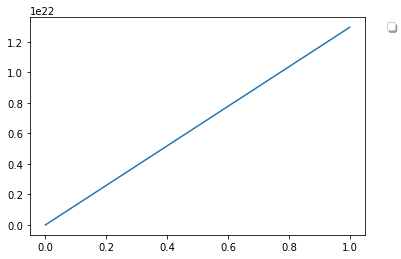

  0%|                                                                              | 1/50000 [00:00<9:12:52,  1.51it/s]


SSE for the test dataset :  1.198911948617186e+23
RMSE for the test dataset :  3174897268.207638
Solving using Gradient Descent
Solving using regularization
Solving using Lasso


  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

The model stopped learning


No handles with labels found to put in legend.


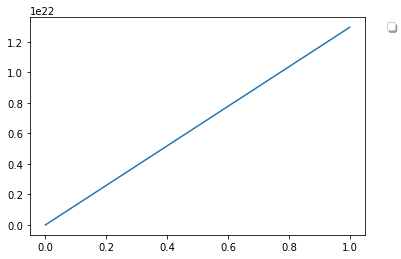

  0%|                                                                              | 1/50000 [00:00<9:59:52,  1.39it/s]


SSE for the test dataset :  1.1989119413687969e+23
RMSE for the test dataset :  3174897258.6102314
Solving using Gradient Descent
Solving using regularization
Solving using Lasso


  0%|                                                                              | 1/50000 [00:00<1:48:43,  7.66it/s]

The model stopped learning


No handles with labels found to put in legend.


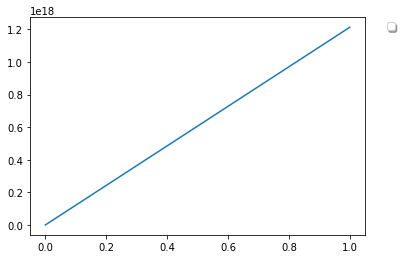

  0%|                                                                             | 1/50000 [00:00<10:08:08,  1.37it/s]


SSE for the test dataset :  1.1110877402631793e+19
RMSE for the test dataset :  30564001.387523342
Solving using Gradient Descent
Solving using regularization
Solving using Lasso


  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

The model stopped learning


No handles with labels found to put in legend.


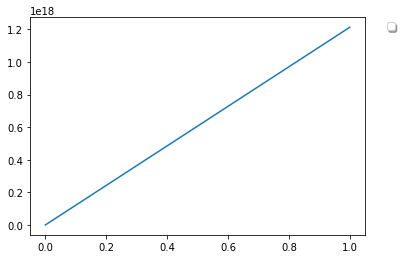

  0%|                                                                              | 1/50000 [00:00<9:24:54,  1.48it/s]


SSE for the test dataset :  1.1110877334036312e+19
RMSE for the test dataset :  30564001.2931765
Solving using Gradient Descent
Solving using regularization
Solving using Lasso


  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

The model stopped learning


No handles with labels found to put in legend.


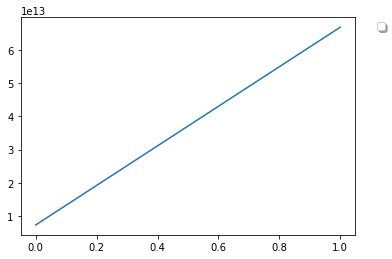

  0%|                                                                              | 1/50000 [00:00<9:44:44,  1.43it/s]


SSE for the test dataset :  420263067739021.1
RMSE for the test dataset :  187973.50787260465
Solving using Gradient Descent
Solving using regularization
Solving using Lasso


  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

The model stopped learning


No handles with labels found to put in legend.


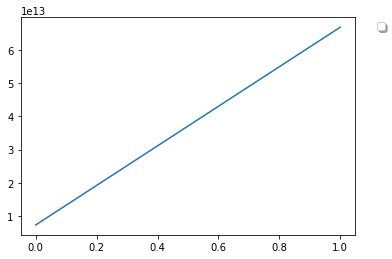

  0%|                                                                              | 1/50000 [00:00<7:51:34,  1.77it/s]


SSE for the test dataset :  420263064271356.8
RMSE for the test dataset :  187973.50709710346
Solving using Gradient Descent
Solving using regularization
Solving using Lasso


  2%|█▍                                                                           | 938/50000 [00:02<02:14, 363.79it/s]

The model stopped learning


No handles with labels found to put in legend.


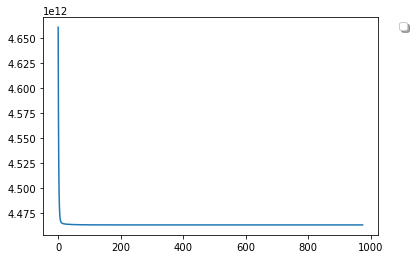

  2%|█▍                                                                           | 973/50000 [00:03<02:49, 289.38it/s]


SSE for the test dataset :  798171591334.311
RMSE for the test dataset :  8191.891019234809
Solving using Gradient Descent
Solving using regularization
Solving using Lasso


  2%|█▌                                                                           | 990/50000 [00:02<02:10, 374.17it/s]No handles with labels found to put in legend.


The model stopped learning


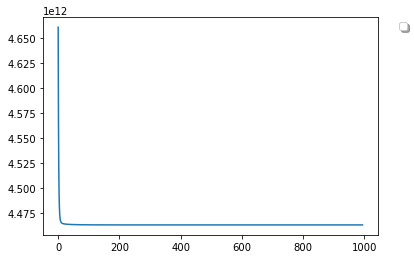

  2%|█▌                                                                           | 994/50000 [00:03<02:43, 299.56it/s]


SSE for the test dataset :  798171170220.9851
RMSE for the test dataset :  8191.888858223966
CPU percent used: 21.6%
Memory percent used: 43.3%


In [ ]:
for i in learningRate:
    for j in regParaa:
        reg=LinearRegression(corr_df.drop(['shares','y'],axis=1),corr_df['shares'],
                     learningRate=i,epsilon=0.0001,
                     maIteration=50000,
                     gd=True,stochasticGradient=False,
                     regularization=True,regPara=j,partition=False,ridge=False)
        learningRatee=i
        regParad=j
        LR.append(learningRatee)
        LAM.append(regParad)
        reg.fit()
cpu_percent = psutil.cpu_percent(interval=1)
memory_percent = psutil.virtual_memory().percent
print(f"CPU percent used: {cpu_percent}%")
print(f"Memory percent used: {memory_percent}%")



# Correlated - Ridge

Solving using Gradient Descent
Solving using regularization
Solving using Ridge


  2%|█▍                                                                           | 932/50000 [00:02<01:49, 447.38it/s]No handles with labels found to put in legend.


The model stopped learning


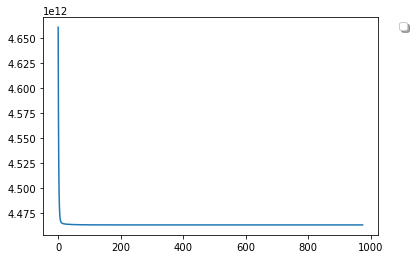

  2%|█▍                                                                           | 973/50000 [00:02<02:17, 357.08it/s]

SSE for the test dataset :  798171640628.8397
RMSE for the test dataset :  8191.891272197584


[4661168097928.992,
 4566541391056.237,
 4519005545411.025,
 4494205074216.643,
 4481028392534.505,
 4473914375514.807,
 4469999336432.276,
 4467789898823.97,
 4466500904658.29,
 4465716496591.249,
 4465214558728.547,
 4464875170618.892,
 4464632648298.213,
 4464450314984.498,
 4464307167976.418,
 4464190792053.484,
 4464093564435.244,
 4464010601757.411,
 4463938634223.347,
 4463875376986.14,
 4463819170914.182,
 4463768771295.016,
 4463723219243.562,
 4463681760410.485,
 4463643791510.954,
 4463608823763.297,
 4463576456987.639,
 4463546360684.639,
 4463518259857.524,
 4463491924169.133,
 4463467159514.436,
 4463443801386.452,
 4463421709600.715,
 4463400764065.505,
 4463380861367.471,
 4463361911999.446,
 4463343838098.381,
 4463326571591.171,
 4463310052668.632,
 4463294228524.763,
 4463279052311.458,
 4463264482268.899,
 4463250480999.734,
 4463237014861.335,
 4463224053455.346,
 4463211569197.648,
 4463199536954.937,
 4463187933736.701,
 4463176738433.355,
 4463165931592.932,
 44

In [ ]:
reg=LinearRegression(corr_df.drop(['shares','y'],axis=1),corr_df['shares'],
                     learningRate=0.00001,epsilon=0.0001,
                     maIteration=50000,
                     gd=True,stochasticGradient=False,
                     regularization=True,regPara=0.001,partition=False,ridge=True)
reg.fit()

# Log transformed data - Ridge

Solving using Gradient Descent
Solving using regularization
Solving using Ridge


  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]No handles with labels found to put in legend.


The model stopped learning


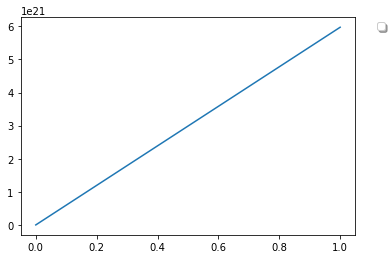

  0%|                                                                              | 1/50000 [00:00<9:25:55,  1.47it/s]


SSE for the test dataset :  4.082477483540609e+22
RMSE for the test dataset :  1852669414.999639
Solving using Gradient Descent
Solving using regularization
Solving using Ridge


  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

The model stopped learning


No handles with labels found to put in legend.


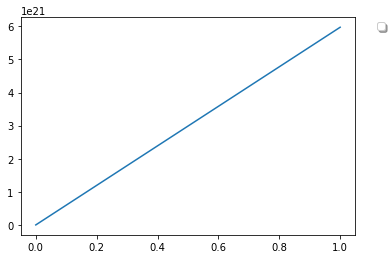

  0%|                                                                              | 1/50000 [00:00<8:27:42,  1.64it/s]


SSE for the test dataset :  4.082475687515072e+22
RMSE for the test dataset :  1852669007.4723518
Solving using Gradient Descent
Solving using regularization
Solving using Ridge


  0%|                                                                              | 1/50000 [00:00<1:28:40,  9.40it/s]

The model stopped learning


No handles with labels found to put in legend.


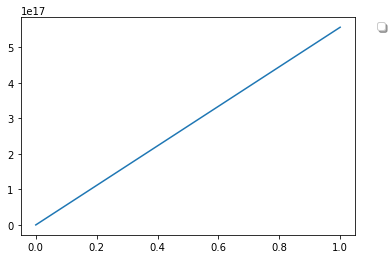

  0%|                                                                             | 1/50000 [00:00<10:43:26,  1.30it/s]


SSE for the test dataset :  3.7314694568678216e+18
RMSE for the test dataset :  17712341.562434185
Solving using Gradient Descent
Solving using regularization
Solving using Ridge


  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

The model stopped learning


No handles with labels found to put in legend.


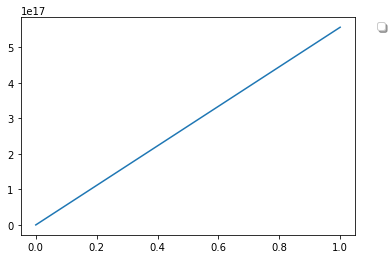

  0%|                                                                              | 1/50000 [00:00<9:14:11,  1.50it/s]


SSE for the test dataset :  3.731467740809895e+18
RMSE for the test dataset :  17712337.48958728
Solving using Gradient Descent
Solving using regularization
Solving using Ridge


  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

The model stopped learning


No handles with labels found to put in legend.


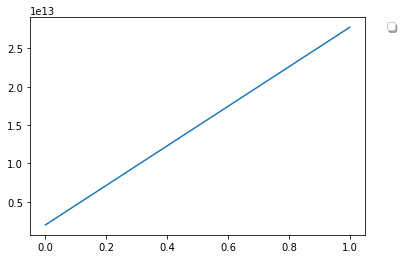

  0%|                                                                              | 1/50000 [00:00<8:20:51,  1.66it/s]


SSE for the test dataset :  111105745388680.47
RMSE for the test dataset :  96650.54150087842
Solving using Gradient Descent
Solving using regularization
Solving using Ridge


  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

The model stopped learning


No handles with labels found to put in legend.


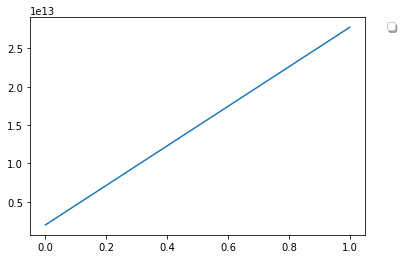

  0%|                                                                              | 1/50000 [00:00<8:07:16,  1.71it/s]


SSE for the test dataset :  111105653244364.86
RMSE for the test dataset :  96650.50142284368
Solving using Gradient Descent
Solving using regularization
Solving using Ridge


  2%|█▌                                                                          | 1065/50000 [00:03<01:59, 410.32it/s]

The model stopped learning


No handles with labels found to put in legend.


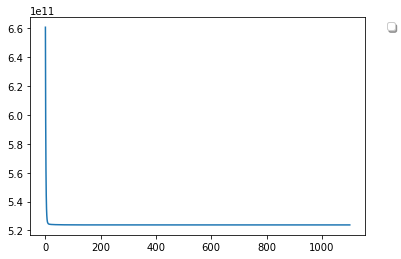

  2%|█▋                                                                          | 1101/50000 [00:03<02:44, 297.39it/s]


SSE for the test dataset :  218481486666.65125
RMSE for the test dataset :  4285.9130301083105
Solving using Gradient Descent
Solving using regularization
Solving using Ridge


  2%|█▋                                                                          | 1079/50000 [00:03<02:06, 386.72it/s]

The model stopped learning


No handles with labels found to put in legend.


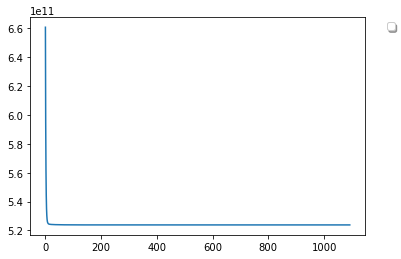

  2%|█▋                                                                          | 1092/50000 [00:05<03:45, 217.26it/s]


SSE for the test dataset :  218482129940.5985
RMSE for the test dataset :  4285.919339599804
CPU percent used: 49.9%
Memory percent used: 39.6%


In [ ]:
for i in learningRate:
    for j in regParaa:
        reg=LinearRegression(log_transformed_df_LR.drop(['shares','y'],axis=1),log_transformed_df_LR['shares'],
                     learningRate=i,epsilon=0.0001,
                     maIteration=50000,
                     gd=True,stochasticGradient=False,
                     regularization=True,regPara=j,partition=False,ridge=True)
        learningRatee=i
        regParad=j
        LR.append(learningRatee)
        LAM.append(regParad)
        reg.fit()
cpu_percent = psutil.cpu_percent(interval=1)
memory_percent = psutil.virtual_memory().percent
print(f"CPU percent used: {cpu_percent}%")
print(f"Memory percent used: {memory_percent}%")

# Log transformed - Lasso

Solving using Gradient Descent
Solving using regularization
Solving using Lasso


  2%|█▌                                                                          | 1059/50000 [00:03<02:30, 326.00it/s]

The model stopped learning


No handles with labels found to put in legend.


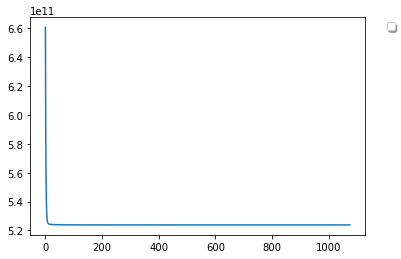

  2%|█▋                                                                          | 1074/50000 [00:04<03:06, 262.13it/s]

weights :  [2958.97191886   56.97152432   11.0126105    92.72794424  -68.7482734
  273.05209127 -185.37830851  176.20606847   22.45371634 -301.23866865
  146.04388009  118.75583395  -23.7152346   -97.22777824  164.97641142
  181.33857744  231.10073778  155.78391955   89.45399384   -6.62499866
  123.45870647  248.73332754    5.44798422  -93.74918026   26.9091683
   35.27585977  -74.25899044 -137.76319666   21.12116175   95.47682469
   74.19051577   96.70693997 -157.0482015  -461.88244875 -342.71124981
  -32.88972525 -211.45372368 -557.92594579   32.78864316  -72.85199461
  -49.19955759  -40.89862192  -16.17930661  103.00973212  123.96181145]
SSE for the test dataset :  218482006817.503
RMSE for the test dataset :  4285.918131959319


[660742675834.8553,
 595300235070.9731,
 561849722029.6608,
 544387881137.4544,
 535183139686.8718,
 530288942209.52686,
 527659238764.44305,
 526226120187.9839,
 525429677001.27545,
 524975083827.2533,
 524706316555.874,
 524540267280.7367,
 524432278021.7773,
 524358064394.86285,
 524304207631.3275,
 524263135063.9381,
 524230457217.6479,
 524203545714.6086,
 524180766944.4605,
 524161064055.9297,
 524143725239.80426,
 524128252578.0156,
 524114285864.5405,
 524101556973.6779,
 524089861564.3513,
 524079040881.37695,
 524068969619.6035,
 524059547554.2379,
 524050693595.23584,
 524042341457.2698,
 524034436441.708,
 524026933005.8946,
 524019792903.184,
 524012983744.7716,
 524006477878.05774,
 524000251505.4655,
 523994283987.7093,
 523988557289.6859,
 523983055537.3874,
 523977764661.7337,
 523972672110.8108,
 523967766616.1977,
 523963038002.25726,
 523958477029.7018,
 523954075266.6116,
 523949824981.5469,
 523945719054.50104,
 523941750902.33093,
 523937914415.9806,
 52393420390

In [ ]:
reg=LinearRegression(log_transformed_df_LR.drop(['shares','y'],axis=1),log_transformed_df_LR['shares'],
                     learningRate=0.00001,epsilon=0.0001,
                     maIteration=50000,
                     gd=True,stochasticGradient=False,
                     regularization=True,regPara=0.001,partition=False,ridge=False)
reg.fit()

In [ ]:
weights =[56.97152432,   11.0126105,    92.72794424, -68.7482734,
           273.05209127, -185.37830851,  176.20606847,   22.45371634, -301.23866865,
  146.04388009,  118.75583395,  -23.7152346,   -97.22777824,  164.97641142,
  181.33857744,  231.10073778,  155.78391955,   89.45399384,   -6.62499866,
  123.45870647,  248.73332754,    5.44798422,  -93.74918026,   26.9091683,
   35.27585977,  -74.25899044, -137.76319666,   21.12116175,   95.47682469,
   74.19051577,   96.70693997, -157.0482015,  -461.88244875, -342.71124981,
  -32.88972525,-211.45372368, -557.92594579,   32.78864316,  -72.85199461,
  -49.19955759,  -40.89862192,  -16.17930661,  103.00973212,  123.96181145]





In [ ]:
a=log_transformed_df_LR.columns.tolist()
#weights=weights.tolist()
a.remove('shares')
a.remove('y')
df_weight = pd.DataFrame({'Columns': a, 'Weights': weights})
df_weight

Columns     Weights
0                  n_tokens_title   56.971524
1                n_tokens_content   11.012610
2                 n_unique_tokens   92.727944
3                n_non_stop_words  -68.748273
4                       num_hrefs  273.052091
5                  num_self_hrefs -185.378309
6                        num_imgs  176.206068
7                      num_videos   22.453716
8            average_token_length -301.238669
9                    num_keywords  146.043880
10                     kw_min_min  118.755834
11                     kw_max_min  -23.715235
12                     kw_min_max  -97.227778
13                     kw_avg_max  164.976411
14                     kw_min_avg  181.338577
15                     kw_max_avg  231.100738
16      self_reference_min_shares  155.783920
17      self_reference_max_shares   89.453994
18                         LDA_01   -6.624999
19                         LDA_03  123.458706
20            global_subjectivity  248.733328
21      global_sentiment_polarity    5.447984
22     global_rate_positive_words  -93.749180
23     global_rate_negative_words   26.909168
24          avg_positive_polarity   35.275860
25          min_positive_polarity  -74.258990
26          avg_negative_polarity -137.763197
27          max_negative_polarity   21.121162
28             title_subjectivity   95.476825
29       title_sentiment_polarity   74.190516
30         abs_title_subjectivity   96.706940
31      data_channel_is_lifestyle -157.048202
32  data_channel_is_entertainment -461.882449
33            data_channel_is_bus -342.711250
34         data_channel_is_socmed  -32.889725
35           data_channel_is_tech -211.453724
36          data_channel_is_world -557.925946
37              weekday_is_monday   32.788643
38             weekday_is_tuesday  -72.851995
39           weekday_is_wednesday  -49.199558
40            weekday_is_thursday  -40.898622
41              weekday_is_friday  -16.179307
42            weekday_is_saturday  103.009732
43              weekday_is_sunday  123.961811

In [ ]:
df_weight_sort = df_weight.sort_values(by='Weights', ascending=False)
df_weight_sort.head(10)

Columns     Weights
4                   num_hrefs  273.052091
20        global_subjectivity  248.733328
15                 kw_max_avg  231.100738
14                 kw_min_avg  181.338577
6                    num_imgs  176.206068
13                 kw_avg_max  164.976411
16  self_reference_min_shares  155.783920
9                num_keywords  146.043880
43          weekday_is_sunday  123.961811
19                     LDA_03  123.458706


# Log transformed - Lasso - Partition

Solving using Gradient Descent
Solving using regularization
Solving using Lasso


  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

The model stopped learning


No handles with labels found to put in legend.


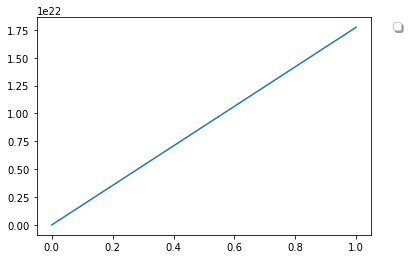

  0%|                                                                              | 1/50000 [00:00<6:17:52,  2.21it/s]


SSE for the test dataset :  2.8275951595736695e+23
RMSE for the test dataset :  5970966572.10883
Solving using Gradient Descent
Solving using regularization
Solving using Lasso


  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

The model stopped learning


No handles with labels found to put in legend.


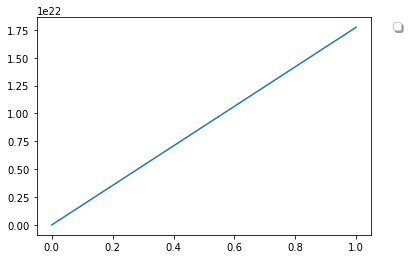

  0%|                                                                              | 1/50000 [00:00<5:05:57,  2.72it/s]


SSE for the test dataset :  2.8275951595736695e+23
RMSE for the test dataset :  5970966572.10883
Solving using Gradient Descent
Solving using regularization
Solving using Lasso


  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

The model stopped learning


No handles with labels found to put in legend.


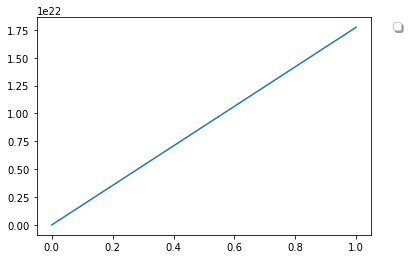

  0%|                                                                              | 1/50000 [00:00<6:04:58,  2.28it/s]


SSE for the test dataset :  2.8275951738036035e+23
RMSE for the test dataset :  5970966587.13334
Solving using Gradient Descent
Solving using regularization
Solving using Lasso


  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

The model stopped learning


No handles with labels found to put in legend.


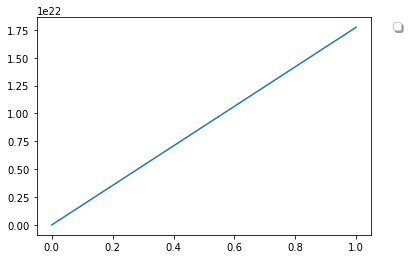

  0%|                                                                             | 1/50000 [00:01<19:12:00,  1.38s/it]


SSE for the test dataset :  2.8275951738036035e+23
RMSE for the test dataset :  5970966587.13334
Solving using Gradient Descent
Solving using regularization
Solving using Lasso


  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

The model stopped learning


No handles with labels found to put in legend.


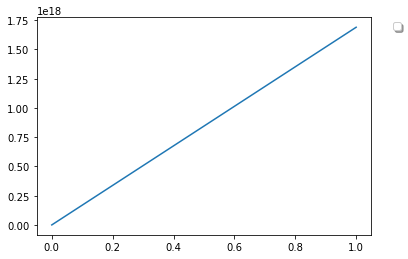

  0%|                                                                              | 1/50000 [00:00<6:52:31,  2.02it/s]


SSE for the test dataset :  2.826893897901297e+19
RMSE for the test dataset :  59702261.07259085
Solving using Gradient Descent
Solving using regularization
Solving using Lasso


  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

The model stopped learning


No handles with labels found to put in legend.


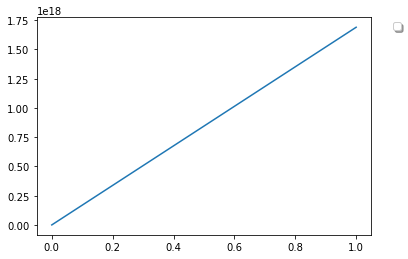

  0%|                                                                              | 1/50000 [00:00<5:58:00,  2.33it/s]


SSE for the test dataset :  2.826893897901297e+19
RMSE for the test dataset :  59702261.07259085
Solving using Gradient Descent
Solving using regularization
Solving using Lasso


  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

The model stopped learning


No handles with labels found to put in legend.


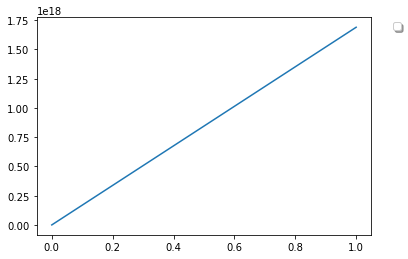

  0%|                                                                              | 1/50000 [00:00<4:55:46,  2.82it/s]


SSE for the test dataset :  2.8268939118802555e+19
RMSE for the test dataset :  59702261.22020435
Solving using Gradient Descent
Solving using regularization
Solving using Lasso


  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

The model stopped learning


No handles with labels found to put in legend.


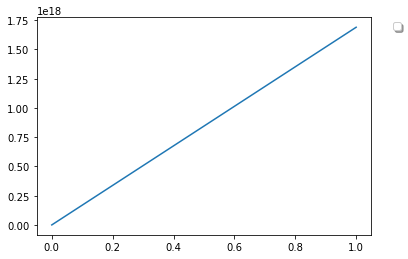

  0%|                                                                              | 1/50000 [00:00<7:21:01,  1.89it/s]


SSE for the test dataset :  2.8268939118802555e+19
RMSE for the test dataset :  59702261.22020435
Solving using Gradient Descent
Solving using regularization
Solving using Lasso


  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

The model stopped learning


No handles with labels found to put in legend.


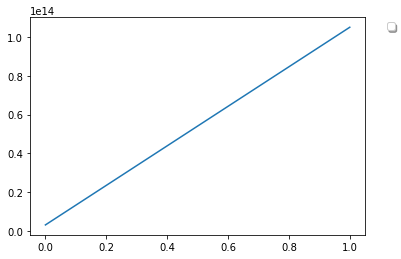

  0%|                                                                              | 1/50000 [00:00<5:59:29,  2.32it/s]


SSE for the test dataset :  2823878561659499.5
RMSE for the test dataset :  596704.1155341018
Solving using Gradient Descent
Solving using regularization
Solving using Lasso


  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

The model stopped learning


No handles with labels found to put in legend.


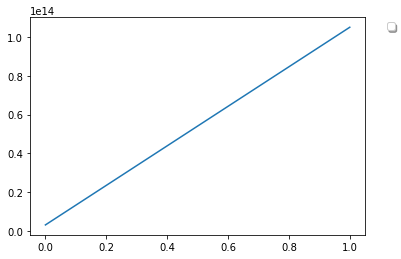

  0%|                                                                              | 1/50000 [00:00<6:35:29,  2.11it/s]


SSE for the test dataset :  2823878561659499.5
RMSE for the test dataset :  596704.1155341018
Solving using Gradient Descent
Solving using regularization
Solving using Lasso


  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

The model stopped learning


No handles with labels found to put in legend.


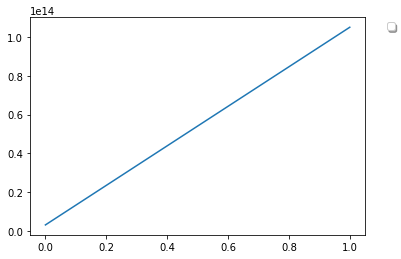

  0%|                                                                              | 1/50000 [00:00<7:00:55,  1.98it/s]


SSE for the test dataset :  2823878573125305.5
RMSE for the test dataset :  596704.1167455019
Solving using Gradient Descent
Solving using regularization
Solving using Lasso


  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

The model stopped learning


No handles with labels found to put in legend.


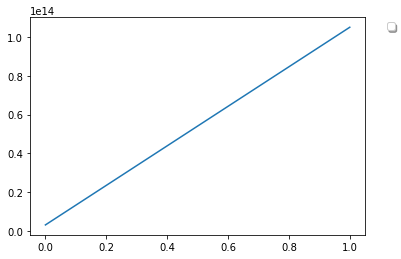

  0%|                                                                              | 1/50000 [00:00<5:13:18,  2.66it/s]


SSE for the test dataset :  2823878573125305.5
RMSE for the test dataset :  596704.1167455019
Solving using Gradient Descent
Solving using regularization
Solving using Lasso


  1%|█▏                                                                           | 745/50000 [00:01<02:03, 400.08it/s]No handles with labels found to put in legend.


The model stopped learning


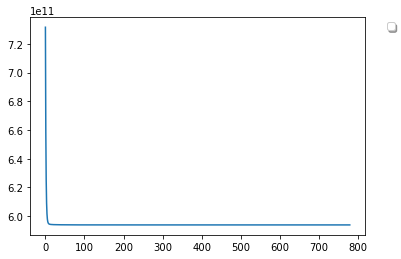

  2%|█▏                                                                           | 779/50000 [00:02<02:26, 336.64it/s]


SSE for the test dataset :  625853355011.1772
RMSE for the test dataset :  8883.258853550458
Solving using Gradient Descent
Solving using regularization
Solving using Lasso


  2%|█▏                                                                           | 763/50000 [00:01<02:13, 369.43it/s]No handles with labels found to put in legend.


The model stopped learning


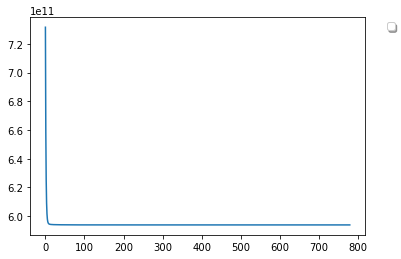

  2%|█▏                                                                           | 779/50000 [00:02<02:34, 319.47it/s]


SSE for the test dataset :  625853355011.1772
RMSE for the test dataset :  8883.258853550458
Solving using Gradient Descent
Solving using regularization
Solving using Lasso


  1%|█                                                                            | 729/50000 [00:01<02:09, 379.94it/s]No handles with labels found to put in legend.


The model stopped learning


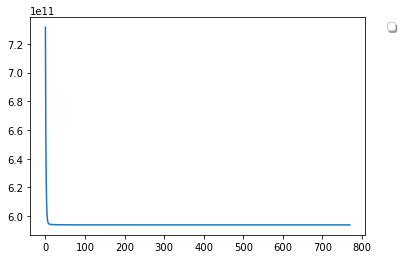

  2%|█▏                                                                           | 769/50000 [00:02<02:35, 316.59it/s]


SSE for the test dataset :  625853079135.9233
RMSE for the test dataset :  8883.256895686414
Solving using Gradient Descent
Solving using regularization
Solving using Lasso


  2%|█▏                                                                           | 753/50000 [00:01<02:02, 400.63it/s]No handles with labels found to put in legend.


The model stopped learning


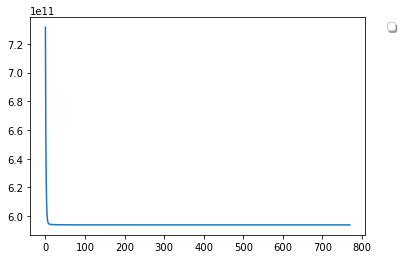

  2%|█▏                                                                           | 769/50000 [00:02<02:36, 314.64it/s]


SSE for the test dataset :  625853079135.9233
RMSE for the test dataset :  8883.256895686414
CPU percent used: 14.1%
Memory percent used: 52.1%


In [ ]:
for i in learningRate:
    for j in regParaa:
        reg=LinearRegression(log_transformed_df_LR.drop(['shares','y'],axis=1),log_transformed_df_LR['shares'],
                     learningRate=i,epsilon=0.0001,
                     maIteration=50000,
                     gd=True,stochasticGradient=False,
                     regularization=True,regPara=j,partition=True,ridge=False)
        reg.fit()
        learningRatee=i
        regParad=j
        LR.append(learningRatee)
        LAM.append(regParad)
        reg.fit()
cpu_percent = psutil.cpu_percent(interval=1)
memory_percent = psutil.virtual_memory().percent
print(f"CPU percent used: {cpu_percent}%")
print(f"Memory percent used: {memory_percent}%")


#  Log transformed - Ridge - Partition

Solving using Gradient Descent
Solving using regularization
Solving using Ridge


  2%|█▏                                                                           | 787/50000 [00:02<02:12, 370.38it/s]No handles with labels found to put in legend.


The model stopped learning


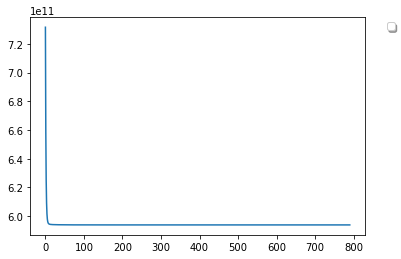

  2%|█▏                                                                           | 790/50000 [00:02<02:42, 302.02it/s]

SSE for the test dataset :  625852888017.6472
RMSE for the test dataset :  8883.255539335434


[731512010648.9321,
 658604762460.3998,
 624946050039.1304,
 609142408156.4725,
 601639292011.792,
 598030153113.2336,
 596262210365.6864,
 595373178977.8098,
 594909251767.0945,
 594654823005.731,
 594506404688.4739,
 594413595395.169,
 594351336548.0259,
 594306809881.8414,
 594273207994.2418,
 594246744330.8444,
 594225198451.4664,
 594207194649.8223,
 594191834815.0774,
 594178505134.5712,
 594166769989.5254,
 594156310872.0015,
 594146889416.9635,
 594138323924.7568,
 594130473798.1936,
 594123228851.0944,
 594116501751.6838,
 594110222562.3168,
 594104334725.6959,
 594098792074.1097,
 594093556576.156,
 594088596623.0968,
 594083885714.7871,
 594079401444.3872,
 594075124708.3751,
 594071039087.7303,
 594067130360.0605,
 594063386112.5449,
 594059795432.9901,
 594056348661.7606,
 594053037191.4346,
 594049853304.0806,
 594046790038.3623,
 594043841080.4125,
 594041000673.7509,
 594038263544.5396,
 594035624839.2476,
 594033080072.4077,
 594030625082.6195,
 594028255995.3165,
 594

In [ ]:
reg=LinearRegression(log_transformed_df_LR.drop(['shares','y'],axis=1),log_transformed_df_LR['shares'],
                     learningRate=0.00001,epsilon=0.0001,
                     maIteration=50000,
                     gd=True,stochasticGradient=False,
                     regularization=True,regPara=0.001,partition=True,ridge=True)
reg.fit()

In [ ]:
LAM

[0.01, 0.001, 0.01, 0.001, 0.01, 0.001, 0.01, 0.001]

In [ ]:
LR

[0.01, 0.01, 0.001, 0.001, 0.0001, 0.0001, 1e-05, 1e-05]

In [ ]:
for i in learningRate:
    for j in regParaa:
        reg=LinearRegression(log_transformed_df_1.drop(['shares','y'],axis=1),log_transformed_df_1['shares'],
                     learningRate=i,epsilon=0.0001,
                     maIteration=50000,
                     gd=True,stochasticGradient=False,
                     regularization=True,regPara=j,partition=False,ridge=True)
        learningRatee=i
        regParad=j
        LR.append(learningRatee)
        LAM.append(regParad)
        reg.fit()

# SVM


# Log transformed Data

In [ ]:
X=log_transformed_df_1.drop(['y'],axis=1)
y=log_transformed_df_1['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_arr = np.asarray(X_train)
y_train_arr = np.asarray(y_train)
X_test_arr = np.asarray(X_test)
y_test_arr = np.asarray(y_test)
Train = pd.merge(X_train, y_train, left_index=True, right_index=True)
Train_SVM = Train
Train_Balance = Train
Train = np.array(Train, dtype=np.float64)
Test = pd.merge(X_test, y_test, left_index=True, right_index=True)
Test_SVM = Test
Test = np.array(Test, dtype=np.float64)

# Corr Data

In [ ]:
X=corr_df.drop(['y'],axis=1)
y=corr_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_arr = np.asarray(X_train)
y_train_arr = np.asarray(y_train)
X_test_arr = np.asarray(X_test)
y_test_arr = np.asarray(y_test)
Train = pd.merge(X_train, y_train, left_index=True, right_index=True)
Train_SVM = Train
Train_Balance = Train
Train = np.array(Train, dtype=np.float64)
Test = pd.merge(X_test, y_test, left_index=True, right_index=True)
Test_SVM = Test
Test = np.array(Test, dtype=np.float64)

# SVM

In [ ]:
#@title SVM Classifier


class maxMarginClassifier:

      def __init__(self, C, train, test):
          self.C = C
          self.train = train
          self.test = test

      def dataReader(self):

        train_df = self.train
        test_df = self.test

        train_X, train_y = train_df.iloc[:, :-1], train_df.iloc[:, -1]
        test_X, test_y = test_df.iloc[:, :-1], test_df.iloc[:, -1]
        train_y = train_y.replace(0, -1)

        train_X = train_X.sample(frac = 0.02, replace = False, 
                                 random_state = 18).to_numpy()
        train_y = train_y.sample(frac = 0.02, replace = False,
                                 random_state = 18).to_numpy()


        return train_X, test_X, train_y, test_y

      def fit(self):

          self.train_X, self.test_X, self.train_y, self.test_y = self.dataReader()
          N = len(self.train_y)
          Xy = self.train_X*self.train_y[:, np.newaxis]
          GramXy = np.matmul(Xy, Xy.T)

          def Ld0(G, alpha):
              obj_fn = alpha.sum() - 0.5*alpha.dot(alpha.dot(G))
              return obj_fn 
          def partialDerivativeLd0(G, alpha):
              par_der = np.ones_like(alpha) - alpha.dot(G)
              return par_der
          
          A = np.vstack((-np.eye(N), np.eye(N)))
          b = concatenate((np.zeros(N), self.C*np.ones(N)))
          constraints = ({'type': 'eq', 'fun': lambda a:np.dot(a, self.train_y), 'jac': lambda a: self.train_y},
                         {'type': 'ineq', 'fun': lambda a: b - np.dot(A, a), 'jac': lambda a: -A})
          
          alpha = np.ones(N)
          optRes = optimize.minimize(fun = lambda a: -Ld0(GramXy, a),
                                     x0 = alpha,
                                     method = 'SLSQP',
                                     jac = lambda a: -partialDerivativeLd0(GramXy, a),
                                     constraints=constraints)
          
          self.alpha = optRes.x
          self.w = np.sum(self.alpha[:, np.newaxis]*Xy, axis = 0)

          epsilon = 1e-4
          self.supportVectors = self.train_X[self.alpha > epsilon]
          self.supportLabels = self.train_y[self.alpha > epsilon]

          b = []
          for i in range(len(self.supportLabels)):
              b_i = self.supportLabels[i] - np.matmul(self.supportVectors[i].T, self.w)
              b.append(b_i)

          self.intercept = sum(b)/len(b)
          pred = self.predict(self.test_X)
          pred = pred.replace(-1, 0)
          actual = self.test_y
          print('Accuracy is ', metrics.accuracy_score(pred, actual))
          print('Confusion Matrix is \n', metrics.confusion_matrix(actual, pred))
          print('F1 Score is ', metrics.f1_score(actual, pred))
          print('Precision is ', metrics.precision_score(actual, pred))
          print('Recall is ', metrics.recall_score(actual, pred))

      def predict(self, X):
          return 2*(np.matmul(X, self.w) + self.intercept > 0) - 1

In [ ]:
model = maxMarginClassifier(C = 5, train = Train_SVM, test = Test_SVM)
model.fit()

Accuracy is  0.9618294938624516
Confusion Matrix is 
 [[7601  243]
 [ 211 3839]]
F1 Score is  0.9441711756025578
Precision is  0.9404703576678098
Recall is  0.9479012345679012


In [ ]:
#@title SVM Classifier with Kernel Trick { vertical-output: true }



class kernelMaxMarginClassifier:

      def __init__(self, C, train, test, kernel):
          self.C = C
          self.train = train
          self.test = test
          self.kernel = kernel

      def dataReader(self):

        train_df = self.train
        test_df = self.test

        train_X, train_y = train_df.iloc[:, :-1], train_df.iloc[:, -1]
        test_X, test_y = test_df.iloc[:, :-1], test_df.iloc[:, -1]
        train_y = train_y.replace(0, -1)

        train_X = train_X.sample(frac = 0.01, replace = False, 
                                 random_state = 18).to_numpy()
        train_y = train_y.sample(frac = 0.01, replace = False,
                                 random_state = 18).to_numpy()


        return train_X, test_X, train_y, test_y

      def fit(self):

          self.train_X, self.test_X, self.train_y, self.test_y = self.dataReader()
          N = len(self.train_y)
          hXX = np.apply_along_axis(lambda x1 : np.apply_along_axis(lambda x2:  self.kernel(x1, x2), 1, self.train_X),
                                  1, self.train_X)  
          #Xy = self.train_X*self.train_y[:, np.newaxis]
          GramhXXy = hXX*np.matmul(self.train_y, self.train_y.T)
          #GramXy = np.matmul(Xy, Xy.T)

          def Ld0(G, alpha):
              obj_fn = alpha.sum() - 0.5*alpha.dot(alpha.dot(G))
              return obj_fn 
          def partialDerivativeLd0(G, alpha):
              par_der = np.ones_like(alpha) - alpha.dot(G)
              return par_der
          
          A = np.vstack((-np.eye(N), np.eye(N)))
          b = concatenate((np.zeros(N), self.C*np.ones(N)))
          constraints = ({'type': 'eq', 'fun': lambda a:np.dot(a, self.train_y), 'jac': lambda a: self.train_y},
                         {'type': 'ineq', 'fun': lambda a: b - np.dot(A, a), 'jac': lambda a: -A})
          
          alpha = np.ones(N)
          optRes = optimize.minimize(fun = lambda a: -Ld0(GramhXXy, a),
                                     x0 = alpha,
                                     method = 'SLSQP',
                                     jac = lambda a: -partialDerivativeLd0(GramhXXy, a),
                                     constraints=constraints)
          
          self.alpha = optRes.x
          self.w = np.sum(self.alpha[:, np.newaxis]*hXX, axis = 0)

          epsilon = 1e-6
          self.supportVectors = self.train_X[self.alpha > epsilon]
          self.supportLabels = self.train_y[self.alpha > epsilon]
          self.supportYalphas = self.train_y[self.alpha > epsilon]*self.alpha[self.alpha > epsilon]


          #b = []
          #for i in range(len(self.supportLabels)):
          #    b_i = self.supportLabels[i] - np.matmul(self.supportVectors[i], self.w)
          #    b.append(b_i)

          #self.intercept = sum(b)/len(b)
          pred = pd.DataFrame(self.predict(self.test_X))
          pred = pred.replace(-1, 0)
          actual = self.test_y
          print('Accuracy is ', metrics.accuracy_score(pred, actual))
          print('Confusion Matrix is \n', metrics.confusion_matrix(actual, pred))
          print('F1 Score is ', metrics.f1_score(actual, pred))
          print('Precision is ', metrics.precision_score(actual, pred))
          print('Recall is ', metrics.recall_score(actual, pred))

      def predict(self, X):
          def predict1(x):
              x1 = np.apply_along_axis(lambda s: self.kernel(s, x), 1, self.supportVectors)
              x2 = x1 * self.supportYalphas
              return np.sum(x2)
          func = np.apply_along_axis(predict1, 1, X)
          return 2*(func > 0) - 1

In [ ]:
#@title Gaussian Radial Basis Function Kernel
def GRBF(x1, x2):
    diff = x1 - x2
    return np.exp(-np.dot(diff, diff) * len(x1) / 2)

In [ ]:
ksvm = kernelMaxMarginClassifier(C=5, train=Train_SVM, test=Test_SVM, kernel=GRBF)
ksvm.fit()

Accuracy is  0.6870691104758702
Confusion Matrix is 
 [[6419 1425]
 [2297 1753]]
F1 Score is  0.4850581073602656
Precision is  0.551604782882316
Recall is  0.4328395061728395


# Logistic Regression

Correlated df (Stratify 'y')

In [48]:
class LogisticRegression:
    def __init__(self,X,y, learningRate, epsilon, maxIteration) -> None:
     self.X = X
     self.y = y
     self.learningRate = learningRate
     self.epsilon = epsilon
     self.maxIteration = maxIteration
    
    
     
    def add_X0(self, X):
     return np.column_stack([np.ones(X.shape[0]),X])

    def splitData(self):
     X_train,X_test,y_train,y_test=train_test_split(self.X,self.y,test_size=0.3,random_state=0,stratify= self.y)
     return X_train,X_test,y_train,y_test

    def sigmoid(self,z):
        sig=1/(1+np.exp(-z))
        return sig


    def costFunction(self, X, y):
      sig = self.sigmoid(X.dot(self.w))
      loss=y*np.log(sig)+(1-y)*np.log(1-sig)
      cost = -loss.sum()
      return cost

    def gradient(self,X,y):
      sig = self.sigmoid(X.dot(self.w))
      return (sig-y).dot(X)
    
    def gradientDescent(self, X,y):
      errors=[]
      prev_error=float('inf')
      for i in tqdm(range(self.maxIteration)):
        self.w=self.w-self.learningRate*self.gradient(X,y)
        current_error=self.costFunction(X,y)
        errors.append(current_error)
        if np.abs(prev_error-current_error)<self.epsilon:
          print('model stopped learning')
          break
      self.plot_cost(errors)
      
    
    def predict(self, X):
      sig=self.sigmoid(X.dot(self.w))
      return np.around(sig)
    
    def evaluate(self,y,y_hat):
      y=(y==1)
      y_hat=(y_hat==1)
      accuracy = np.mean(y==y_hat)
      recall=(y&y_hat).sum()/y.sum()
      precision=(y&y_hat).sum()/y_hat.sum()
      f1_score=2*(precision*recall)/(precision+recall)
      return accuracy, recall, precision, f1_score
    
    def fit(self):
     X_train, X_test, y_train, y_test = self.splitData()
     print('Solving using gradient descent')
     self.w = np.ones(X_train.shape[1],dtype = np.float64)*0
     self.gradientDescent(X_train,y_train)
     print(self.w)

     y_train_hat=self.predict(X_train)
     accuracy,recall,precision,f1_score=self.evaluate(y_train,y_train_hat)

     print("The accuracy is {}".format(accuracy))
     print("The recall is {}".format(recall))
     print("The precision is {}".format(precision))
     print("The f1_score is {}".format(f1_score))
     self.X_train = X_train
     self.y_train = y_train
      
    def plot_cost(self,cost_sequence):
        
        s = np.array(cost_sequence)
        t = np.arange(s.size)
        
        fig, ax = plt.subplots()
        ax.plot(t,s)
        
        ax.set(xlabel = 'iterations', ylabel = 'cost' , title = 'cost trend')
        ax.grid()
        plt.legend(bbox_to_anchor=(1.05,1), loc=2,shadow=True)
        plt.show()
        
       
        
    def plot(self):
      plt.figure(figsize=(12, 8))
      ax = plt.axes(projection='3d')

      # Data for three-dimensional scattered points
      ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                    self.sigmoid(self.X_train.dot(self.w)), 
                    c = self.y_train[:], cmap='viridis', s=100);

      ax.set_xlim3d(55, 80)
      ax.set_ylim3d(80, 240)
      plt.xlabel('$x_1$ feature', fontsize=15)
      plt.ylabel('$x_2$ feature', fontsize=15, )
      ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)

    
    
    def scatterPlt(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).values.reshape(xx.shape)

        f, ax = plt.subplots(figsize=(14,12))


        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)


        ax.scatter(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')
        

    def plot3D(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240
        
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)
        fig = plt.figure(figsize=(14,12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()
        


Solving using gradient descent


  0%|          | 0/15000 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-48-ae9204e32664>:40: RuntimeWarning: invalid value encountered in double_scalars
  if np.abs(prev_error-current_error)<self.epsilon:
100%|██████████| 15000/15000 [08:35<00:00, 29.11it/s]


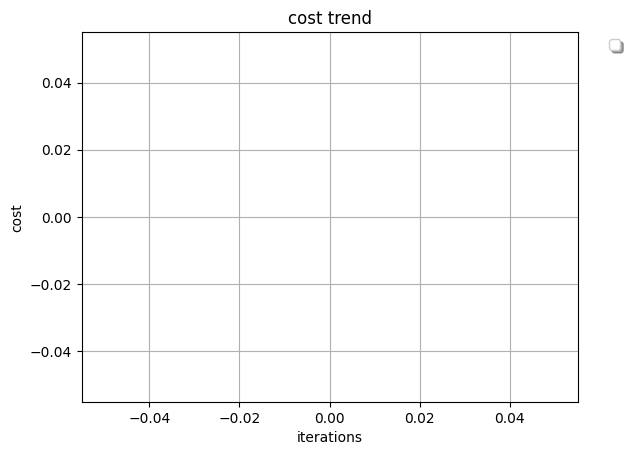

n_tokens_title                     -276.967806
n_tokens_content                 -12186.579235
n_unique_tokens                     -11.405931
n_non_stop_words                    -21.386565
num_hrefs                          -168.956787
num_self_hrefs                      -86.485374
num_imgs                            -44.096165
num_videos                          -14.753205
average_token_length               -130.136894
num_keywords                       -197.635946
data_channel_is_lifestyle            -2.259410
data_channel_is_entertainment        -8.217002
data_channel_is_bus                  -2.828482
data_channel_is_socmed               -0.146092
data_channel_is_tech                 -5.301831
data_channel_is_world               -11.654448
kw_min_min                        -3749.474842
kw_max_min                        -5550.400313
kw_min_max                          164.247099
kw_avg_max                        -2377.252760
kw_min_avg                        -1124.649440
kw_max_avg   

In [49]:
lr = LogisticRegression(corr_df.drop(['y'],axis=1),corr_df['y'], epsilon=0.001, learningRate=0.1e-5, maxIteration=15000)
lr.fit()

Correlated df (Without Stratify 'y')

In [50]:
class LogisticRegression:
    def __init__(self,X,y, learningRate, epsilon, maxIteration) -> None:
     self.X = X
     self.y = y
     self.learningRate = learningRate
     self.epsilon = epsilon
     self.maxIteration = maxIteration
    
    
     
    def add_X0(self, X):
     return np.column_stack([np.ones(X.shape[0]),X])

    def splitData(self):
     X_train,X_test,y_train,y_test=train_test_split(self.X,self.y,test_size=0.3,random_state=0)
     return X_train,X_test,y_train,y_test

    def sigmoid(self,z):
        sig=1/(1+np.exp(-z))
        return sig


    def costFunction(self, X, y):
      sig = self.sigmoid(X.dot(self.w))
      loss=y*np.log(sig)+(1-y)*np.log(1-sig)
      cost = -loss.sum()
      return cost

    def gradient(self,X,y):
      sig = self.sigmoid(X.dot(self.w))
      return (sig-y).dot(X)
    
    def gradientDescent(self, X,y):
      errors=[]
      prev_error=float('inf')
      for i in tqdm(range(self.maxIteration)):
        self.w=self.w-self.learningRate*self.gradient(X,y)
        current_error=self.costFunction(X,y)
        errors.append(current_error)
        if np.abs(prev_error-current_error)<self.epsilon:
          print('model stopped learning')
          break
      self.plot_cost(errors)
      
    
    def predict(self, X):
      sig=self.sigmoid(X.dot(self.w))
      return np.around(sig)
    
    def evaluate(self,y,y_hat):
      y=(y==1)
      y_hat=(y_hat==1)
      accuracy = np.mean(y==y_hat)
      recall=(y&y_hat).sum()/y.sum()
      precision=(y&y_hat).sum()/y_hat.sum()
      f1_score=2*(precision*recall)/(precision+recall)
      return accuracy, recall, precision, f1_score
    
    def fit(self):
     X_train, X_test, y_train, y_test = self.splitData()
     print('Solving using gradient descent')
     self.w = np.ones(X_train.shape[1],dtype = np.float64)*0
     self.gradientDescent(X_train,y_train)
     print(self.w)

     y_train_hat=self.predict(X_train)
     accuracy,recall,precision,f1_score=self.evaluate(y_train,y_train_hat)

     print("The accuracy is {}".format(accuracy))
     print("The recall is {}".format(recall))
     print("The precision is {}".format(precision))
     print("The f1_score is {}".format(f1_score))
     self.X_train = X_train
     self.y_train = y_train
      
    def plot_cost(self,cost_sequence):
        
        s = np.array(cost_sequence)
        t = np.arange(s.size)
        
        fig, ax = plt.subplots()
        ax.plot(t,s)
        
        ax.set(xlabel = 'iterations', ylabel = 'cost' , title = 'cost trend')
        ax.grid()
        plt.legend(bbox_to_anchor=(1.05,1), loc=2,shadow=True)
        plt.show()
        
       
        
    def plot(self):
      plt.figure(figsize=(12, 8))
      ax = plt.axes(projection='3d')

      # Data for three-dimensional scattered points
      ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                    self.sigmoid(self.X_train.dot(self.w)), 
                    c = self.y_train[:], cmap='viridis', s=100);

      ax.set_xlim3d(55, 80)
      ax.set_ylim3d(80, 240)
      plt.xlabel('$x_1$ feature', fontsize=15)
      plt.ylabel('$x_2$ feature', fontsize=15, )
      ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)

    
    
    def scatterPlt(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).values.reshape(xx.shape)

        f, ax = plt.subplots(figsize=(14,12))


        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)


        ax.scatter(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')
        

    def plot3D(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240
        
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)
        fig = plt.figure(figsize=(14,12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()
        


Solving using gradient descent


  0%|          | 0/15000 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-50-7f57d7910ec6>:40: RuntimeWarning: invalid value encountered in double_scalars
  if np.abs(prev_error-current_error)<self.epsilon:
100%|██████████| 15000/15000 [09:32<00:00, 26.21it/s]


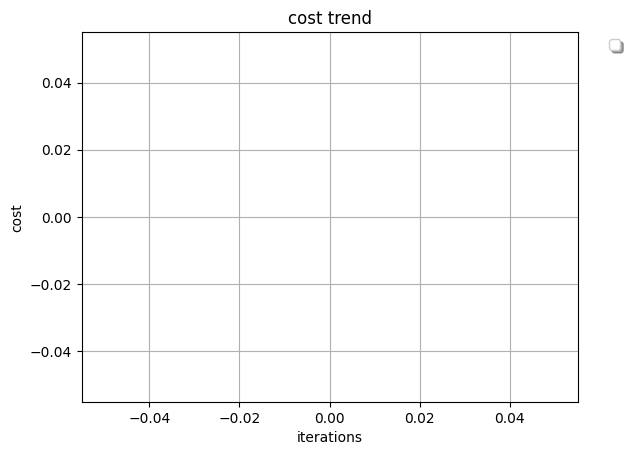

n_tokens_title                     -273.081668
n_tokens_content                 -12121.767215
n_unique_tokens                     -15.575679
n_non_stop_words                    -27.470906
num_hrefs                          -160.571046
num_self_hrefs                      -86.900486
num_imgs                            -36.231966
num_videos                          -15.066135
average_token_length               -129.382232
num_keywords                       -192.442633
data_channel_is_lifestyle            -1.915288
data_channel_is_entertainment        -8.250926
data_channel_is_bus                  -2.997914
data_channel_is_socmed               -0.032489
data_channel_is_tech                 -5.219057
data_channel_is_world               -12.088402
kw_min_min                        -3656.139335
kw_max_min                        -8017.491488
kw_min_max                          252.947363
kw_avg_max                        -1056.024446
kw_min_avg                        -1232.504074
kw_max_avg   

In [51]:
lr = LogisticRegression(corr_df.drop(['y'],axis=1),corr_df['y'], epsilon=0.001, learningRate=0.1e-5, maxIteration=15000)
lr.fit()

Logistic with Log Transformed(Stratify 'y')

In [52]:
class LogisticRegression:
    def __init__(self,X,y, learningRate, epsilon, maxIteration) -> None:
     self.X = X
     self.y = y
     self.learningRate = learningRate
     self.epsilon = epsilon
     self.maxIteration = maxIteration
    
    
     
    def add_X0(self, X):
     return np.column_stack([np.ones(X.shape[0]),X])

    def splitData(self):
     X_train,X_test,y_train,y_test=train_test_split(self.X,self.y,test_size=0.3,random_state=0,stratify= self.y)
     return X_train,X_test,y_train,y_test

    def sigmoid(self,z):
        sig=1/(1+np.exp(-z))
        return sig


    def costFunction(self, X, y):
      sig = self.sigmoid(X.dot(self.w))
      loss=y*np.log(sig)+(1-y)*np.log(1-sig)
      cost = -loss.sum()
      return cost

    def gradient(self,X,y):
      sig = self.sigmoid(X.dot(self.w))
      return (sig-y).dot(X)
    
    def gradientDescent(self, X,y):
      errors=[]
      prev_error=float('inf')
      for i in tqdm(range(self.maxIteration)):
        self.w=self.w-self.learningRate*self.gradient(X,y)
        current_error=self.costFunction(X,y)
        errors.append(current_error)
        if np.abs(prev_error-current_error)<self.epsilon:
          print('model stopped learning')
          break
      self.plot_cost(errors)
      
    
    def predict(self, X):
      sig=self.sigmoid(X.dot(self.w))
      return np.around(sig)
    
    def evaluate(self,y,y_hat):
      y=(y==1)
      y_hat=(y_hat==1)
      accuracy = np.mean(y==y_hat)
      recall=(y&y_hat).sum()/y.sum()
      precision=(y&y_hat).sum()/y_hat.sum()
      f1_score=2*(precision*recall)/(precision+recall)
      return accuracy, recall, precision, f1_score
    
    def fit(self):
     X_train, X_test, y_train, y_test = self.splitData()
     print('Solving using gradient descent')
     self.w = np.ones(X_train.shape[1],dtype = np.float64)*0
     self.gradientDescent(X_train,y_train)
     print(self.w)

     y_train_hat=self.predict(X_train)
     accuracy,recall,precision,f1_score=self.evaluate(y_train,y_train_hat)

     print("The accuracy is {}".format(accuracy))
     print("The recall is {}".format(recall))
     print("The precision is {}".format(precision))
     print("The f1_score is {}".format(f1_score))
     self.X_train = X_train
     self.y_train = y_train
      
    def plot_cost(self,cost_sequence):
        
        s = np.array(cost_sequence)
        t = np.arange(s.size)
        
        fig, ax = plt.subplots()
        ax.plot(t,s)
        
        ax.set(xlabel = 'iterations', ylabel = 'cost' , title = 'cost trend')
        ax.grid()
        plt.legend(bbox_to_anchor=(1.05,1), loc=2,shadow=True)
        plt.show()
        
       
        
    def plot(self):
      plt.figure(figsize=(12, 8))
      ax = plt.axes(projection='3d')

      # Data for three-dimensional scattered points
      ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                    self.sigmoid(self.X_train.dot(self.w)), 
                    c = self.y_train[:], cmap='viridis', s=100);

      ax.set_xlim3d(55, 80)
      ax.set_ylim3d(80, 240)
      plt.xlabel('$x_1$ feature', fontsize=15)
      plt.ylabel('$x_2$ feature', fontsize=15, )
      ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)

    
    
    def scatterPlt(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).values.reshape(xx.shape)

        f, ax = plt.subplots(figsize=(14,12))


        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)


        ax.scatter(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')
        

    def plot3D(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240
        
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)
        fig = plt.figure(figsize=(14,12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()
        


Solving using gradient descent


100%|██████████| 15000/15000 [08:33<00:00, 29.21it/s]


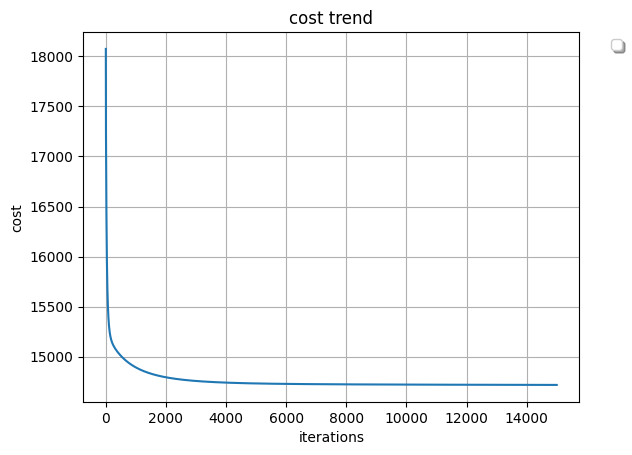

n_tokens_title                  -0.024923
n_tokens_content                 0.014671
n_unique_tokens                  0.016015
n_non_stop_words                -0.018761
num_hrefs                       -0.006892
num_self_hrefs                  -0.004587
num_imgs                        -0.057102
num_videos                       0.006660
average_token_length             0.002367
num_keywords                     0.044896
kw_min_min                       0.323084
kw_max_min                      -0.029241
kw_min_max                      -0.027013
kw_avg_max                      -0.006744
kw_min_avg                       0.015157
kw_max_avg                      -0.064035
self_reference_min_shares       -0.048398
self_reference_max_shares       -0.052749
LDA_01                           0.029186
LDA_03                          -0.017782
global_subjectivity             -0.015731
global_sentiment_polarity       -0.009531
global_rate_positive_words      -0.012293
global_rate_negative_words       0

In [53]:
lr = LogisticRegression(log_transformed_df_1.drop(['y'],axis=1),log_transformed_df_1['y'], epsilon=0.001, learningRate=0.1e-5, maxIteration=15000)
lr.fit()

Logistic with Log Transformed(without Stratify 'y')

In [54]:
class LogisticRegression:
    def __init__(self,X,y, learningRate, epsilon, maxIteration) -> None:
     self.X = X
     self.y = y
     self.learningRate = learningRate
     self.epsilon = epsilon
     self.maxIteration = maxIteration
    
    
     
    def add_X0(self, X):
     return np.column_stack([np.ones(X.shape[0]),X])

    def splitData(self):
     X_train,X_test,y_train,y_test=train_test_split(self.X,self.y,test_size=0.3,random_state=0)
     return X_train,X_test,y_train,y_test

    def sigmoid(self,z):
        sig=1/(1+np.exp(-z))
        return sig


    def costFunction(self, X, y):
      sig = self.sigmoid(X.dot(self.w))
      loss=y*np.log(sig)+(1-y)*np.log(1-sig)
      cost = -loss.sum()
      return cost

    def gradient(self,X,y):
      sig = self.sigmoid(X.dot(self.w))
      return (sig-y).dot(X)
    
    def gradientDescent(self, X,y):
      errors=[]
      prev_error=float('inf')
      for i in tqdm(range(self.maxIteration)):
        self.w=self.w-self.learningRate*self.gradient(X,y)
        current_error=self.costFunction(X,y)
        errors.append(current_error)
        if np.abs(prev_error-current_error)<self.epsilon:
          print('model stopped learning')
          break
      self.plot_cost(errors)
      
    
    def predict(self, X):
      sig=self.sigmoid(X.dot(self.w))
      return np.around(sig)
    
    def evaluate(self,y,y_hat):
      y=(y==1)
      y_hat=(y_hat==1)
      accuracy = np.mean(y==y_hat)
      recall=(y&y_hat).sum()/y.sum()
      precision=(y&y_hat).sum()/y_hat.sum()
      f1_score=2*(precision*recall)/(precision+recall)
      return accuracy, recall, precision, f1_score
    
    def fit(self):
     X_train, X_test, y_train, y_test = self.splitData()
     print('Solving using gradient descent')
     self.w = np.ones(X_train.shape[1],dtype = np.float64)*0
     self.gradientDescent(X_train,y_train)
     print(self.w)

     y_train_hat=self.predict(X_train)
     accuracy,recall,precision,f1_score=self.evaluate(y_train,y_train_hat)

     print("The accuracy is {}".format(accuracy))
     print("The recall is {}".format(recall))
     print("The precision is {}".format(precision))
     print("The f1_score is {}".format(f1_score))
     self.X_train = X_train
     self.y_train = y_train
      
    def plot_cost(self,cost_sequence):
        
        s = np.array(cost_sequence)
        t = np.arange(s.size)
        
        fig, ax = plt.subplots()
        ax.plot(t,s)
        
        ax.set(xlabel = 'iterations', ylabel = 'cost' , title = 'cost trend')
        ax.grid()
        plt.legend(bbox_to_anchor=(1.05,1), loc=2,shadow=True)
        plt.show()
        
       
        
    def plot(self):
      plt.figure(figsize=(12, 8))
      ax = plt.axes(projection='3d')

      # Data for three-dimensional scattered points
      ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                    self.sigmoid(self.X_train.dot(self.w)), 
                    c = self.y_train[:], cmap='viridis', s=100);

      ax.set_xlim3d(55, 80)
      ax.set_ylim3d(80, 240)
      plt.xlabel('$x_1$ feature', fontsize=15)
      plt.ylabel('$x_2$ feature', fontsize=15, )
      ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)

    
    
    def scatterPlt(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).values.reshape(xx.shape)

        f, ax = plt.subplots(figsize=(14,12))


        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)


        ax.scatter(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')
        

    def plot3D(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240
        
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)
        fig = plt.figure(figsize=(14,12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()
        


Solving using gradient descent


100%|██████████| 15000/15000 [07:03<00:00, 35.43it/s]


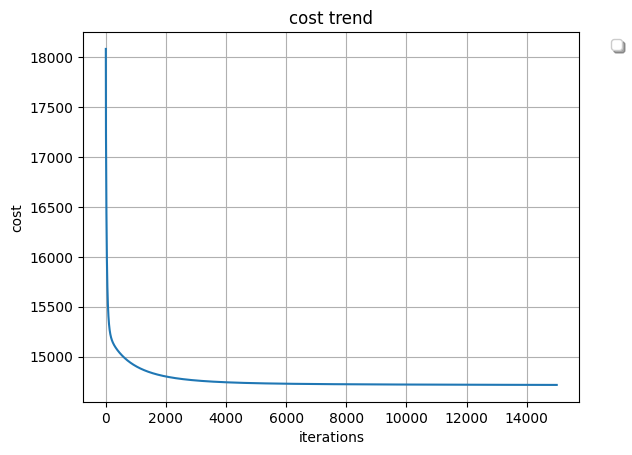

n_tokens_title                  -0.021920
n_tokens_content                 0.013864
n_unique_tokens                  0.017654
n_non_stop_words                -0.006285
num_hrefs                       -0.014318
num_self_hrefs                  -0.005033
num_imgs                        -0.065309
num_videos                       0.014184
average_token_length             0.001382
num_keywords                     0.060944
kw_min_min                       0.427053
kw_max_min                      -0.022850
kw_min_max                      -0.023192
kw_avg_max                       0.000744
kw_min_avg                       0.006610
kw_max_avg                      -0.053882
self_reference_min_shares       -0.054171
self_reference_max_shares       -0.065907
LDA_01                           0.030551
LDA_03                          -0.024416
global_subjectivity             -0.012432
global_sentiment_polarity       -0.021309
global_rate_positive_words       0.001913
global_rate_negative_words       0

In [55]:
lr = LogisticRegression(log_transformed_df_1.drop(['y'],axis=1),log_transformed_df_1['y'], epsilon=0.001, learningRate=0.1e-5, maxIteration=15000)
lr.fit()

#Neural Network (Regression)

In [56]:
!pip install keras-tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
from keras_tqdm import TQDMNotebookCallback
from numpy.random import seed
from keras import regularizers
from keras import optimizers
import tensorflow as tf
import keras.utils as ku

NN with Correlated df with one hidden layer(Continuous)


In [58]:
X_train, X_test, y_train, y_test = train_test_split(corr_df.drop(['shares'],axis=1), corr_df['shares'], test_size=0.3)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((27750, 45), (27750,), (11894, 45), (11894,))

Epoch 1/200
555/555 [==============================] - 6s 8ms/step - loss: 217262352.0000 - mae: 4332.5742 - val_loss: 57126888.0000 - val_mae: 3819.4292
Epoch 2/200
555/555 [==============================] - 3s 6ms/step - loss: 170747264.0000 - mae: 3351.1504 - val_loss: 53818556.0000 - val_mae: 2664.4141
Epoch 3/200
555/555 [==============================] - 3s 6ms/step - loss: 171058768.0000 - mae: 3406.0586 - val_loss: 53976868.0000 - val_mae: 2665.4270
Epoch 4/200
555/555 [==============================] - 5s 10ms/step - loss: 171369968.0000 - mae: 3425.9756 - val_loss: 54188508.0000 - val_mae: 3124.1355
Epoch 5/200
555/555 [==============================] - 4s 7ms/step - loss: 171212336.0000 - mae: 3447.9382 - val_loss: 53618128.0000 - val_mae: 3154.1272
Epoch 6/200
555/555 [==============================] - 4s 7ms/step - loss: 169665920.0000 - mae: 3390.3818 - val_loss: 54253940.0000 - val_mae: 2467.4434
Epoch 7/200
555/555 [==============================] - 3s 5ms/step - loss: 

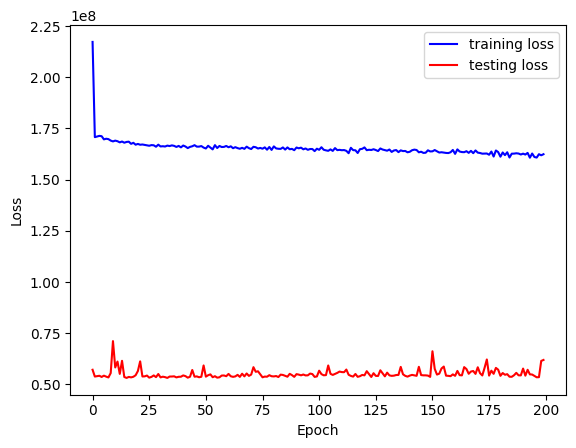

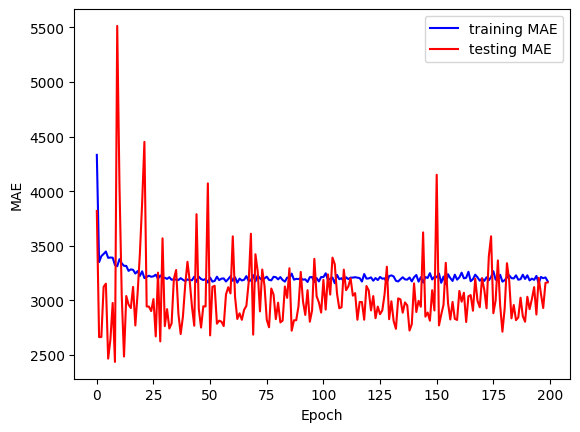

In [59]:
seed(1)

layer1_shape = X_train.shape[1]
model = tf.keras.Sequential([
    tf.keras.layers.Dense(45, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(45, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])


history = model.fit(X_train, y_train, epochs=200, batch_size=50,
                    validation_data=(X_test, y_test),
                    shuffle=True)

test_loss, test_mae = model.evaluate(X_test, y_test)
print('Test MAE:', test_mae)
test_loss, test_mae = model.evaluate(X_train, y_train)
print('Train MAE:', test_mae)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_mae = history.history['mae']
val_mae = history.history['val_mae']
xc = range(200)

plt.figure()
plt.plot(xc, train_loss, color='blue', label='training loss')
plt.plot(xc, val_loss, color='red', label='testing loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(xc, train_mae, color='blue', label='training MAE')
plt.plot(xc, val_mae, color='red', label='testing MAE')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.show()


NN with Correlated df with Three hidden layer(Continuous)


Epoch 1/200
555/555 [==============================] - 4s 5ms/step - loss: 171520032.0000 - mae: 3335.1604 - val_loss: 56482796.0000 - val_mae: 3434.6003
Epoch 2/200
555/555 [==============================] - 2s 4ms/step - loss: 169561232.0000 - mae: 3247.2185 - val_loss: 54812564.0000 - val_mae: 2506.8623
Epoch 3/200
555/555 [==============================] - 2s 3ms/step - loss: 168970336.0000 - mae: 3209.7854 - val_loss: 54345672.0000 - val_mae: 2901.7676
Epoch 4/200
555/555 [==============================] - 2s 3ms/step - loss: 168606208.0000 - mae: 3197.1006 - val_loss: 54190364.0000 - val_mae: 2668.8599
Epoch 5/200
555/555 [==============================] - 2s 3ms/step - loss: 168943392.0000 - mae: 3196.1870 - val_loss: 54134696.0000 - val_mae: 2605.0044
Epoch 6/200
555/555 [==============================] - 2s 3ms/step - loss: 167798080.0000 - mae: 3138.6523 - val_loss: 73351136.0000 - val_mae: 5466.1528
Epoch 7/200
555/555 [==============================] - 2s 4ms/step - loss: 1

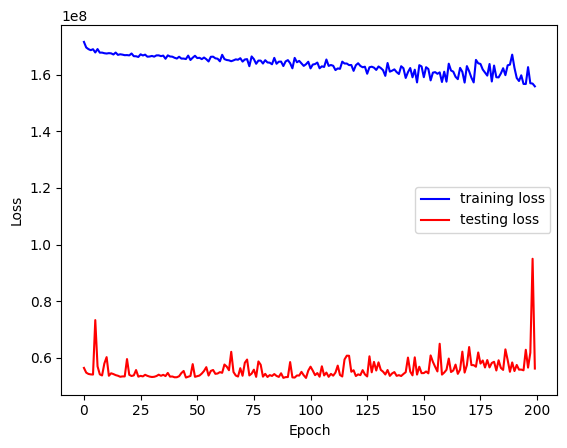

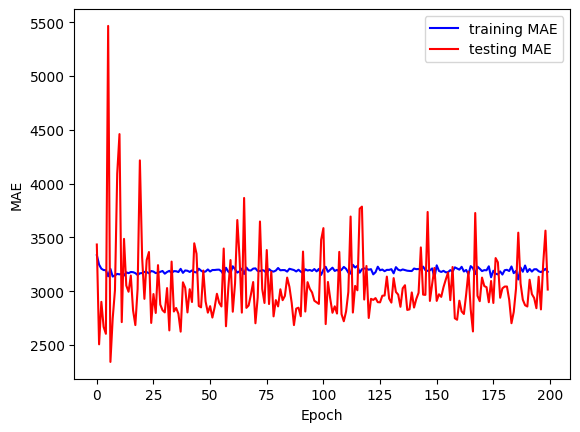

In [60]:
seed(1)

layer1_shape = X_train.shape[1]
model = tf.keras.Sequential([
    tf.keras.layers.Dense(45, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(45, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])


history = model.fit(X_train, y_train, epochs=200, batch_size=50,
                    validation_data=(X_test, y_test),
                    shuffle=True)

test_loss, test_mae = model.evaluate(X_test, y_test)
print('Test MAE:', test_mae)
test_loss, test_mae = model.evaluate(X_train, y_train)
print('Train MAE:', test_mae)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_mae = history.history['mae']
val_mae = history.history['val_mae']
xc = range(200)

plt.figure()
plt.plot(xc, train_loss, color='blue', label='training loss')
plt.plot(xc, val_loss, color='red', label='testing loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(xc, train_mae, color='blue', label='training MAE')
plt.plot(xc, val_mae, color='red', label='testing MAE')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.show()


NN with Log Transformed df with one hidden layer(Continuous)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(log_transformed_df_1.drop(['shares'],axis=1), log_transformed_df_1['shares'], test_size=0.3)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((27750, 45), (27750,), (11894, 45), (11894,))

Epoch 1/200
555/555 [==============================] - 3s 4ms/step - loss: 2.8323 - mae: 1.0996 - val_loss: 2.6608 - val_mae: 1.0604
Epoch 2/200
555/555 [==============================] - 2s 4ms/step - loss: 2.5095 - mae: 0.9635 - val_loss: 2.5685 - val_mae: 0.9759
Epoch 3/200
555/555 [==============================] - 2s 4ms/step - loss: 2.4613 - mae: 0.9391 - val_loss: 2.5365 - val_mae: 0.9401
Epoch 4/200
555/555 [==============================] - 1s 3ms/step - loss: 2.4310 - mae: 0.9309 - val_loss: 2.5599 - val_mae: 0.9588
Epoch 5/200
555/555 [==============================] - 1s 3ms/step - loss: 2.4058 - mae: 0.9209 - val_loss: 2.5488 - val_mae: 0.9446
Epoch 6/200
555/555 [==============================] - 1s 2ms/step - loss: 2.3853 - mae: 0.9147 - val_loss: 2.5906 - val_mae: 0.9712
Epoch 7/200
555/555 [==============================] - 2s 3ms/step - loss: 2.3606 - mae: 0.9061 - val_loss: 2.5626 - val_mae: 0.9452
Epoch 8/200
555/555 [==============================] - 2s 3ms/step - 

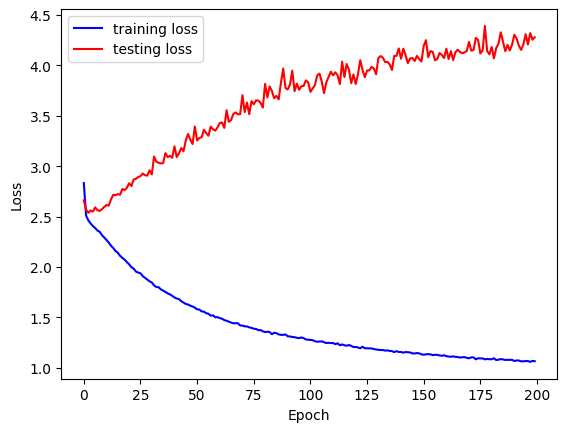

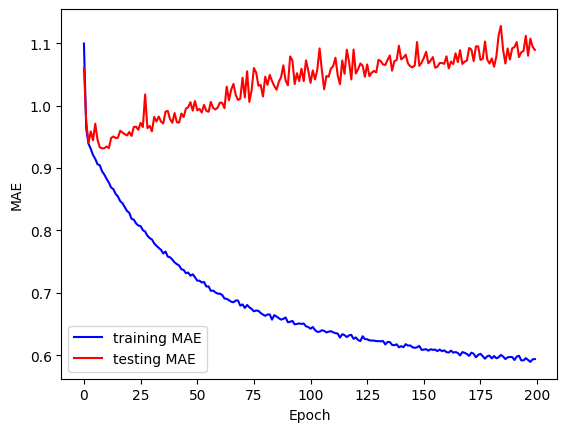

In [62]:
seed(1)

layer1_shape = X_train.shape[1]
model = tf.keras.Sequential([
    tf.keras.layers.Dense(45, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(45, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])


history = model.fit(X_train, y_train, epochs=200, batch_size=50,
                    validation_data=(X_test, y_test),
                    shuffle=True)

test_loss, test_mae = model.evaluate(X_test, y_test)
print('Test MAE:', test_mae)
test_loss, test_mae = model.evaluate(X_train, y_train)
print('Train MAE:', test_mae)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_mae = history.history['mae']
val_mae = history.history['val_mae']
xc = range(200)

plt.figure()
plt.plot(xc, train_loss, color='blue', label='training loss')
plt.plot(xc, val_loss, color='red', label='testing loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(xc, train_mae, color='blue', label='training MAE')
plt.plot(xc, val_mae, color='red', label='testing MAE')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.show()


NN with Log Transformed df with Three hidden layer(Continuous)


Epoch 1/200
555/555 [==============================] - 4s 4ms/step - loss: 2.7295 - mae: 1.0487 - val_loss: 2.5390 - val_mae: 0.9570
Epoch 2/200
555/555 [==============================] - 2s 3ms/step - loss: 2.4759 - mae: 0.9319 - val_loss: 2.5298 - val_mae: 0.9394
Epoch 3/200
555/555 [==============================] - 2s 3ms/step - loss: 2.4468 - mae: 0.9149 - val_loss: 2.5219 - val_mae: 0.9251
Epoch 4/200
555/555 [==============================] - 2s 3ms/step - loss: 2.4238 - mae: 0.9054 - val_loss: 2.5348 - val_mae: 0.9232
Epoch 5/200
555/555 [==============================] - 2s 3ms/step - loss: 2.3939 - mae: 0.9007 - val_loss: 2.5484 - val_mae: 0.9189
Epoch 6/200
555/555 [==============================] - 2s 3ms/step - loss: 2.3750 - mae: 0.8984 - val_loss: 2.5542 - val_mae: 0.9205
Epoch 7/200
555/555 [==============================] - 3s 5ms/step - loss: 2.3367 - mae: 0.8830 - val_loss: 2.6121 - val_mae: 0.9263
Epoch 8/200
555/555 [==============================] - 2s 4ms/step - 

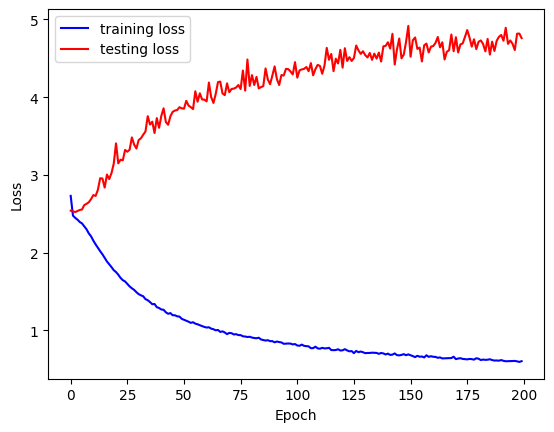

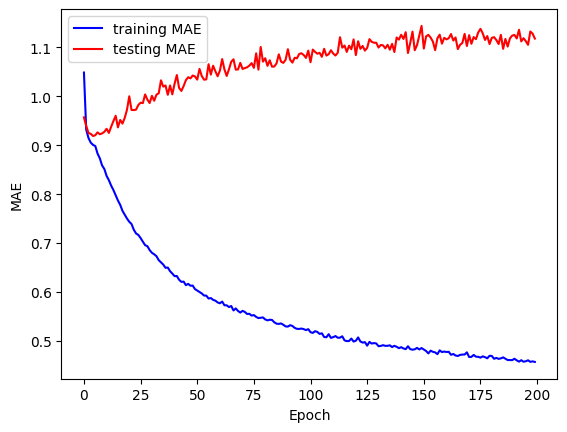

In [63]:
seed(1)

layer1_shape = X_train.shape[1]
model = tf.keras.Sequential([
    tf.keras.layers.Dense(45, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(45, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])


history = model.fit(X_train, y_train, epochs=200, batch_size=50,
                    validation_data=(X_test, y_test),
                    shuffle=True)

test_loss, test_mae = model.evaluate(X_test, y_test)
print('Test MAE:', test_mae)
test_loss, test_mae = model.evaluate(X_train, y_train)
print('Train MAE:', test_mae)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_mae = history.history['mae']
val_mae = history.history['val_mae']
xc = range(200)

plt.figure()
plt.plot(xc, train_loss, color='blue', label='training loss')
plt.plot(xc, val_loss, color='red', label='testing loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(xc, train_mae, color='blue', label='training MAE')
plt.plot(xc, val_mae, color='red', label='testing MAE')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.show()


# Neural Networks (Classification)

In [64]:
X = corr_df.drop(['y'], axis=1)
y = corr_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
y_train = ku.to_categorical(y_train)
y_test = ku.to_categorical(y_test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((27750, 45), (27750, 2), (11894, 45), (11894, 2))

NN with Correlated df with one hidden layer(Discrete)

Epoch 1/200
555/555 [==============================] - 3s 3ms/step - loss: 187.6028 - accuracy: 0.7712 - val_loss: 84.8682 - val_accuracy: 0.8123
Epoch 2/200
555/555 [==============================] - 2s 4ms/step - loss: 82.8123 - accuracy: 0.8431 - val_loss: 66.7466 - val_accuracy: 0.8836
Epoch 3/200
555/555 [==============================] - 2s 4ms/step - loss: 79.8002 - accuracy: 0.8467 - val_loss: 69.9244 - val_accuracy: 0.8865
Epoch 4/200
555/555 [==============================] - 1s 3ms/step - loss: 72.7934 - accuracy: 0.8579 - val_loss: 43.9491 - val_accuracy: 0.8909
Epoch 5/200
555/555 [==============================] - 2s 3ms/step - loss: 57.8123 - accuracy: 0.8747 - val_loss: 185.6536 - val_accuracy: 0.8413
Epoch 6/200
555/555 [==============================] - 2s 3ms/step - loss: 65.3720 - accuracy: 0.8579 - val_loss: 38.7365 - val_accuracy: 0.8808
Epoch 7/200
555/555 [==============================] - 2s 3ms/step - loss: 48.9754 - accuracy: 0.8787 - val_loss: 34.1770 - val_

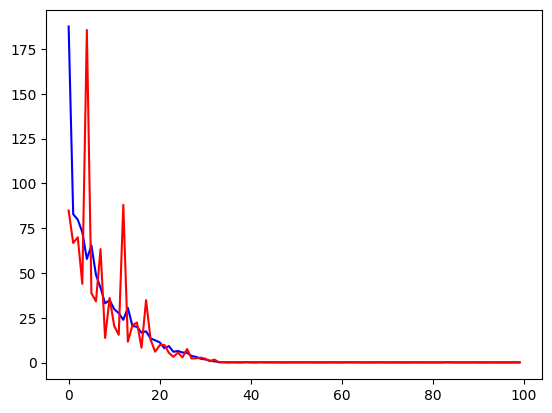

In [65]:
seed(1)

layer1_shape = X_train.shape[1]
model = tf.keras.Sequential([
    tf.keras.layers.Dense(layer1_shape, input_dim = layer1_shape, activation = 'relu'),
    tf.keras.layers.Dense(45, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model = model.fit(X_train, y_train, epochs=200, batch_size=50,
          validation_data = (X_test, y_test),
          shuffle = True)

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
test_loss, test_acc = model.evaluate(X_train, y_train)
print('Train accuracy:', test_acc)

train_loss = Model.history['loss']
val_loss   = Model.history['val_loss']
train_acc  = Model.history['accuracy']
val_acc    = Model.history['val_accuracy']
xc         = range(100)

plt.figure()
plt.plot(xc, train_loss[0:100], color = 'blue', label='training loss')
plt.plot(xc, val_loss[0:100], color = 'red', label='testing loss')

NN with Correlated df with Three hidden layer(Discrete)

Epoch 1/200
555/555 [==============================] - 3s 4ms/step - loss: 205.1887 - accuracy: 0.7194 - val_loss: 36.9456 - val_accuracy: 0.8525
Epoch 2/200
555/555 [==============================] - 3s 5ms/step - loss: 31.4849 - accuracy: 0.8050 - val_loss: 16.0191 - val_accuracy: 0.7511
Epoch 3/200
555/555 [==============================] - 2s 4ms/step - loss: 16.8077 - accuracy: 0.8464 - val_loss: 20.9401 - val_accuracy: 0.7027
Epoch 4/200
555/555 [==============================] - 2s 4ms/step - loss: 19.2166 - accuracy: 0.8436 - val_loss: 7.3813 - val_accuracy: 0.9068
Epoch 5/200
555/555 [==============================] - 2s 4ms/step - loss: 13.6390 - accuracy: 0.8566 - val_loss: 20.7148 - val_accuracy: 0.8815
Epoch 6/200
555/555 [==============================] - 2s 4ms/step - loss: 11.1834 - accuracy: 0.8717 - val_loss: 26.4179 - val_accuracy: 0.8553
Epoch 7/200
555/555 [==============================] - 2s 3ms/step - loss: 10.4954 - accuracy: 0.8719 - val_loss: 5.8095 - val_acc

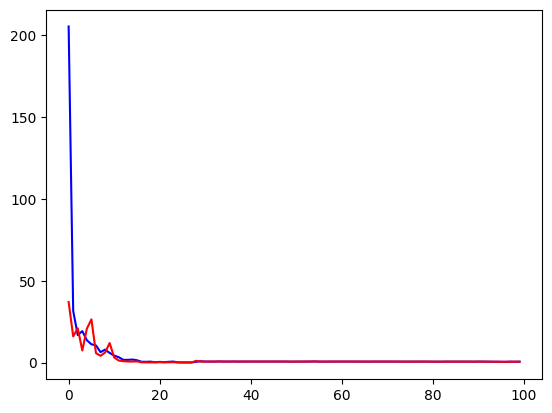

In [66]:
seed(1)

layer1_shape = X_train.shape[1]
model = tf.keras.Sequential([
    tf.keras.layers.Dense(layer1_shape, input_dim = layer1_shape, activation = 'relu'),
    tf.keras.layers.Dense(45, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model = model.fit(X_train, y_train, epochs=200, batch_size=50,
          validation_data = (X_test, y_test),
          shuffle = True)

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
test_loss, test_acc = model.evaluate(X_train, y_train)
print('Train accuracy:', test_acc)

train_loss = Model.history['loss']
val_loss   = Model.history['val_loss']
train_acc  = Model.history['accuracy']
val_acc    = Model.history['val_accuracy']
xc         = range(100)

plt.figure()
plt.plot(xc, train_loss[0:100], color = 'blue', label='training loss')
plt.plot(xc, val_loss[0:100], color = 'red', label='testing loss')

NN with Log Transformed df with one hidden layer(Discrete)

In [67]:
X = log_transformed_df_1.drop(['y'], axis=1)
y = log_transformed_df_1['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
y_train = ku.to_categorical(y_train)
y_test = ku.to_categorical(y_test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((27750, 45), (27750, 2), (11894, 45), (11894, 2))

Epoch 1/200
555/555 [==============================] - 3s 5ms/step - loss: 0.3698 - accuracy: 0.8513 - val_loss: 0.1312 - val_accuracy: 0.9603
Epoch 2/200
555/555 [==============================] - 2s 4ms/step - loss: 0.0938 - accuracy: 0.9695 - val_loss: 0.0798 - val_accuracy: 0.9724
Epoch 3/200
555/555 [==============================] - 2s 3ms/step - loss: 0.0682 - accuracy: 0.9786 - val_loss: 0.0681 - val_accuracy: 0.9786
Epoch 4/200
555/555 [==============================] - 2s 3ms/step - loss: 0.0585 - accuracy: 0.9827 - val_loss: 0.0668 - val_accuracy: 0.9764
Epoch 5/200
555/555 [==============================] - 2s 3ms/step - loss: 0.0536 - accuracy: 0.9838 - val_loss: 0.0575 - val_accuracy: 0.9825
Epoch 6/200
555/555 [==============================] - 1s 3ms/step - loss: 0.0508 - accuracy: 0.9853 - val_loss: 0.0563 - val_accuracy: 0.9822
Epoch 7/200
555/555 [==============================] - 1s 3ms/step - loss: 0.0485 - accuracy: 0.9849 - val_loss: 0.0549 - val_accuracy: 0.9829

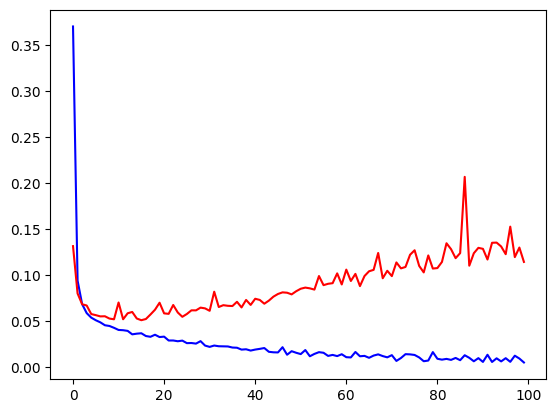

In [68]:
seed(1)

layer1_shape = X_train.shape[1]
model = tf.keras.Sequential([
    tf.keras.layers.Dense(layer1_shape, input_dim = layer1_shape, activation = 'relu'),
    tf.keras.layers.Dense(45, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model = model.fit(X_train, y_train, epochs=200, batch_size=50,
          validation_data = (X_test, y_test),
          shuffle = True)

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
test_loss, test_acc = model.evaluate(X_train, y_train)
print('Train accuracy:', test_acc)

train_loss = Model.history['loss']
val_loss   = Model.history['val_loss']
train_acc  = Model.history['accuracy']
val_acc    = Model.history['val_accuracy']
xc         = range(100)

plt.figure()
plt.plot(xc, train_loss[0:100], color = 'blue', label='training loss')
plt.plot(xc, val_loss[0:100], color = 'red', label='testing loss')

NN with Log Transformed df with three hidden layer(Discrete)

Epoch 1/200
555/555 [==============================] - 3s 3ms/step - loss: 0.2994 - accuracy: 0.8708 - val_loss: 0.1048 - val_accuracy: 0.9636
Epoch 2/200
555/555 [==============================] - 2s 3ms/step - loss: 0.0876 - accuracy: 0.9695 - val_loss: 0.0793 - val_accuracy: 0.9744
Epoch 3/200
555/555 [==============================] - 3s 5ms/step - loss: 0.0724 - accuracy: 0.9751 - val_loss: 0.0696 - val_accuracy: 0.9764
Epoch 4/200
555/555 [==============================] - 3s 5ms/step - loss: 0.0614 - accuracy: 0.9806 - val_loss: 0.0629 - val_accuracy: 0.9790
Epoch 5/200
555/555 [==============================] - 2s 3ms/step - loss: 0.0594 - accuracy: 0.9800 - val_loss: 0.0667 - val_accuracy: 0.9791
Epoch 6/200
555/555 [==============================] - 2s 4ms/step - loss: 0.0568 - accuracy: 0.9817 - val_loss: 0.0684 - val_accuracy: 0.9773
Epoch 7/200
555/555 [==============================] - 2s 3ms/step - loss: 0.0530 - accuracy: 0.9832 - val_loss: 0.0636 - val_accuracy: 0.9799

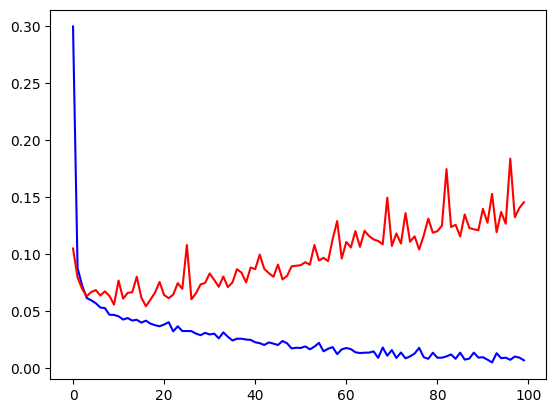

In [69]:
seed(1)

layer1_shape = X_train.shape[1]
model = tf.keras.Sequential([
    tf.keras.layers.Dense(layer1_shape, input_dim = layer1_shape, activation = 'relu'),
    tf.keras.layers.Dense(45, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model = model.fit(X_train, y_train, epochs=200, batch_size=50,
          validation_data = (X_test, y_test),
          shuffle = True)

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
test_loss, test_acc = model.evaluate(X_train, y_train)
print('Train accuracy:', test_acc)

train_loss = Model.history['loss']
val_loss   = Model.history['val_loss']
train_acc  = Model.history['accuracy']
val_acc    = Model.history['val_accuracy']
xc         = range(100)

plt.figure()
plt.plot(xc, train_loss[0:100], color = 'blue', label='training loss')
plt.plot(xc, val_loss[0:100], color = 'red', label='testing loss')